# Proyecto 1, Parte 2. Latidos del corazón

### Jose Murillo Vargas

### C25456

### Escuela de Ingeniería Eléctrica, Universidad de Costa Rica

En este proyecto se utilizan herramientas de programación para lograr estudiar diferentes comportamientos de grabaciones de latidos del corazón. Es importante  mencionar que el propósito del estudio es encontrar y poner en práctica los conocimientos del curso de Señales y Sistemas I.

## ECG
La electrocardiografía (ECG) es una representación gráfica de la actividad eléctrica del corazón. Es una prueba que no causa algún tipo de dolor y no es invasiva. Por lo que no tiene ningún efecto preocupante en los pacientes que la realicen.

Este tipo de señales se miden colocando electrodos que registran los cambios de voltaje del corazón. Cada parte de la señal obtenida corresponde a una acción particular del corazón


# Inicializar el código

Para iniciar la explicación del código, se inicia configurando el cuaderno Jupyter e importando las librerias de Python necesarias para trazar figuras. Incluimos comandos para ver gráficos en el cuaderno Jupyter y crear figuras.

In [1]:
# Librerias
import numpy as np
import random as rd
import wave
import sys
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.signal import butter, lfilter, filtfilt
from statistics import stdev
sys.path.insert(1, r'./../functions') # Ruta elegida para los archivos de audio

# Graficacion de ejes
%config InlineBackend.figure_formats = {'png', 'retina'}
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['font.size'] = 14
plt.rcParams['lines.linewidth'] = 1.4

##Obtención de datos

En esta parte del código se va a crear una función que le corresponde abrir y cargar los archivos de audio del corazón.

In [2]:

def ecg(variable):
    record = wave.open(variable, 'r')

    # Get the number of channels, sample rate, etc.
    numChannels = record.getnchannels() #number of channels
    numFrames = record.getnframes() #number of frames
    sampleRate = record.getframerate() #sampling rate
    sampleWidth = record.getsampwidth()

    # Get wave data
    dstr = record.readframes(numFrames * numChannels)
    waveData = np.frombuffer(dstr, np.int16)

    # Get time window
    timeECG = np.linspace(0, len(waveData)/sampleRate, num=len(waveData))

    return timeECG, waveData

##Audios
Se eligieron 15 archivos de audio que fueron obtenidos desde un sitio web, proporcionado por el profesor. En esta parte del código se abren los archivos desde la ubicación donde se almacenan y luego se guardan en un arreglo para utilizarlos posteriormente en el programa.



In [3]:
#Buscar los archivos y agregarlos como un arreglo al programa
audios = "/content/functions/"
sys.path.append(audios)
muestras = ["a0001.wav","a0002.wav", "a0026.wav","a0004.wav","a0005.wav","a0006.wav","a0007.wav","a0007.wav","a0008.wav","a0009.wav","a0010.wav","a0011.wav","a0012.wav","a0013.wav","a0014.wav","a0015.wav"]


##Recorrido del arreglo
En la presente parte se crea un ciclo para poder recorrer el arreglo de archivos de audio, para que luego mediante la utilización de diferentes comandos, los cuales, de acuerdo al código de programación brindado por el profesor se sabe, que pueden graficar los sonidos contenidos en cada archivo de audio elegido.


##Gráficas de las señales de los diferentes audios elegidos

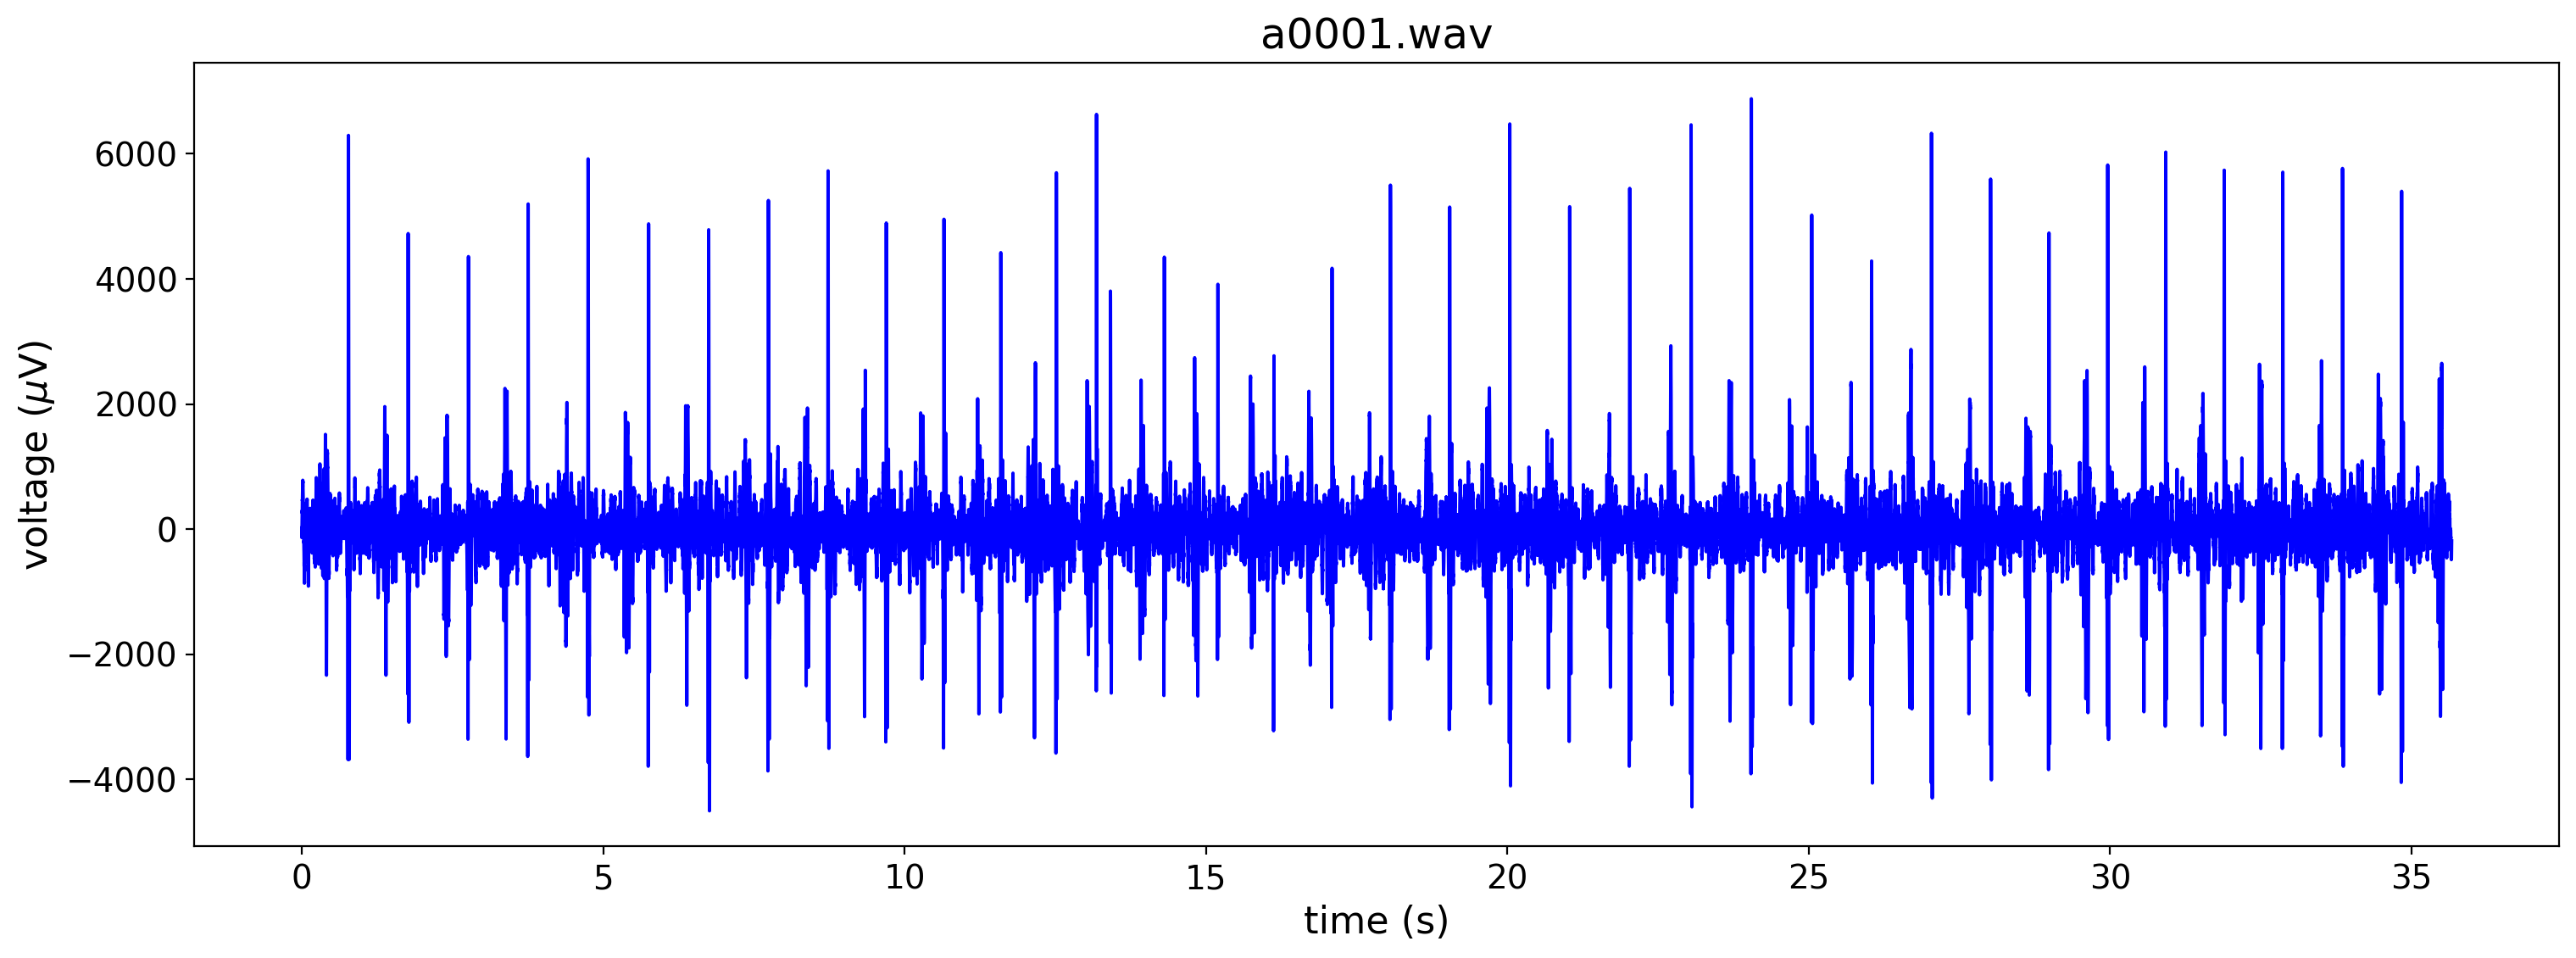

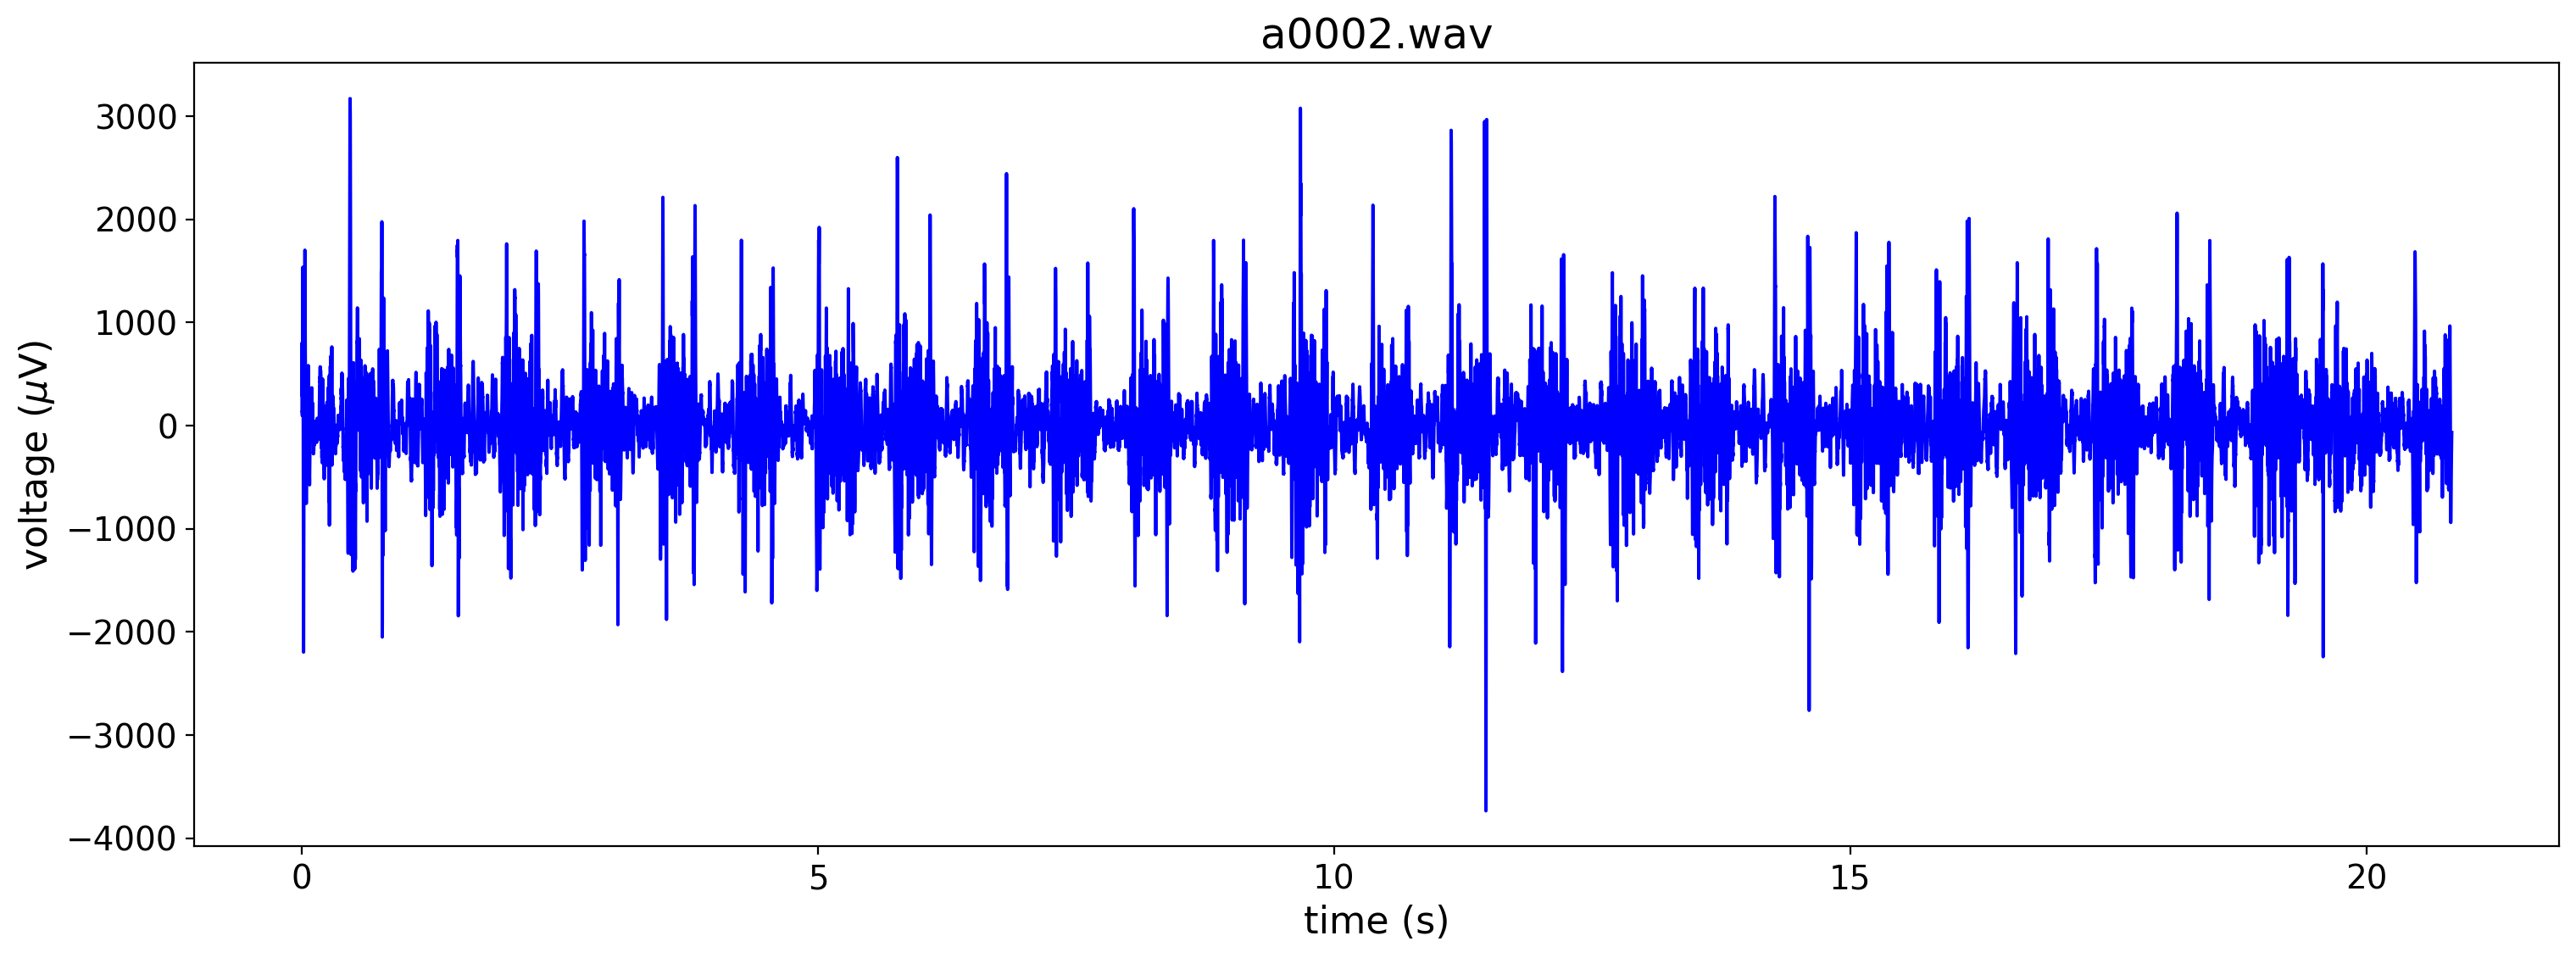

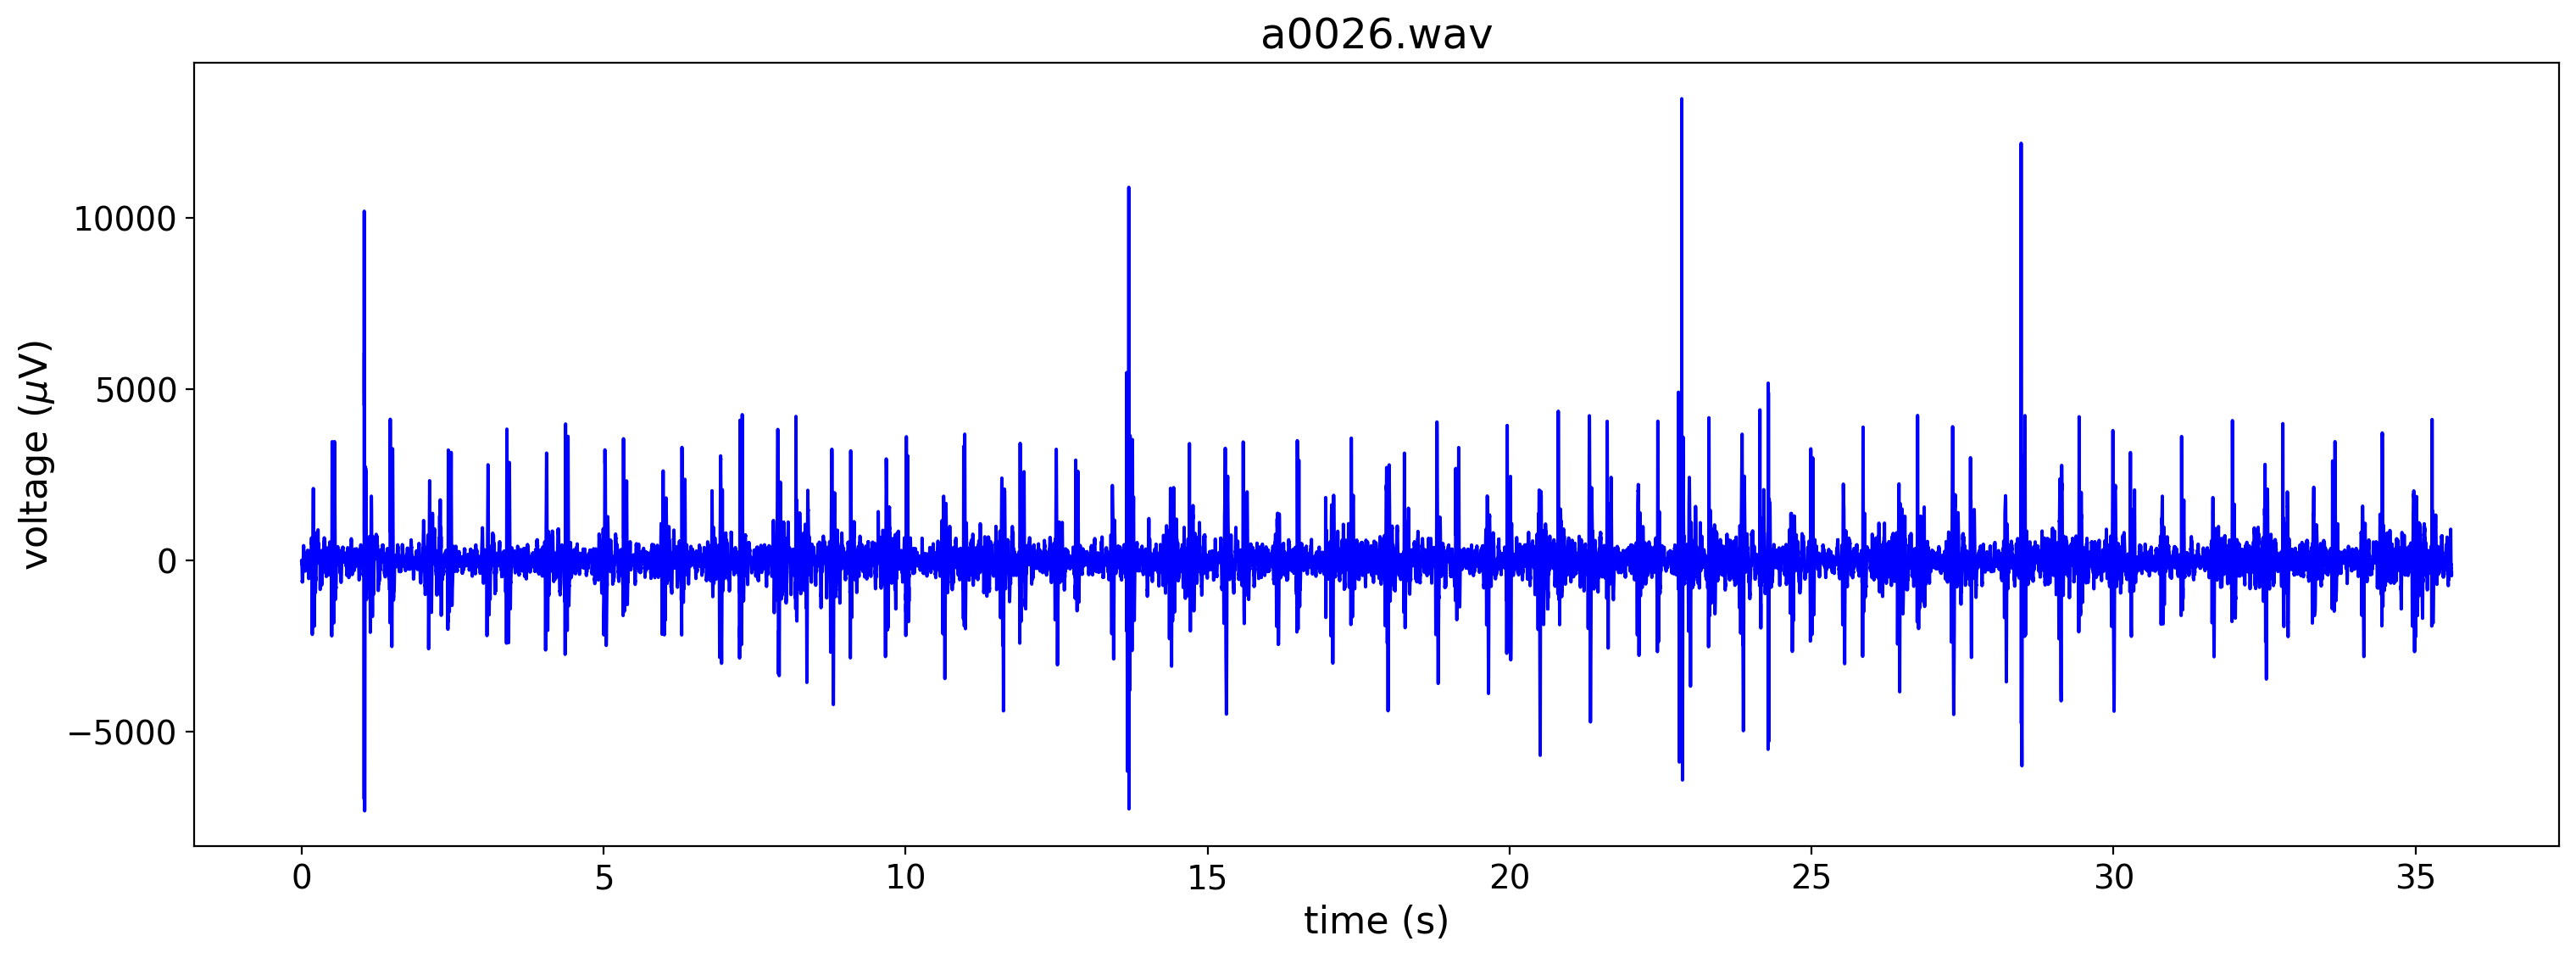

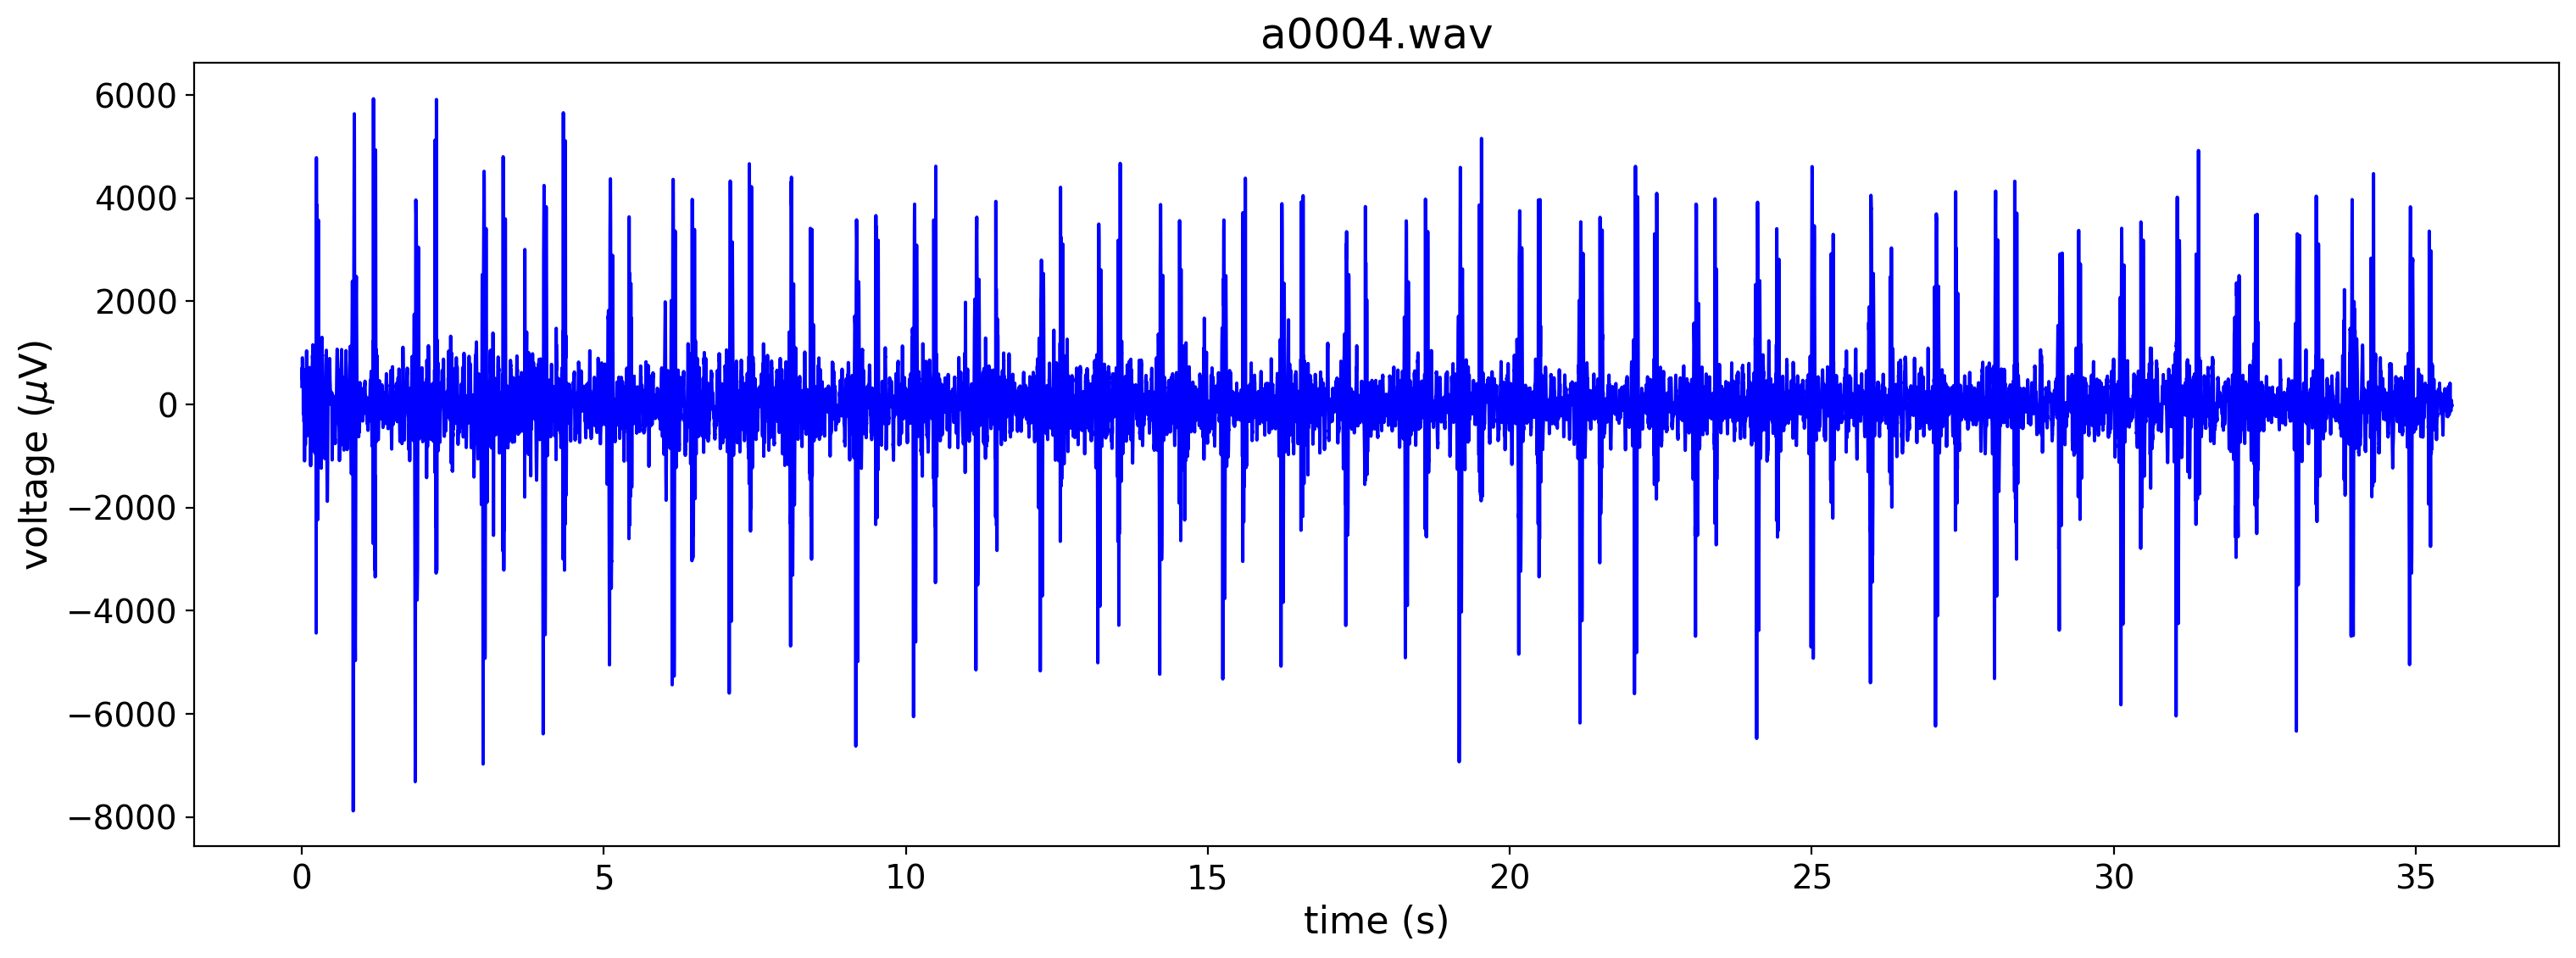

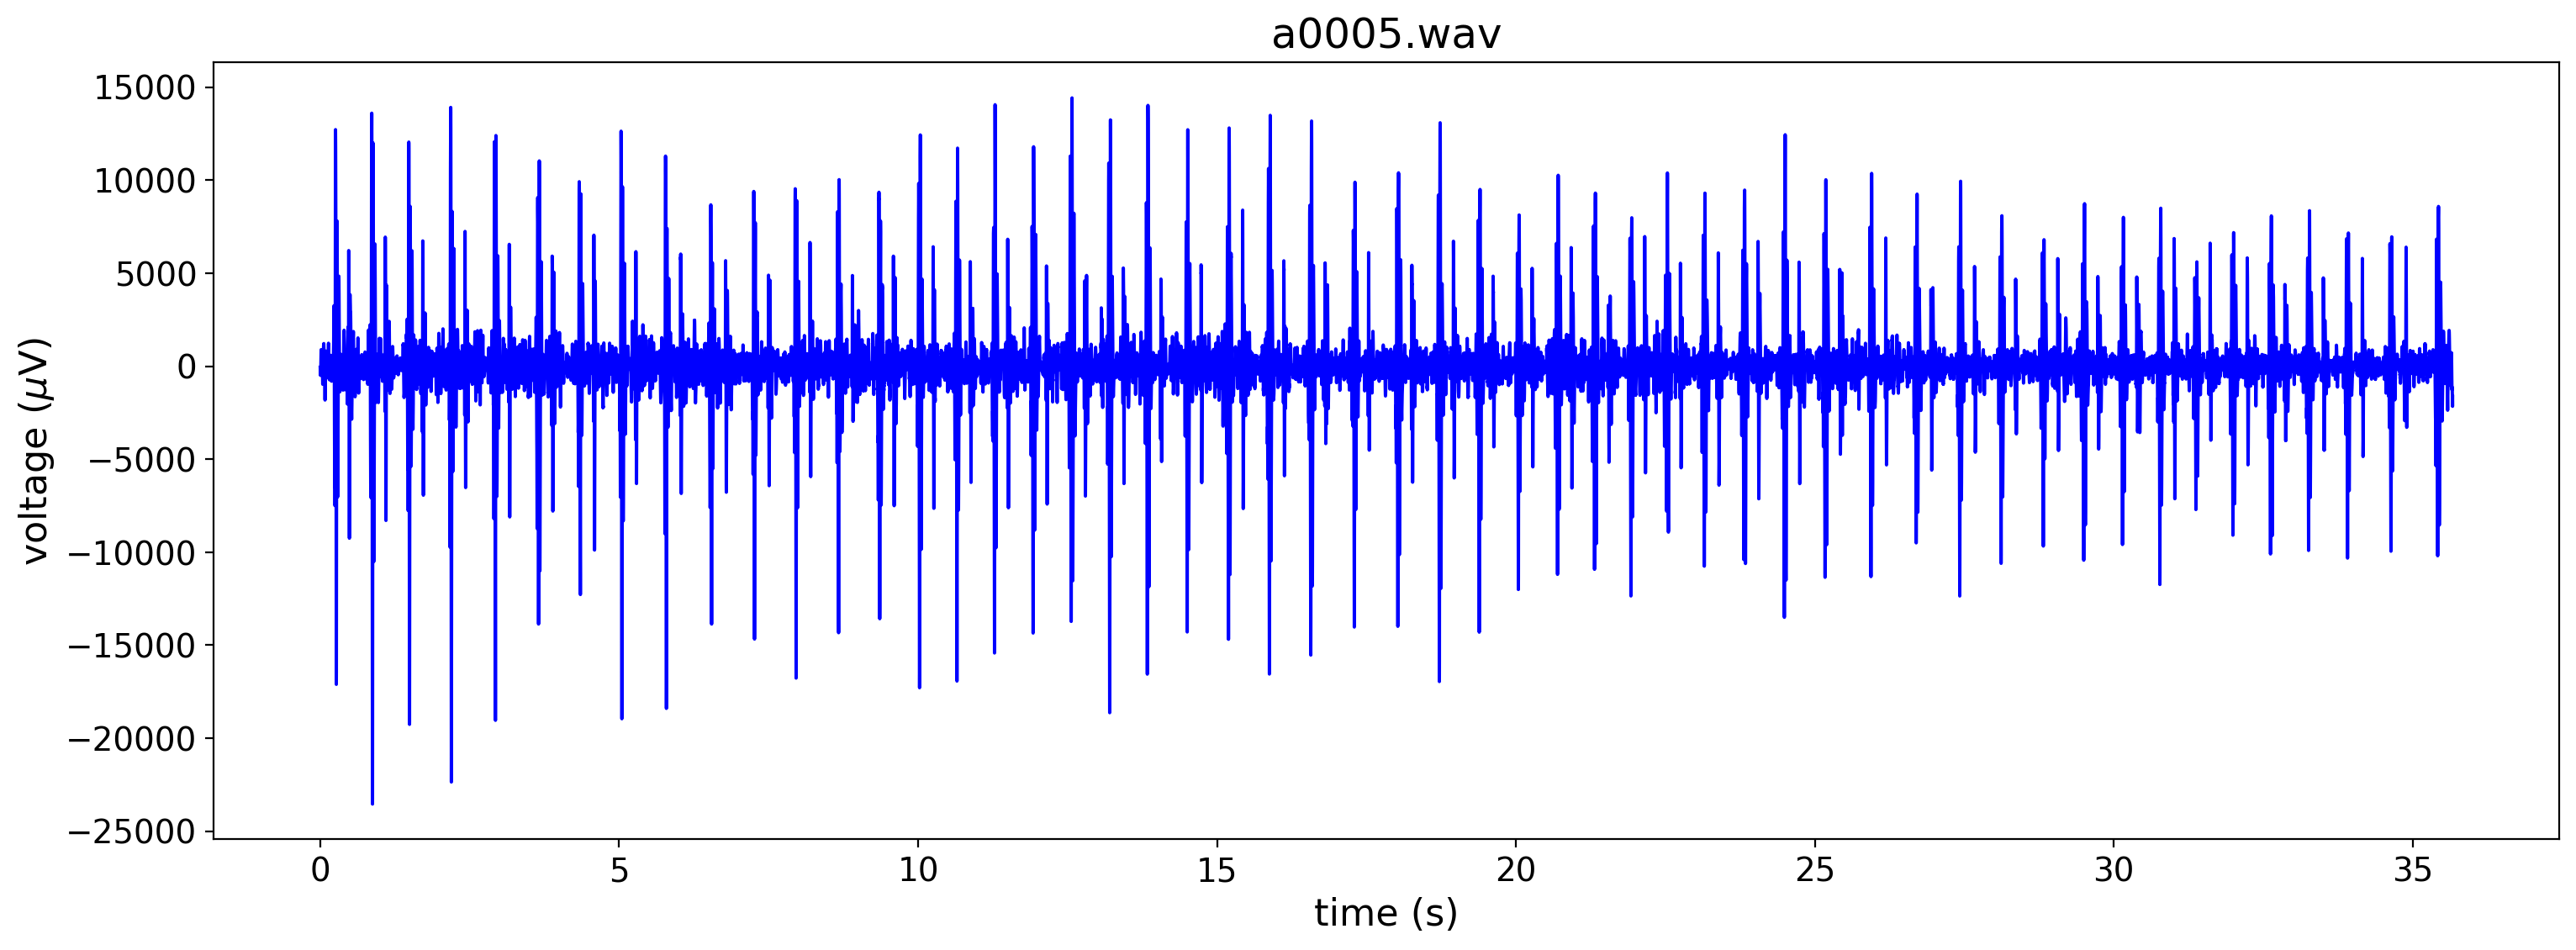

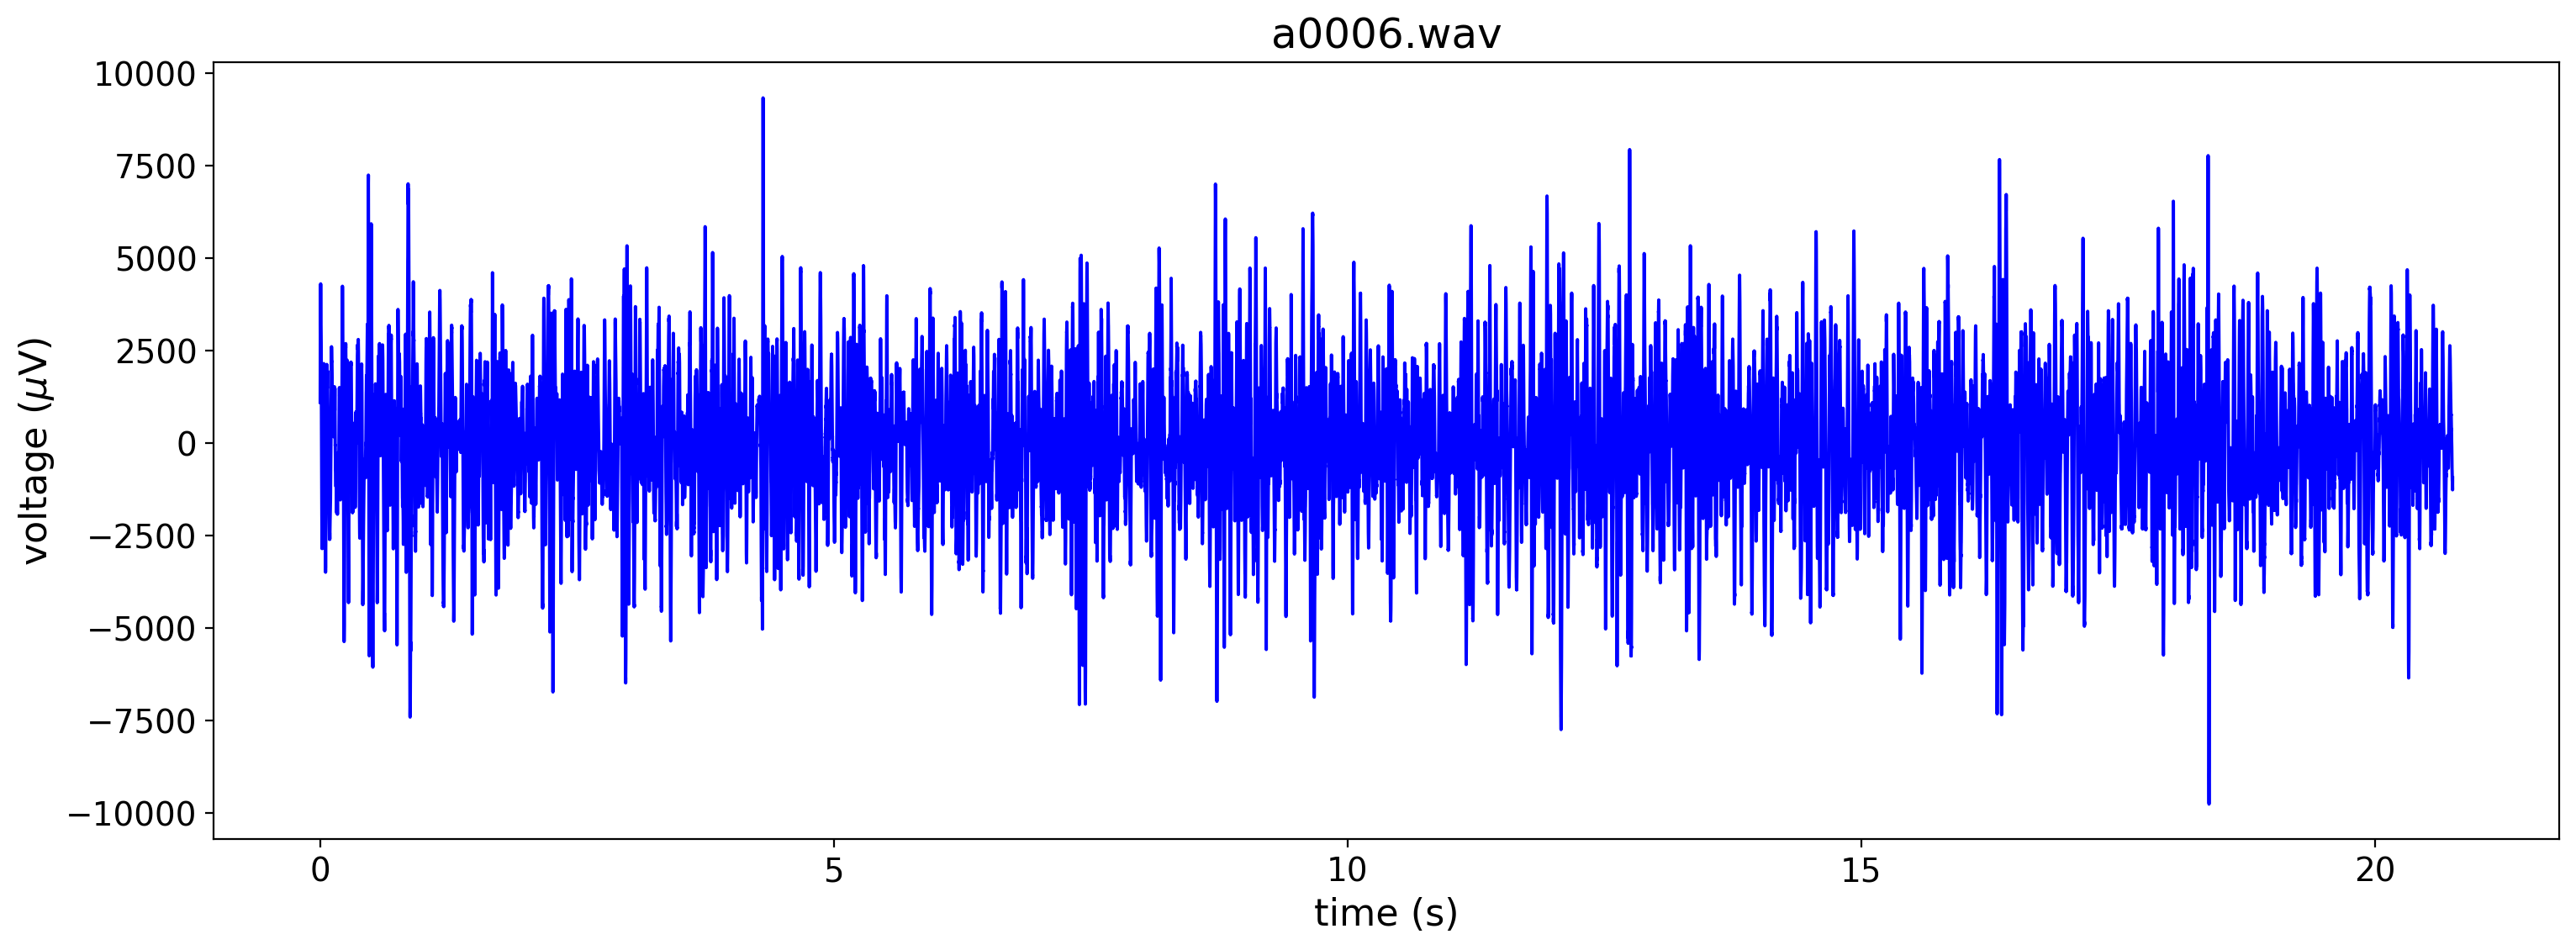

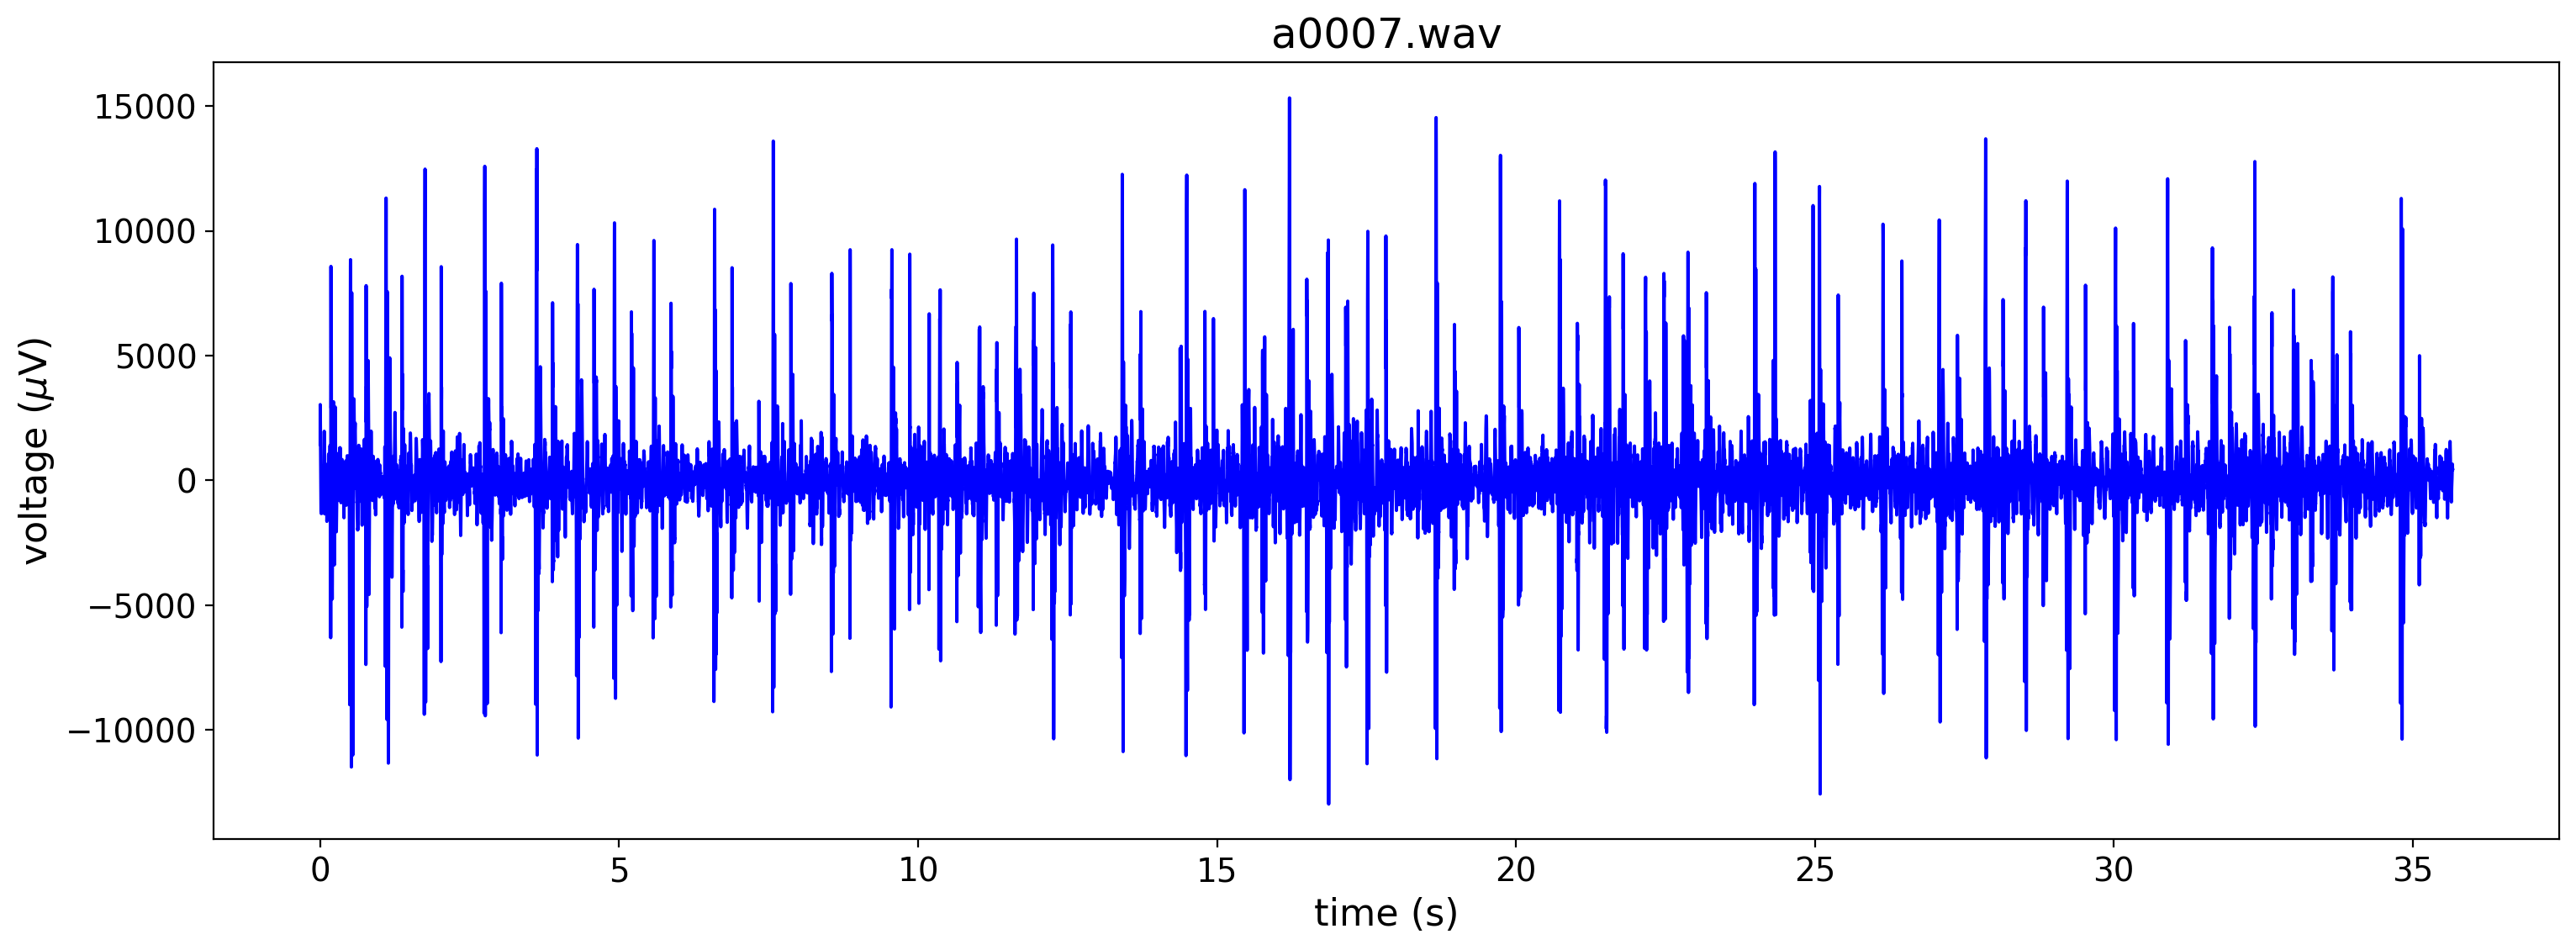

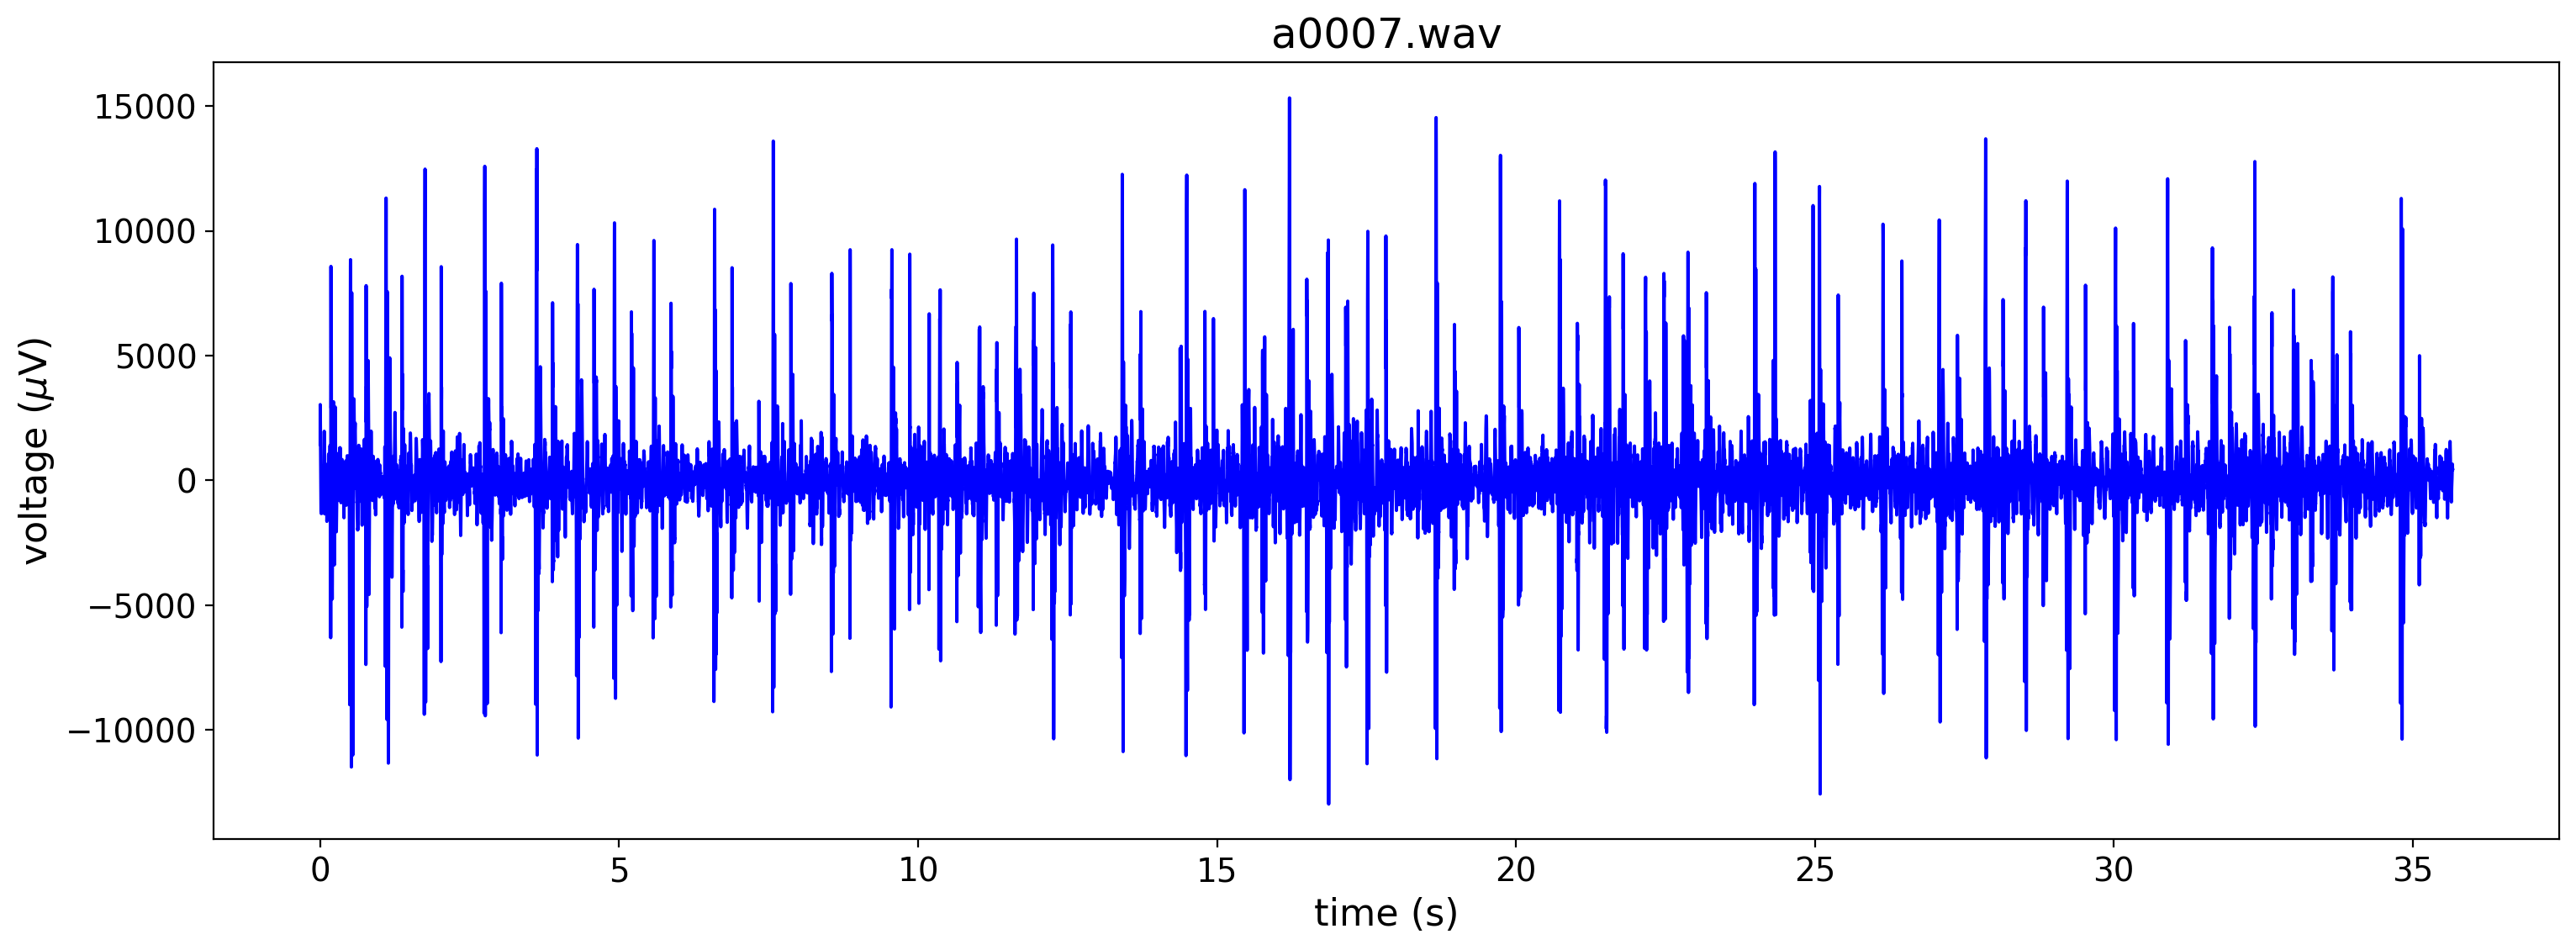

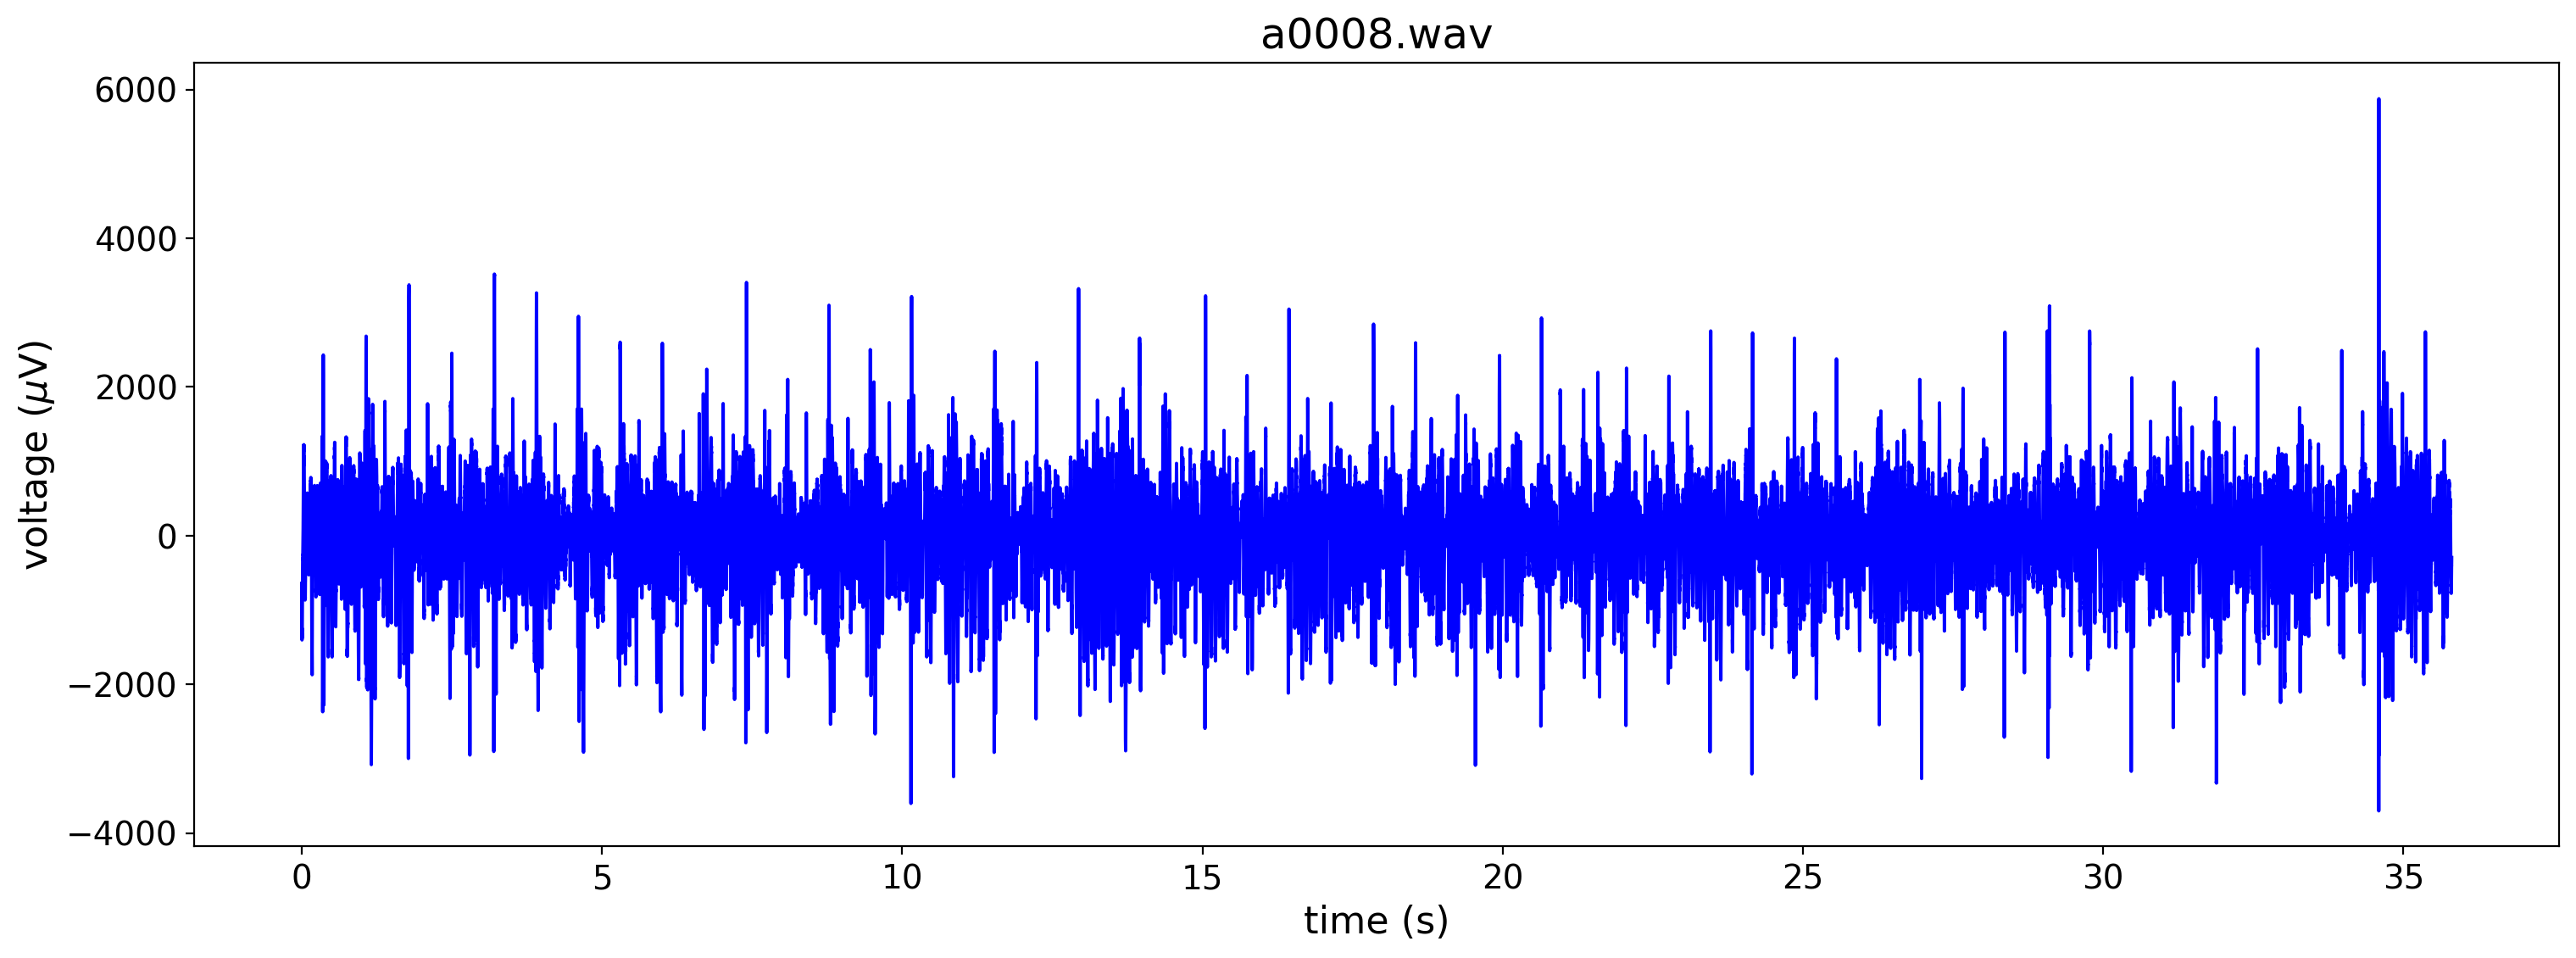

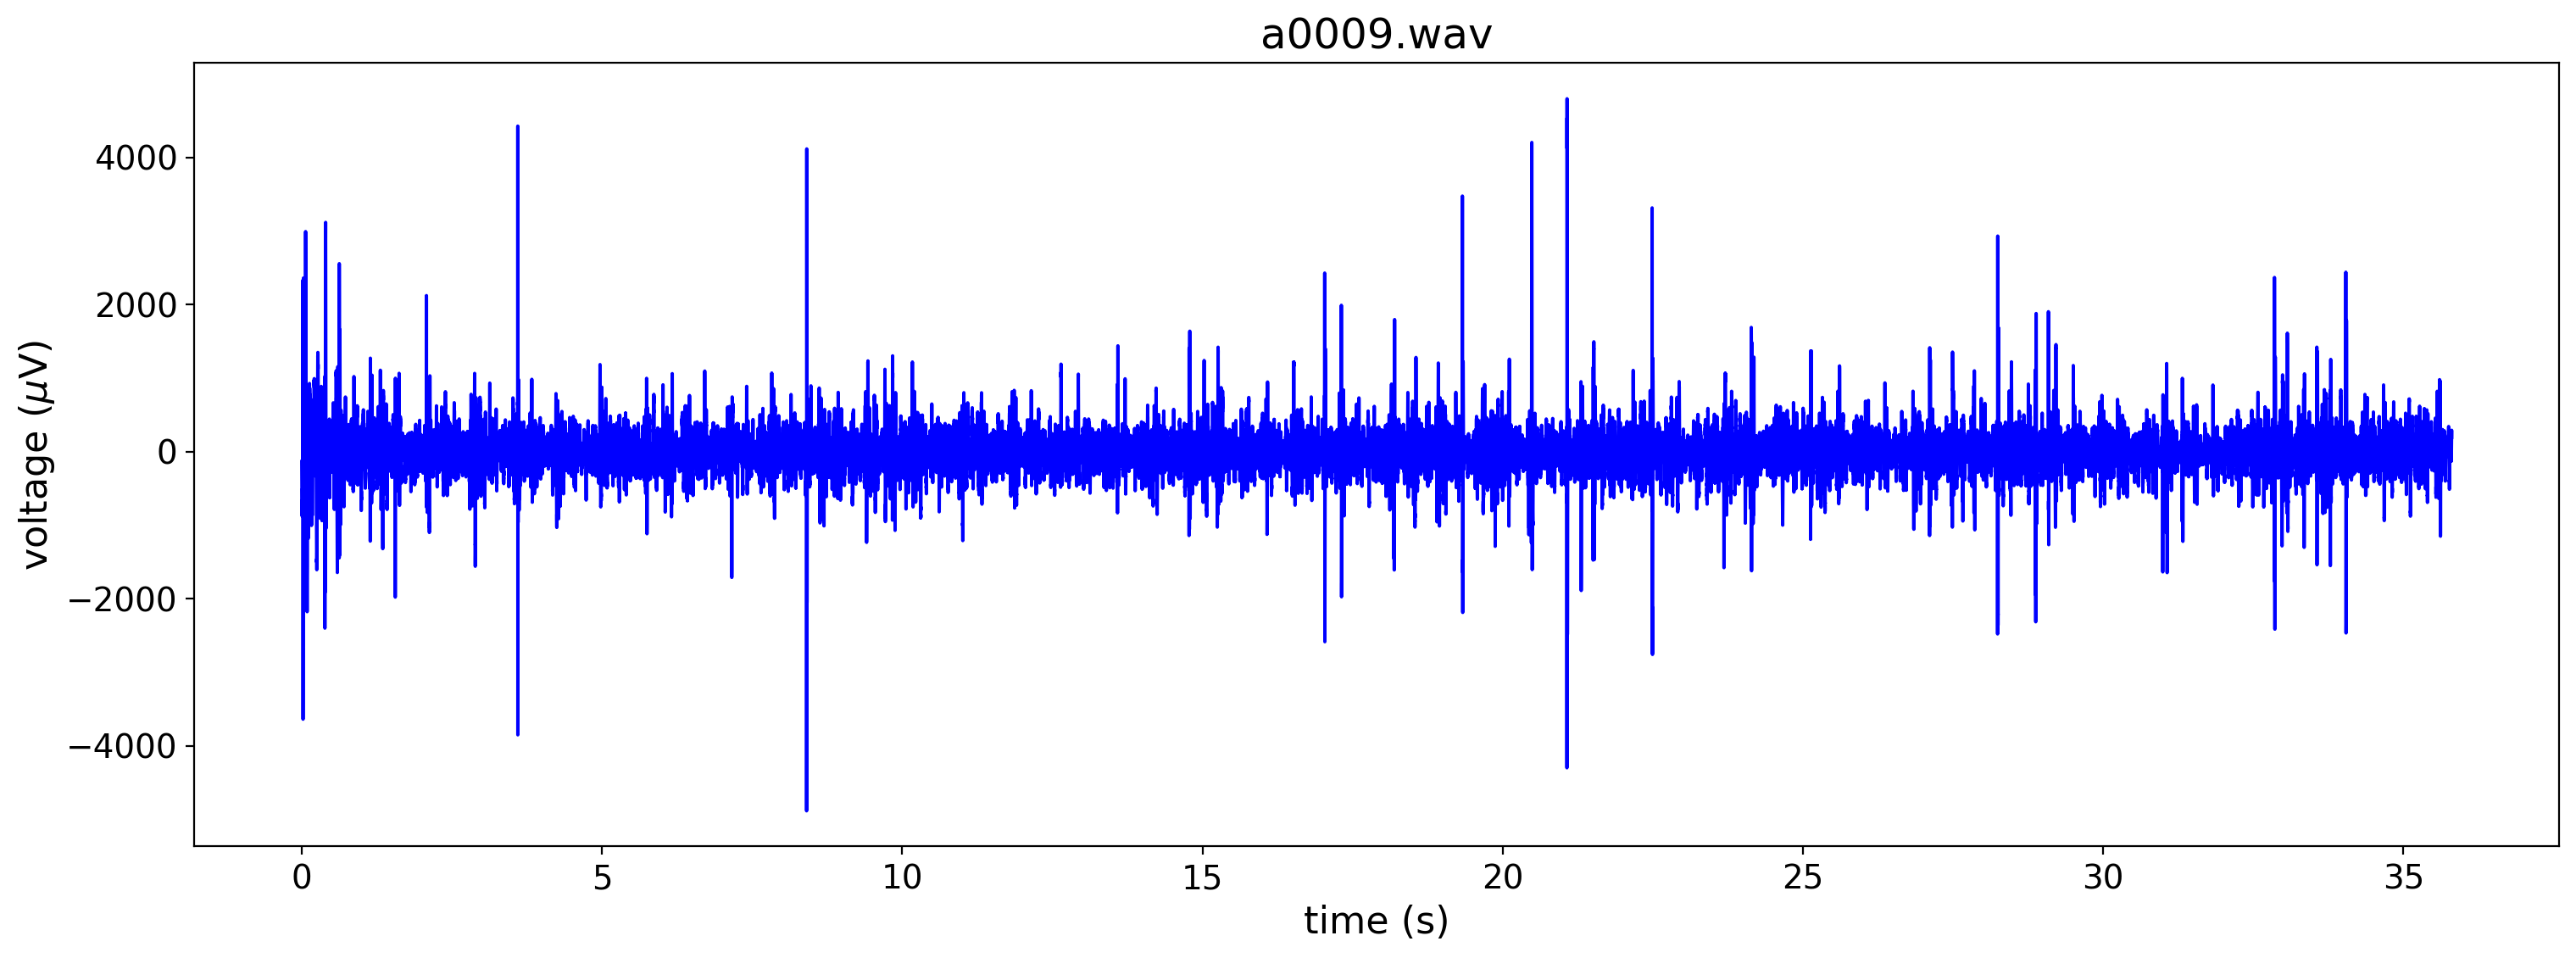

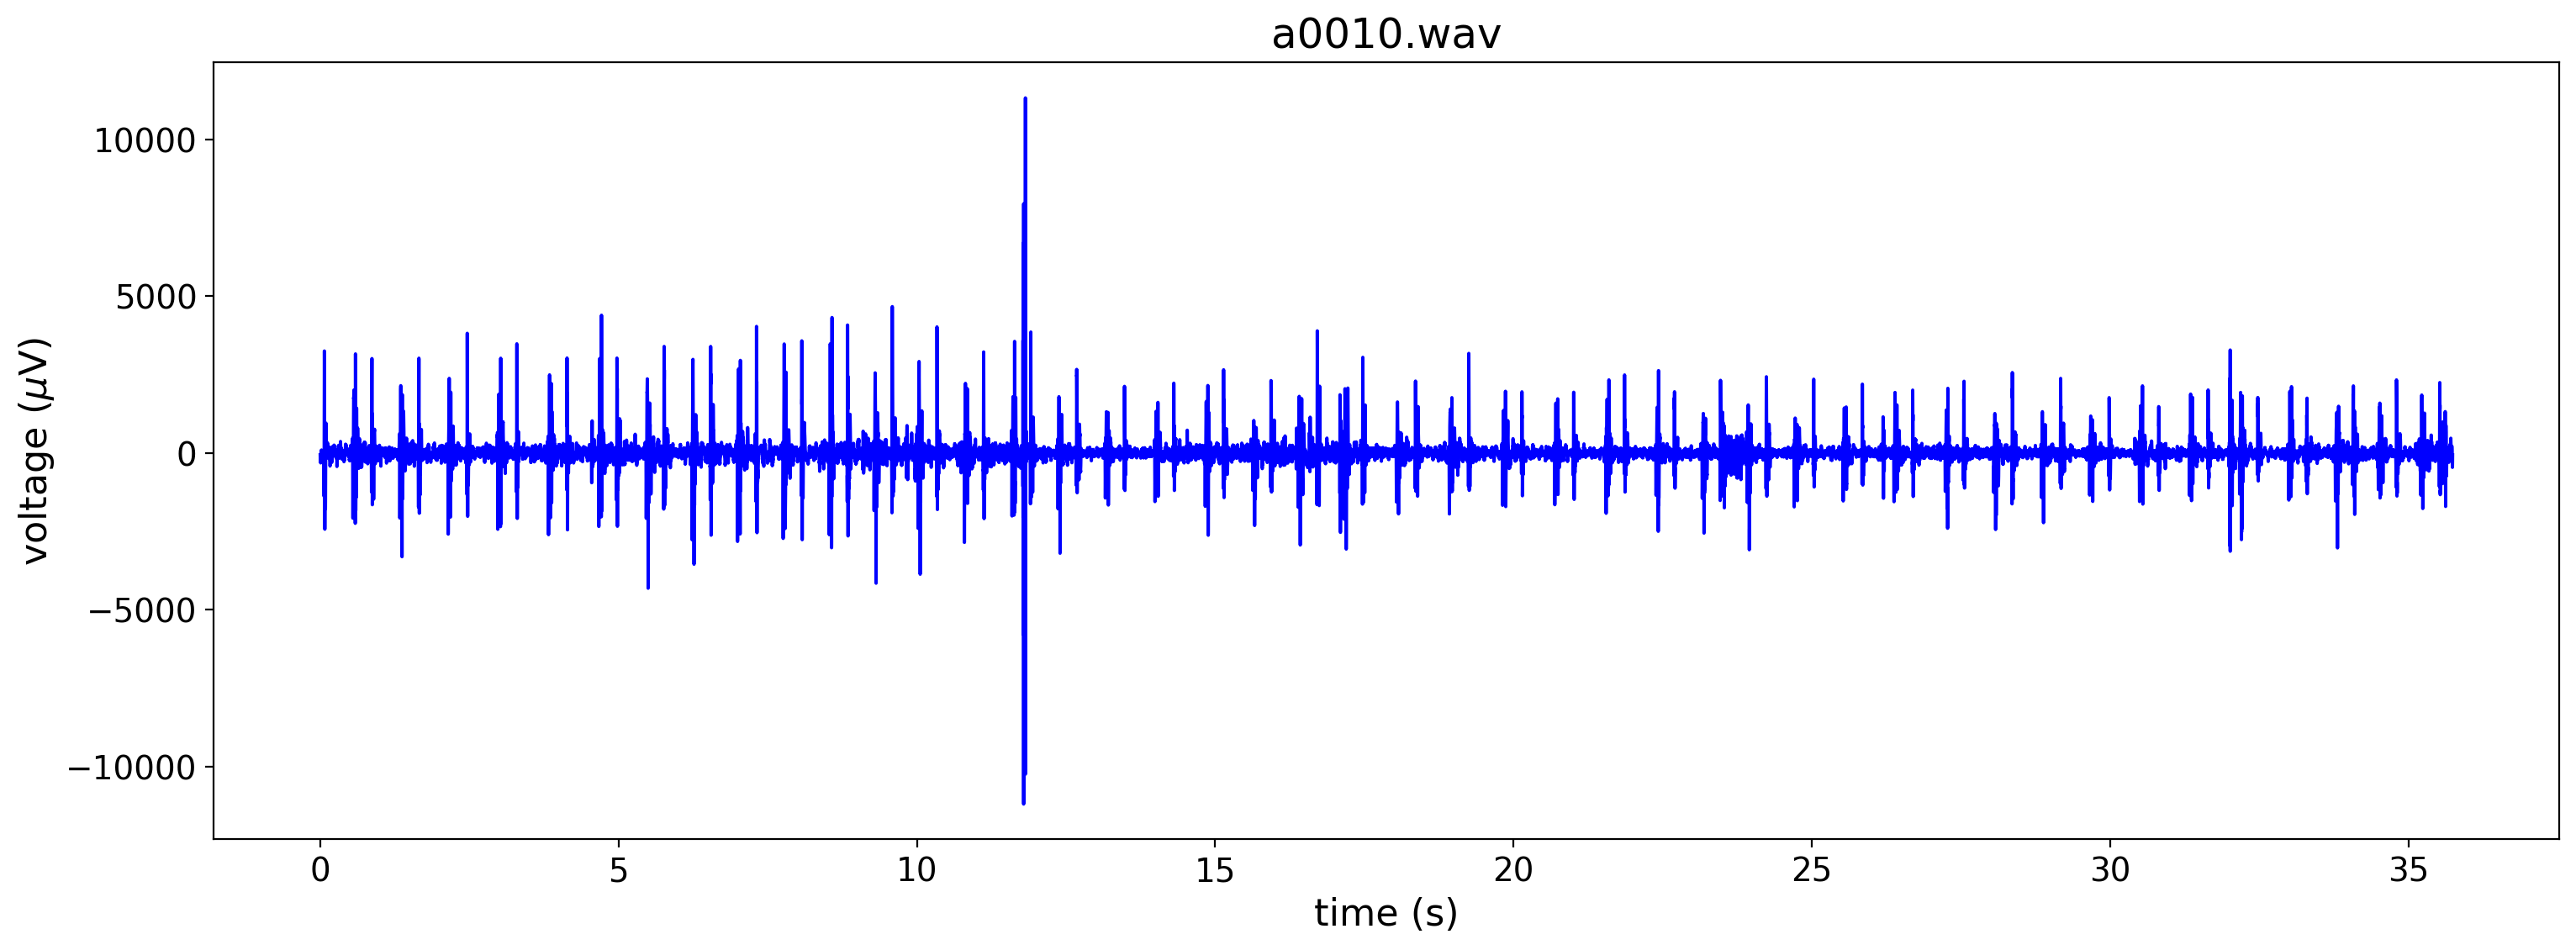

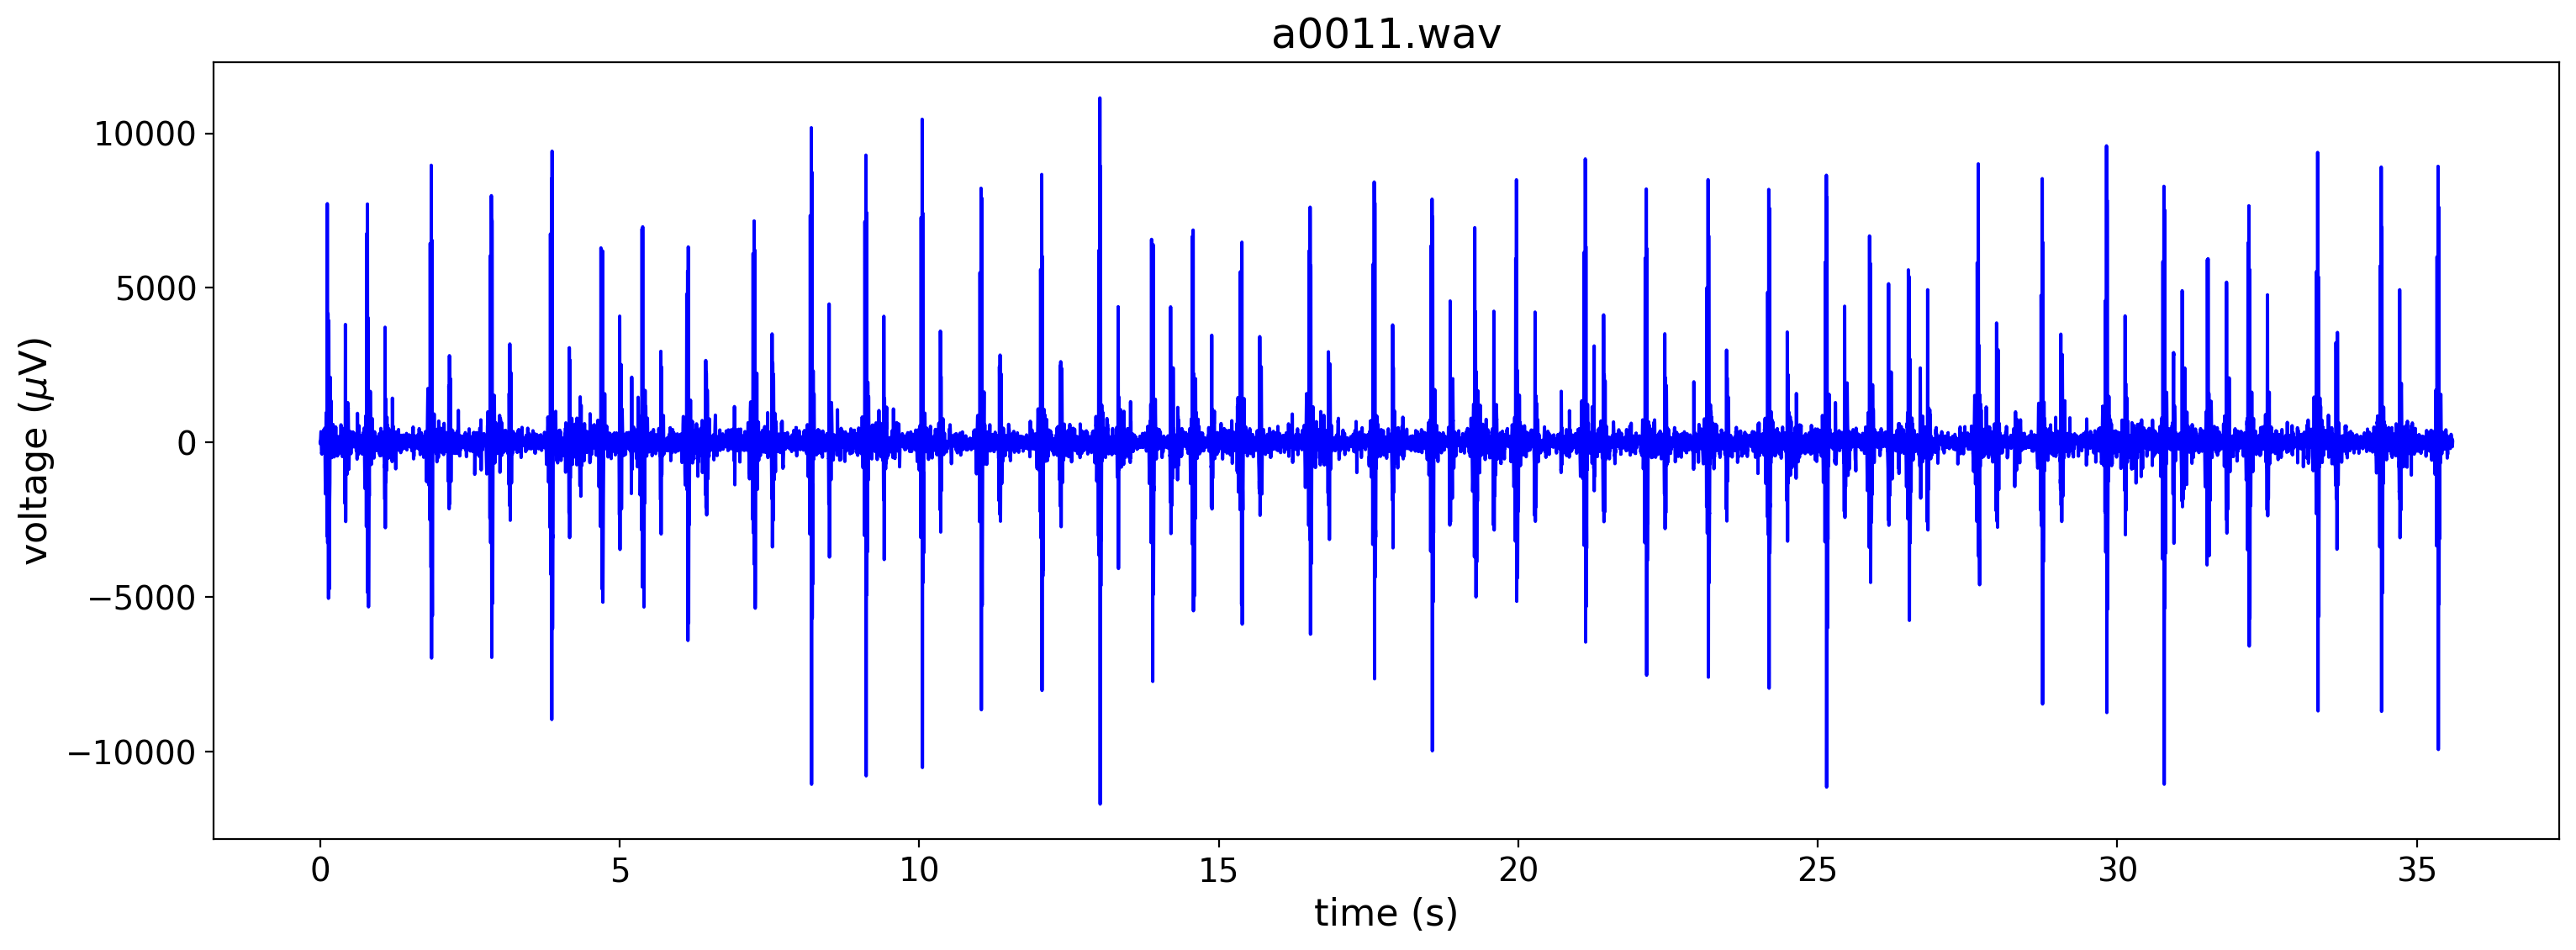

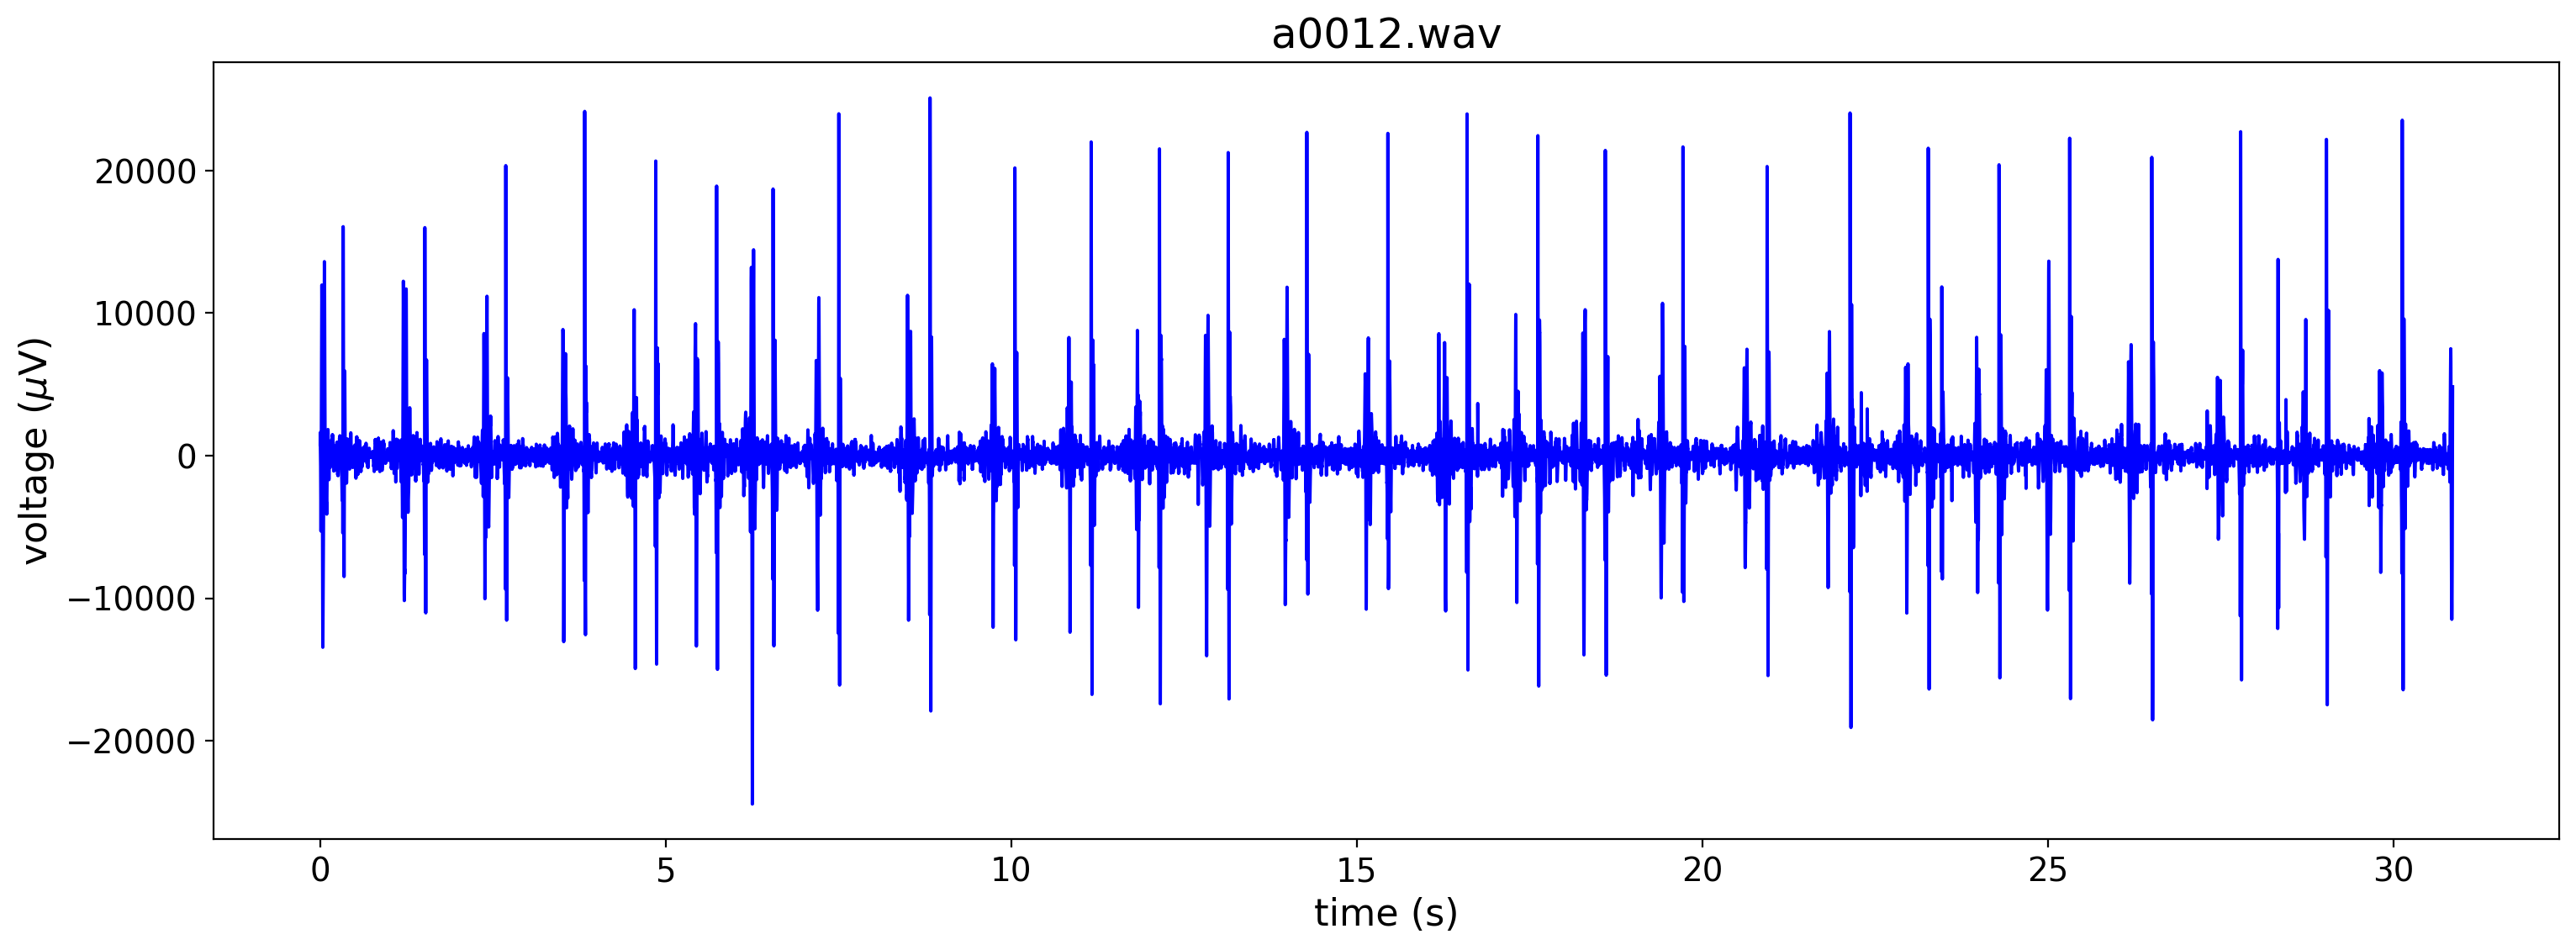

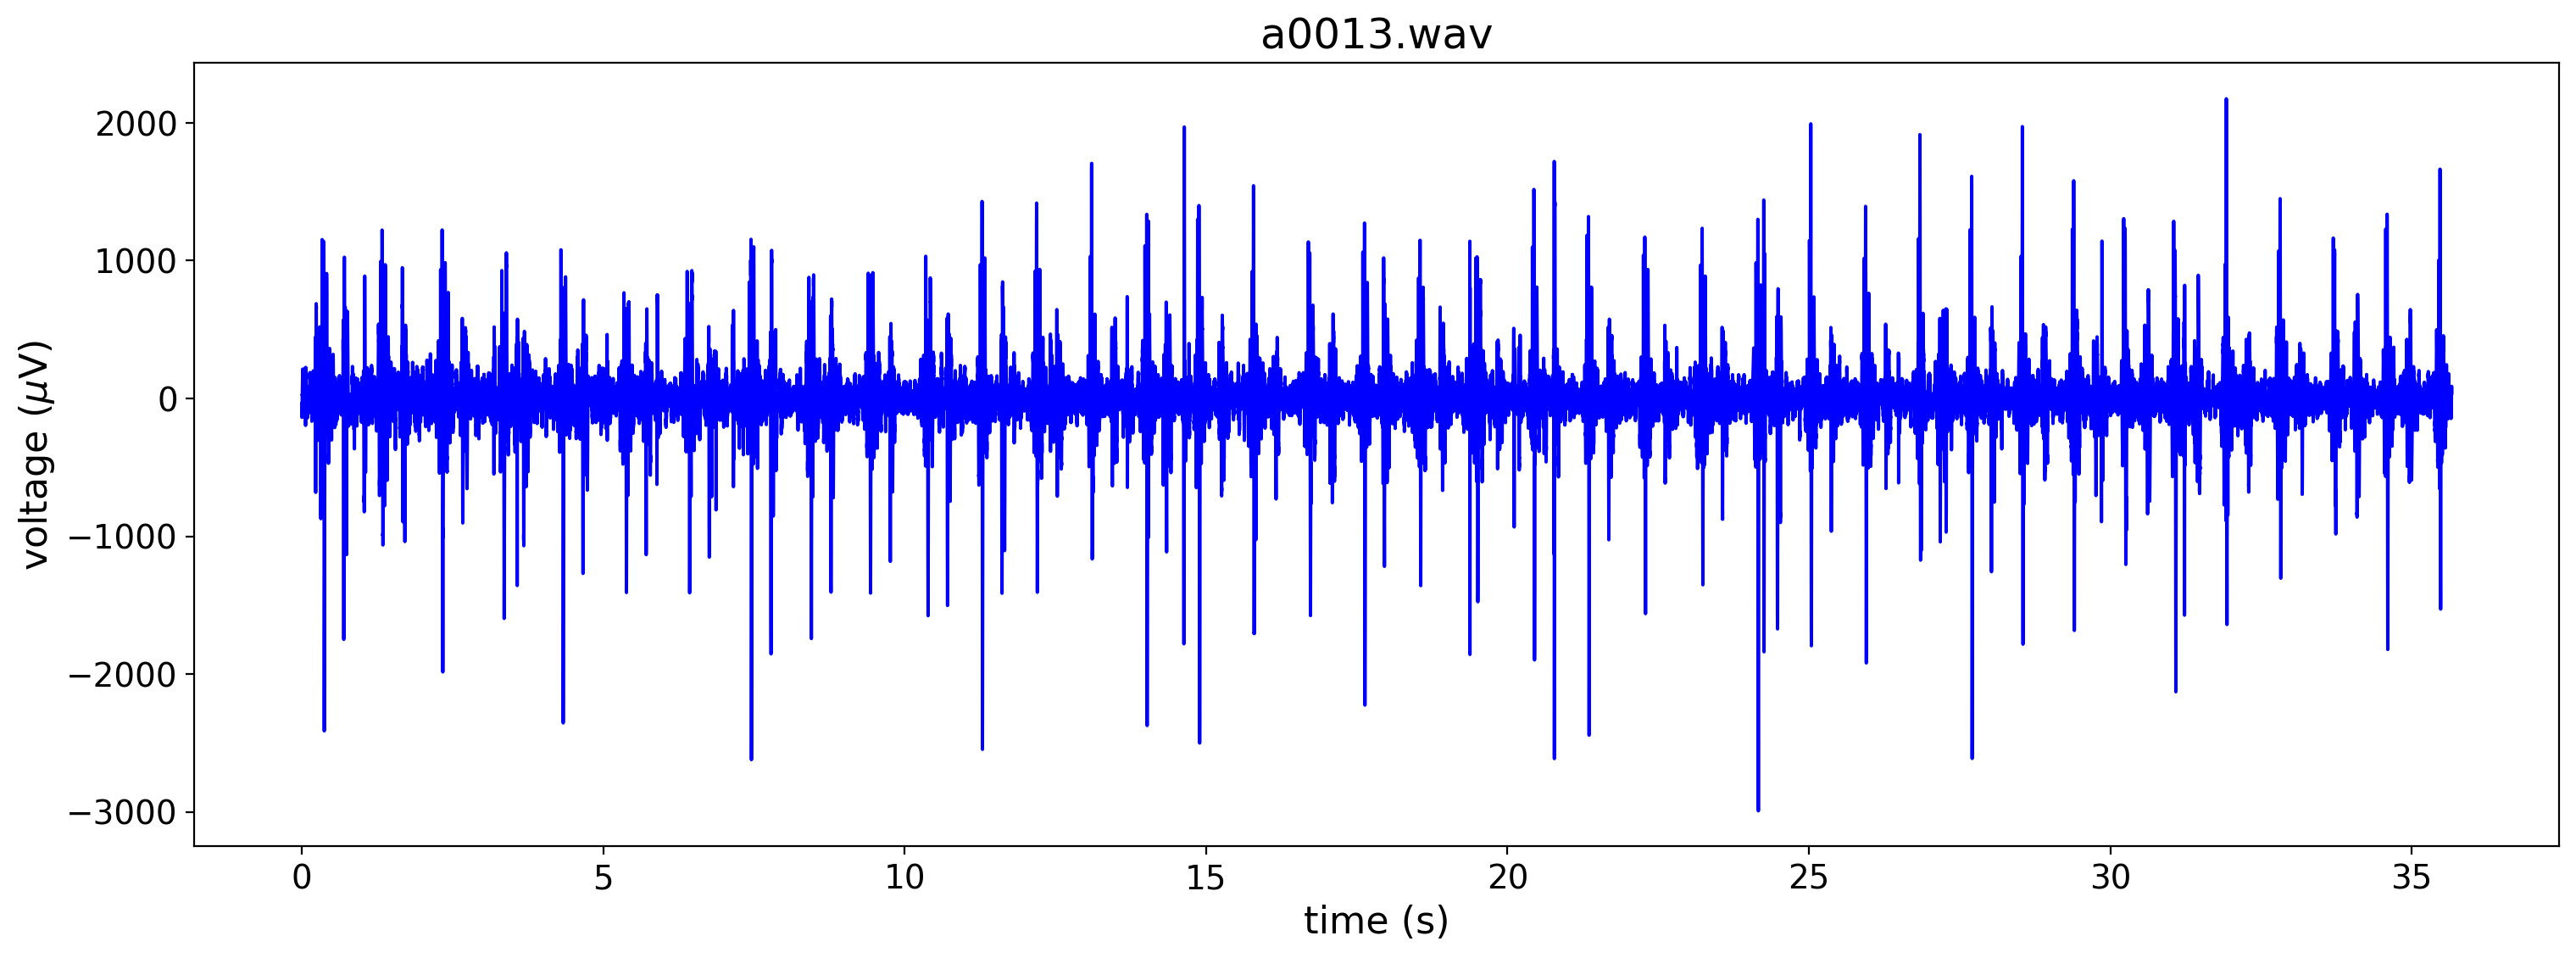

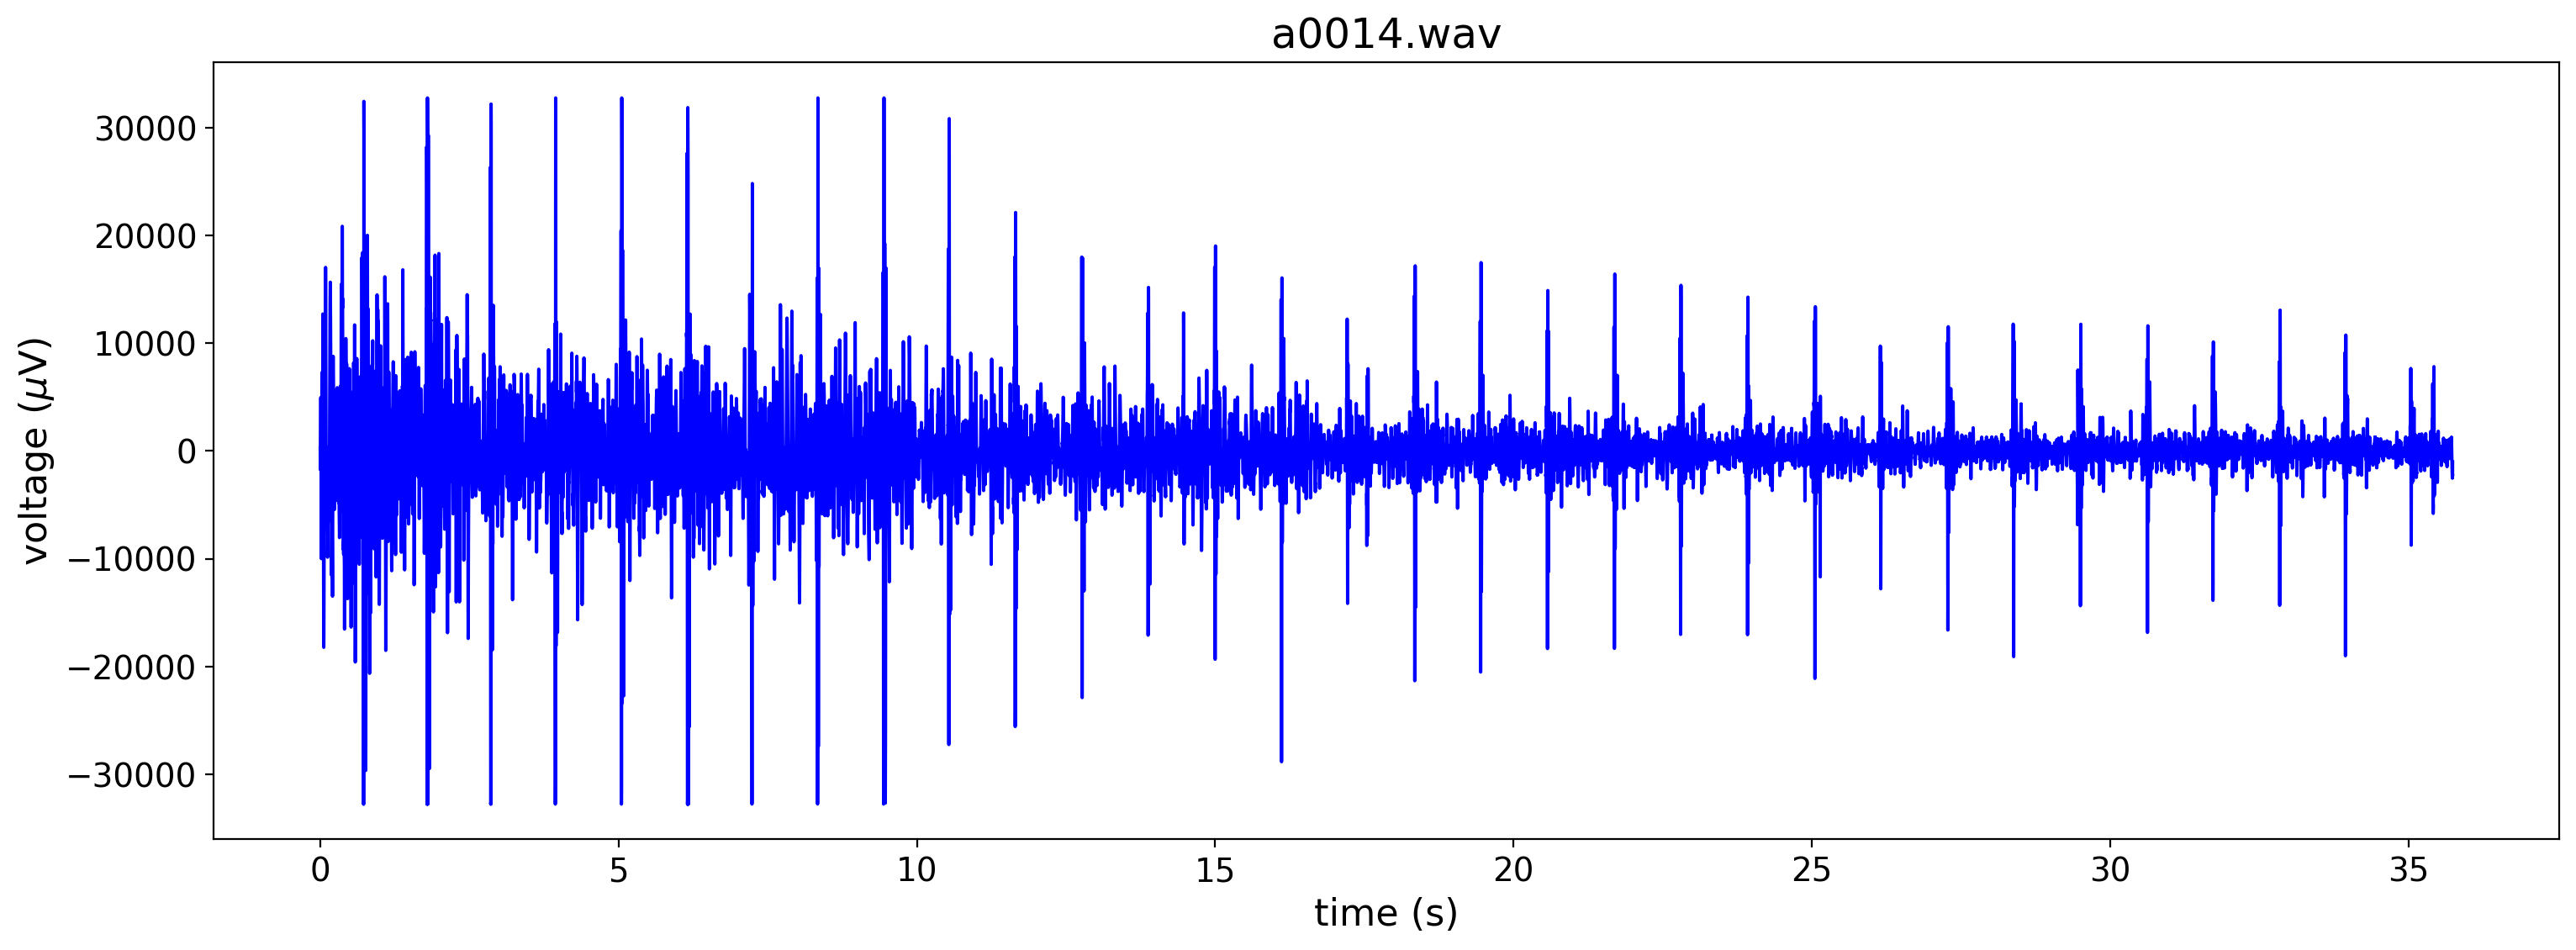

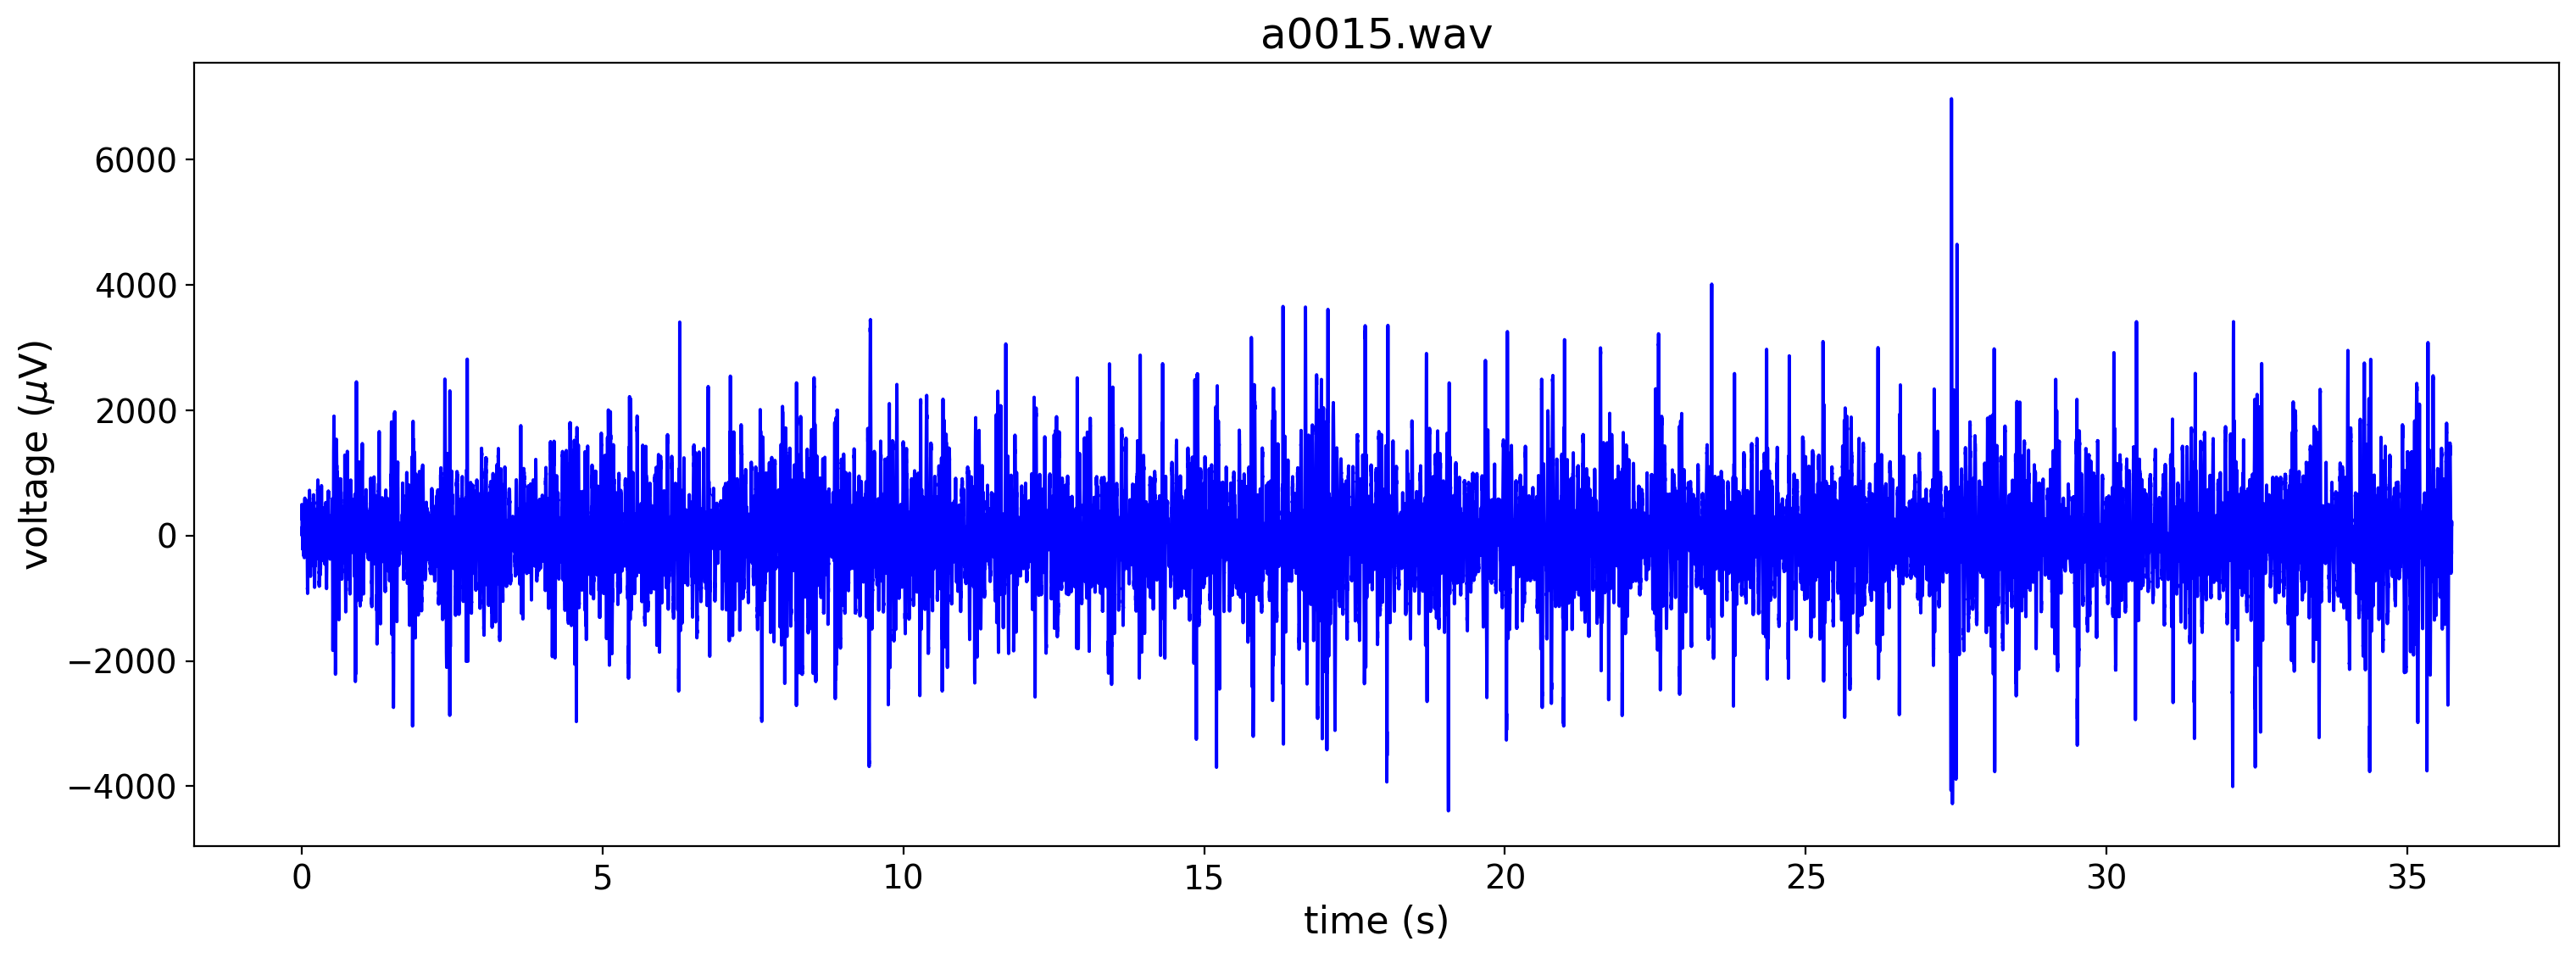

In [5]:
for i in range(0, len(muestras)):
    timeECG, waveData = ecg(audios + muestras[i] )
    # Despliegue de la señal EMG
    plt.figure(figsize=(18,6))
    plt.xlabel(r'time (s)')
    plt.ylabel(r'voltage ($\mu$V)')
    plt.plot(timeECG,waveData, 'b')
    plt.title(muestras[i])
    plt.show()

Ahora es muy importante analizar lo que nos muestran los resultados de las gráficas. En algunos casos, es posible observar los diferentes ciclos, por lo tanto, se podría aproximar un período. En algunas de las muestras de audio esto se ve muy bien porque incluso las amplitudes de cada ciclo son muy similares. Otro aspecto importante a mencionar es que estamos ante señales continuas y no discretas, ya que se puede observar que no se trata de simplemente pulsos en la señal. Además, se trata de señales causales, puesto que las imágenes tienen valores diferentes de cero, luego del instante cero en el tiempo.
Finalmente se puede mencionar que algunas de las muestras presentan cambios muy abruptos en la muestra del voltaje esto se puede deber a algún ruido o interferencias que hubiese en el archivo de audio correspondiente.


##Acercamiento de un archivo de audio
Ahora se quiere mostrar un solo latido y luego tres latidos para alguno de los audios. Esto se conseguirá realizando un acercamiento en la gráfica. Se debe escoger un archivo de audio que muestre una señal en la que se puedan notar los diferentes ciclos de la forma más estable posible. Entonces se elige el archivo de audio número doce.
Mencionar que a nivel de código lo que se hace es recortar el tiempo establecido para graficar la señal, y luego se ajustan las dimensiones de los ejes de la gráfica para conseguir ver los acercamientos a las señales.


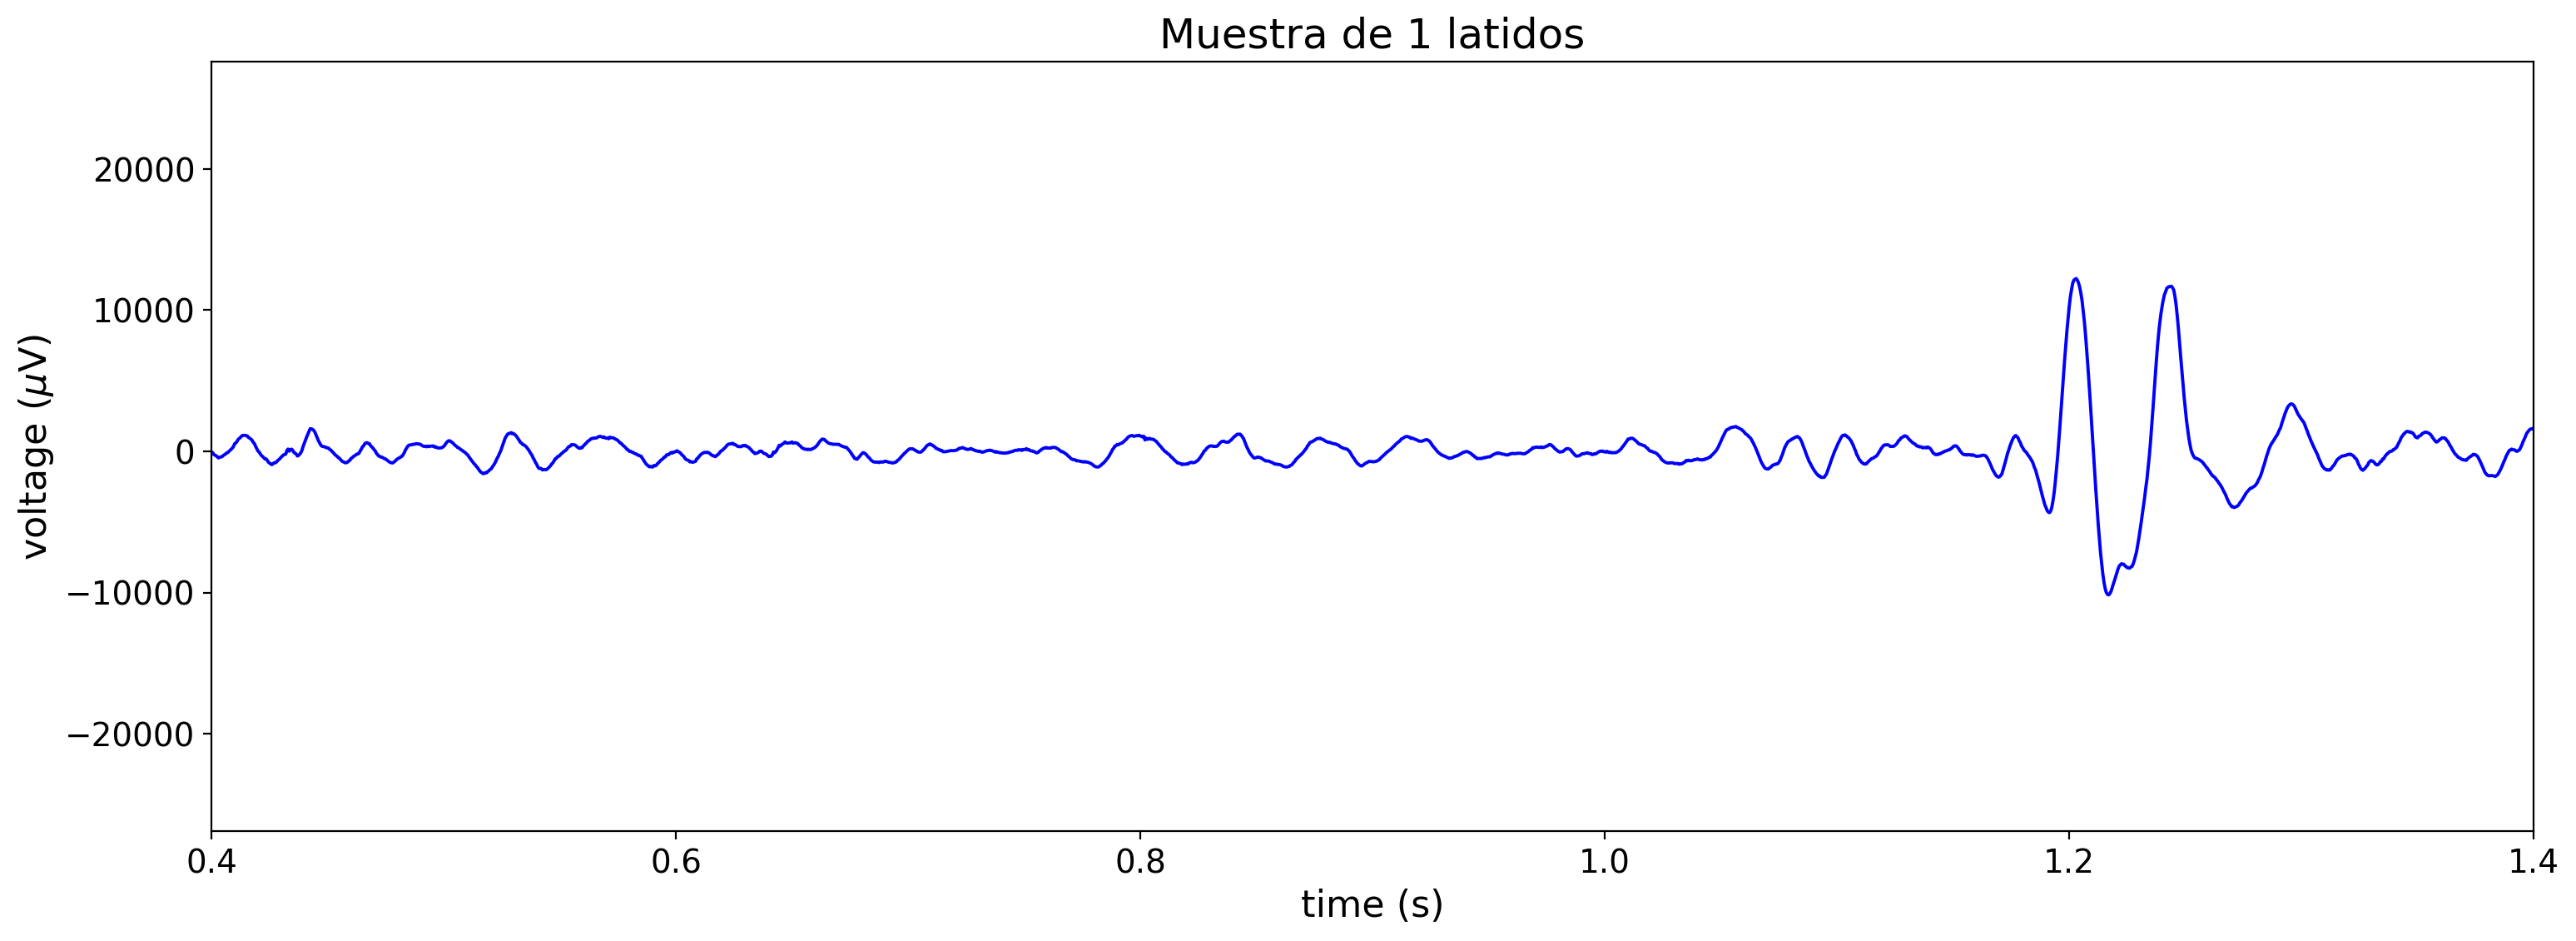

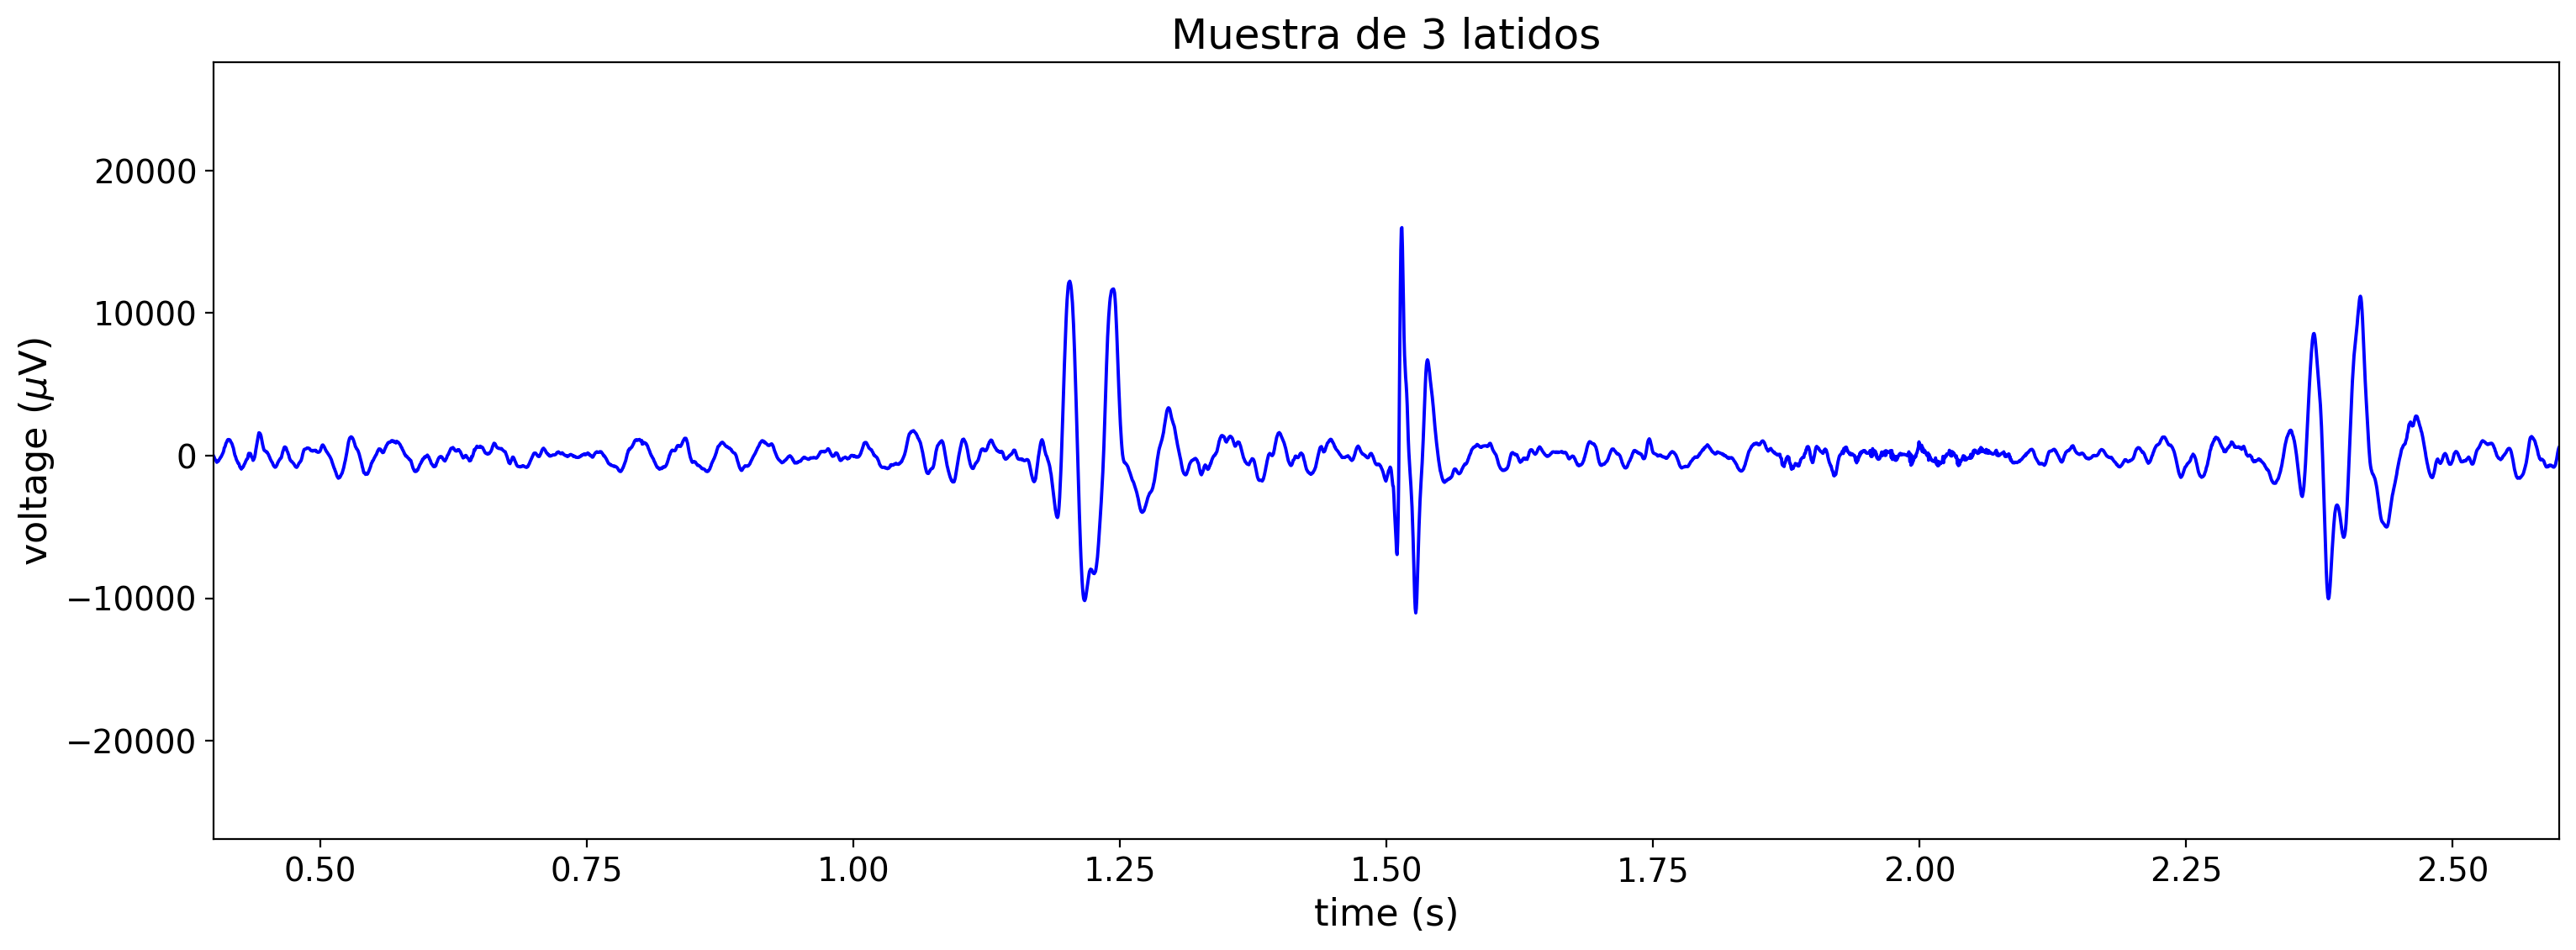

In [6]:
#Obtaining data
timeECG, waveData = ecg(audios + "a0012.wav")
# Se puede hacer una gráfica de un solo latido y tres latidos, realizando modificaciones en el tiempo que se mira la señal. Especificamente. Disminuir ese tiempo, de forma que solo se aprecien los latidos deseados
#EMG 1 latidos
plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.plot(timeECG,waveData, 'b')
plt.xlim(.40,1.4)
plt.title("Muestra de 1 latidos")
plt.show()
timeECG, waveData = ecg(audios + "a0012.wav")
# EMG 3 latidos
plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.plot(timeECG,waveData, 'b')
plt.xlim(.40,2.6)
plt.title("Muestra de 3 latidos")
plt.show()


##Frecuencia cardiaca de las señales
Ahora se requiere estimar la frecuencia cardiaca de las 15 señales que mostramos anteriormente.
El primer procedimiento para conseguir esta tarea es la obtención de los máximos de cada una de las señales. Esto es porque en la siguiente función se requerirá dicha información. Por lo tanto, se procede a realizar una función que nos permita recorrer de nuevo la lista de audios e ir almacenando los puntos máximos de cada una de las señales para luego devolver estos datos como un arreglo.

In [7]:
def detecta_maximos_locales(timeECG, waveData, threshold_ratio=0.7):

##creacion de excepcion por error, para evitar que se indique error en el programa
    if len(timeECG) != len(waveData):
        raise Exception("Los arreglos tienen diferentes tamaños")
##se crean arrreglos vacios, para luego rellenarlos con los datos
    interval = max(waveData) - min(waveData)
    threshold = threshold_ratio*interval + min(waveData)
    maxima = []
    maxima_indices = []
    mxs_indices = []
    banner = False
##se empiezan a rellenar los arreglos
    for i in range(0, len(waveData)):

        if waveData[i] >= threshold:
            banner = True
            maxima_indices.append(i)
            maxima.append(waveData[i])

        elif banner == True and waveData[i] < threshold:

            index_local_max = maxima.index(max(maxima))
            mxs_indices.append(maxima_indices[index_local_max])
            maxima = []
            maxima_indices = []
            banner = False
##devuelvo al programa los datos deseados en el arreglo correspondiente
    return mxs_indices

Una vez que tenemos la información de los máximos de cada una de las señales, el primer paso será determinar los latidos por minutos. Por lo tanto, se realiza una operación matemática utilizando la información de los máximos mencionados anteriormente, y entonces se despliega una leyenda de latidos por minuto con la información requerida.
Después se quiere calcular la frecuencia cardiaca, de nuevo se utiliza la información de los máximos, y se realiza una operación matemática en cada uno de los diferentes archivos de audio. Lógicamente para conseguir este propósito se debe recorrer la lista donde se guardan los archivos. Luego se utilizan diferentes comandos que nos permiten realizar un despliegue de las diferentes gráficas donde se nos muestra la frecuencia cardíaca de cada una de las diferentes señales.
Vale la pena mencionar que en el gráfico se muestran informaciones tales como una línea de tendencia de la frecuencia cardíaca, adicional a esto el promedio de la frecuencia cardiaca y su desviación estándar.


Pulsaciones por minuto: 60.56187966130209


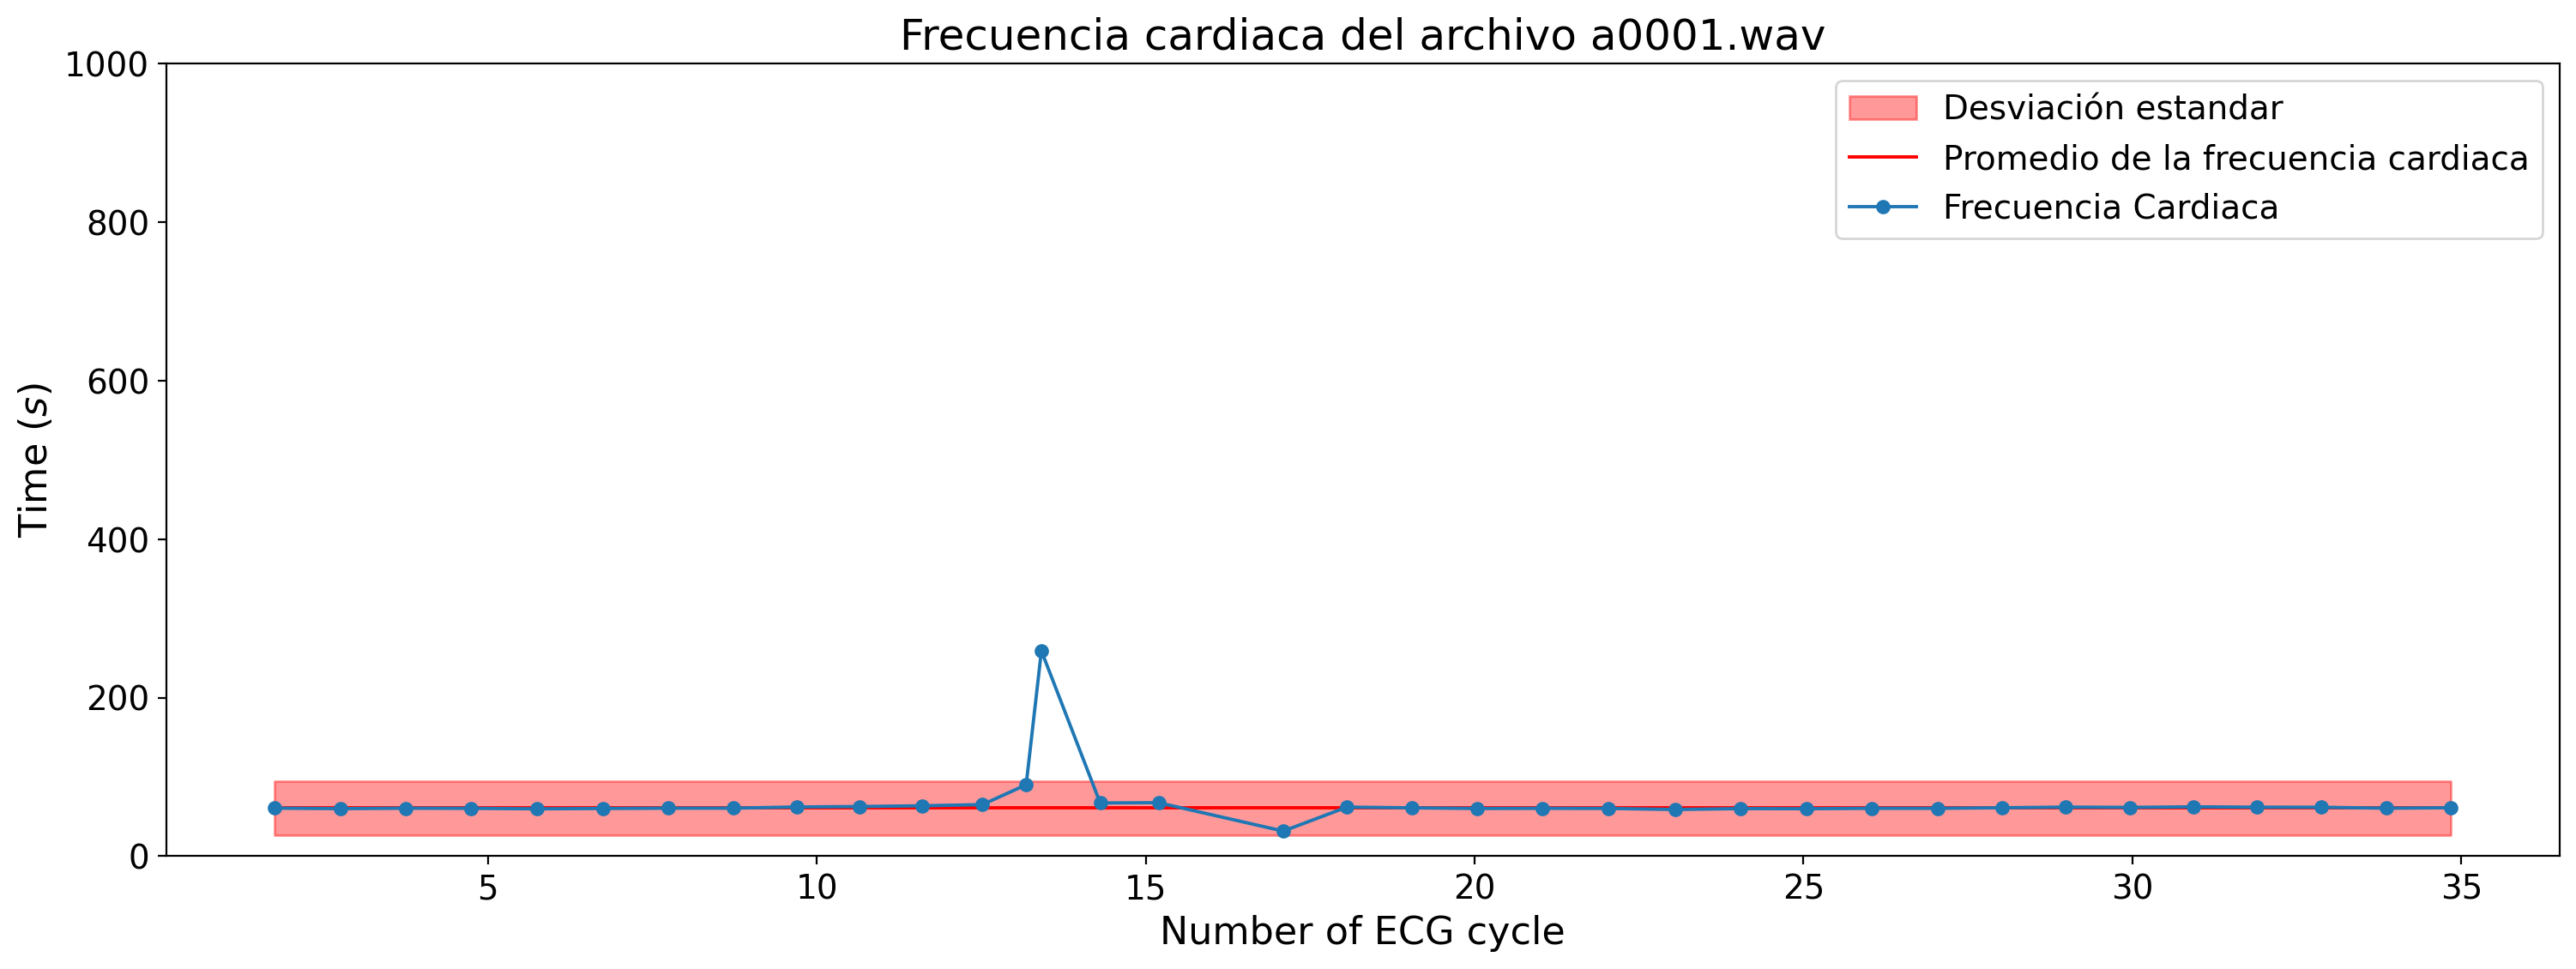

Pulsaciones por minuto: 296.7088364500564


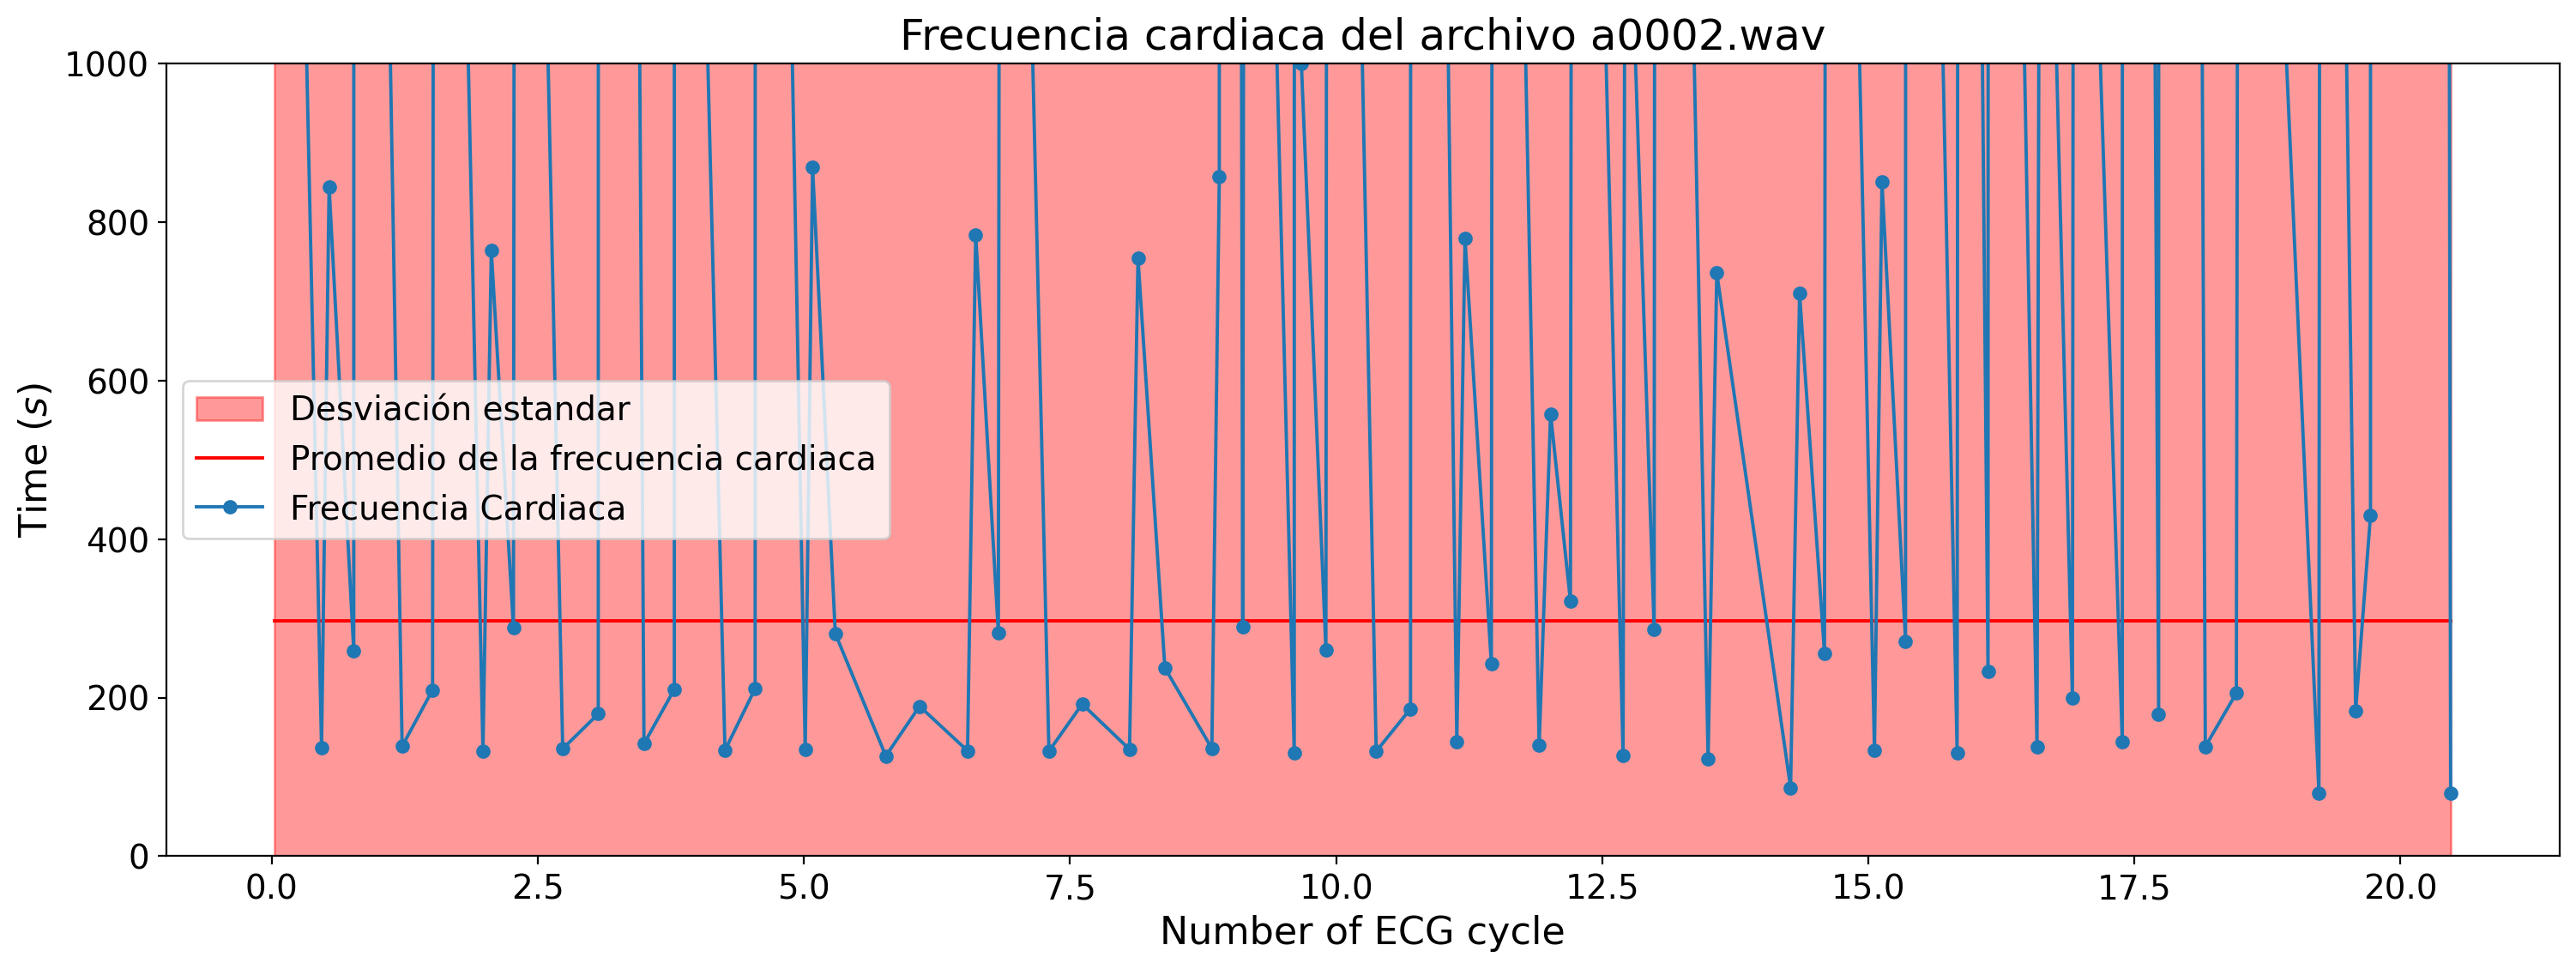

Pulsaciones por minuto: 6.742235893978341


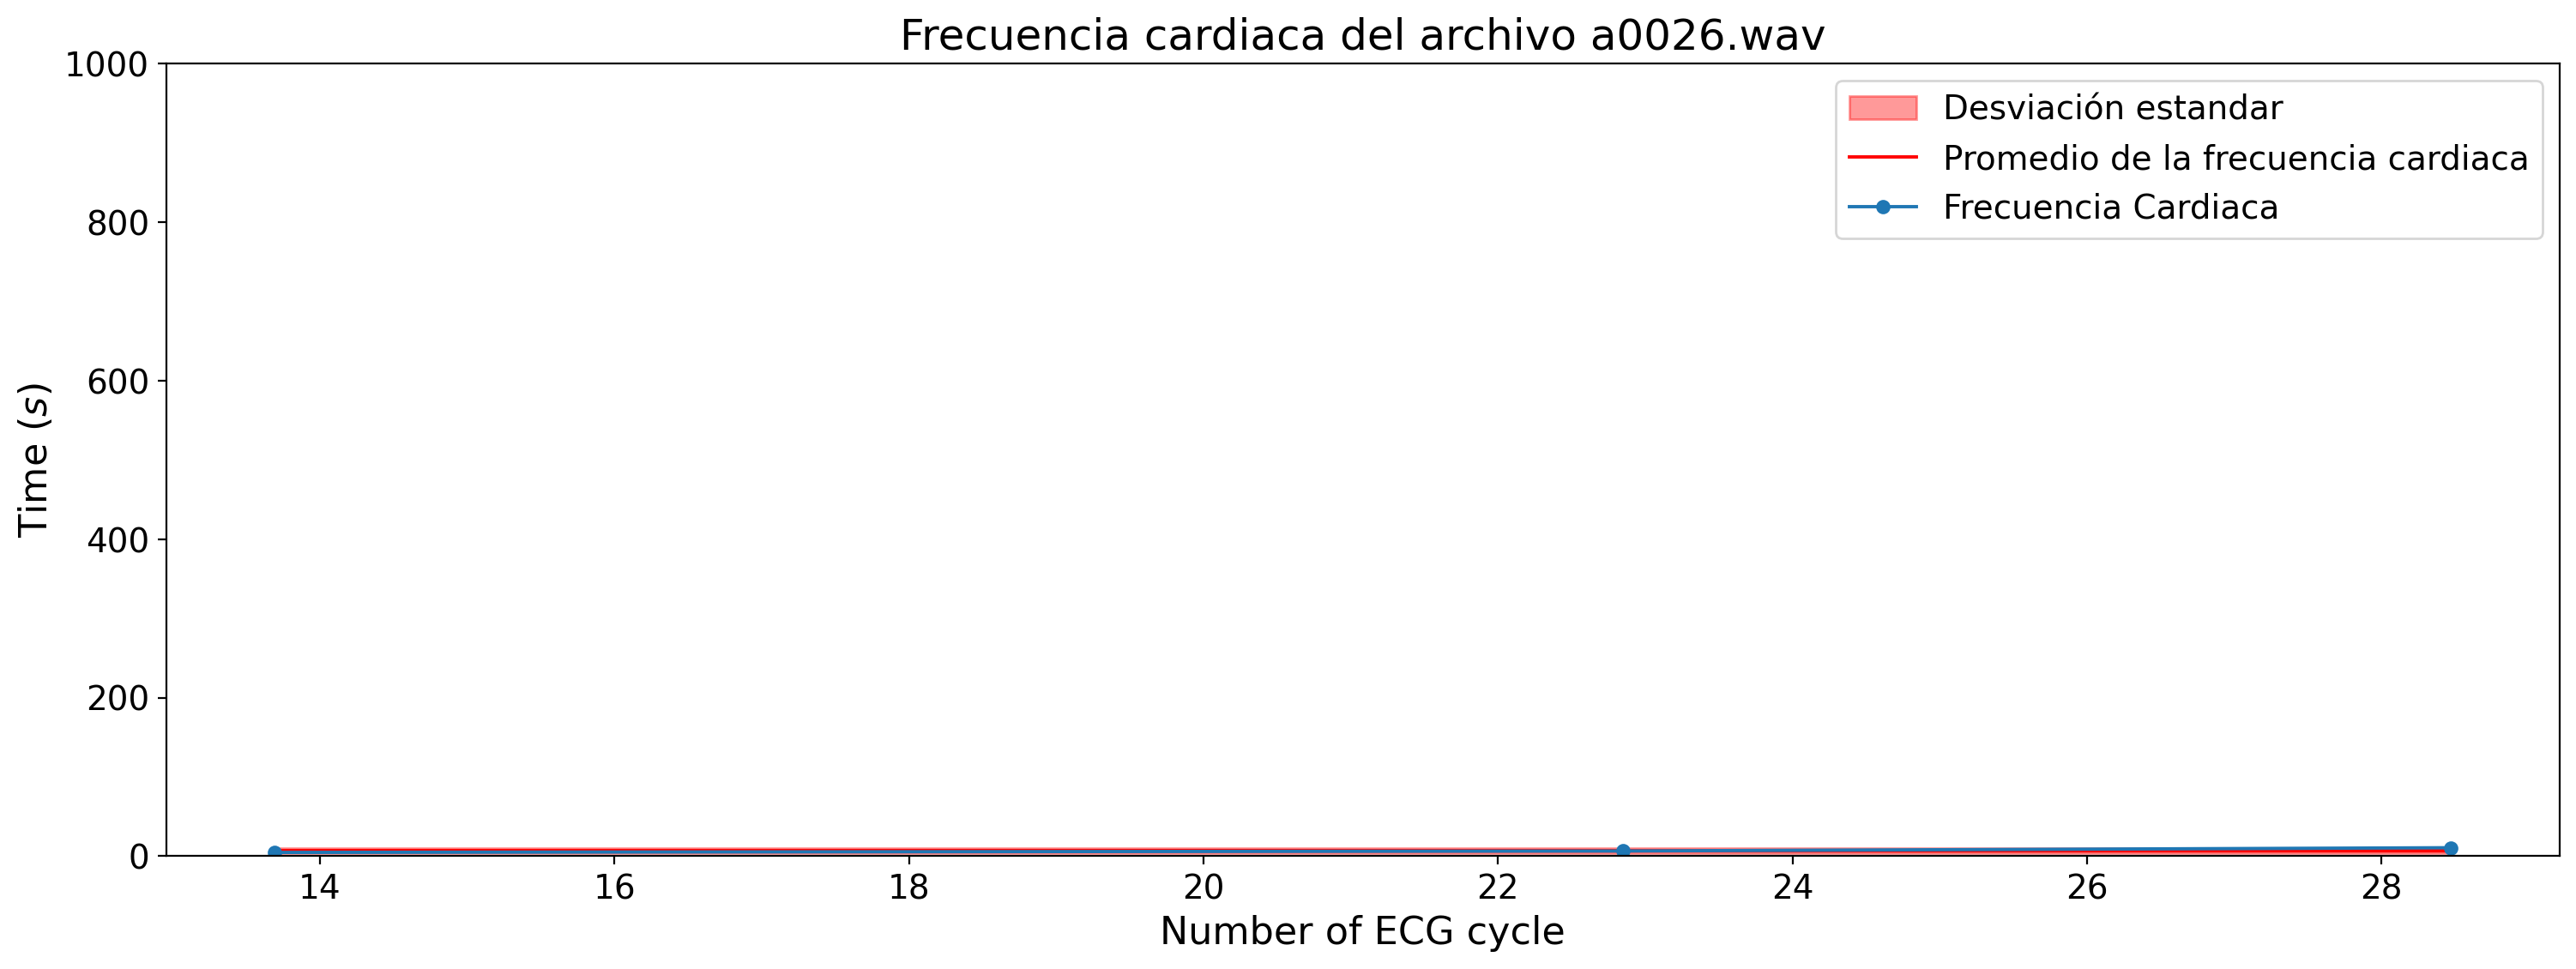

Pulsaciones por minuto: 310.1428511230037


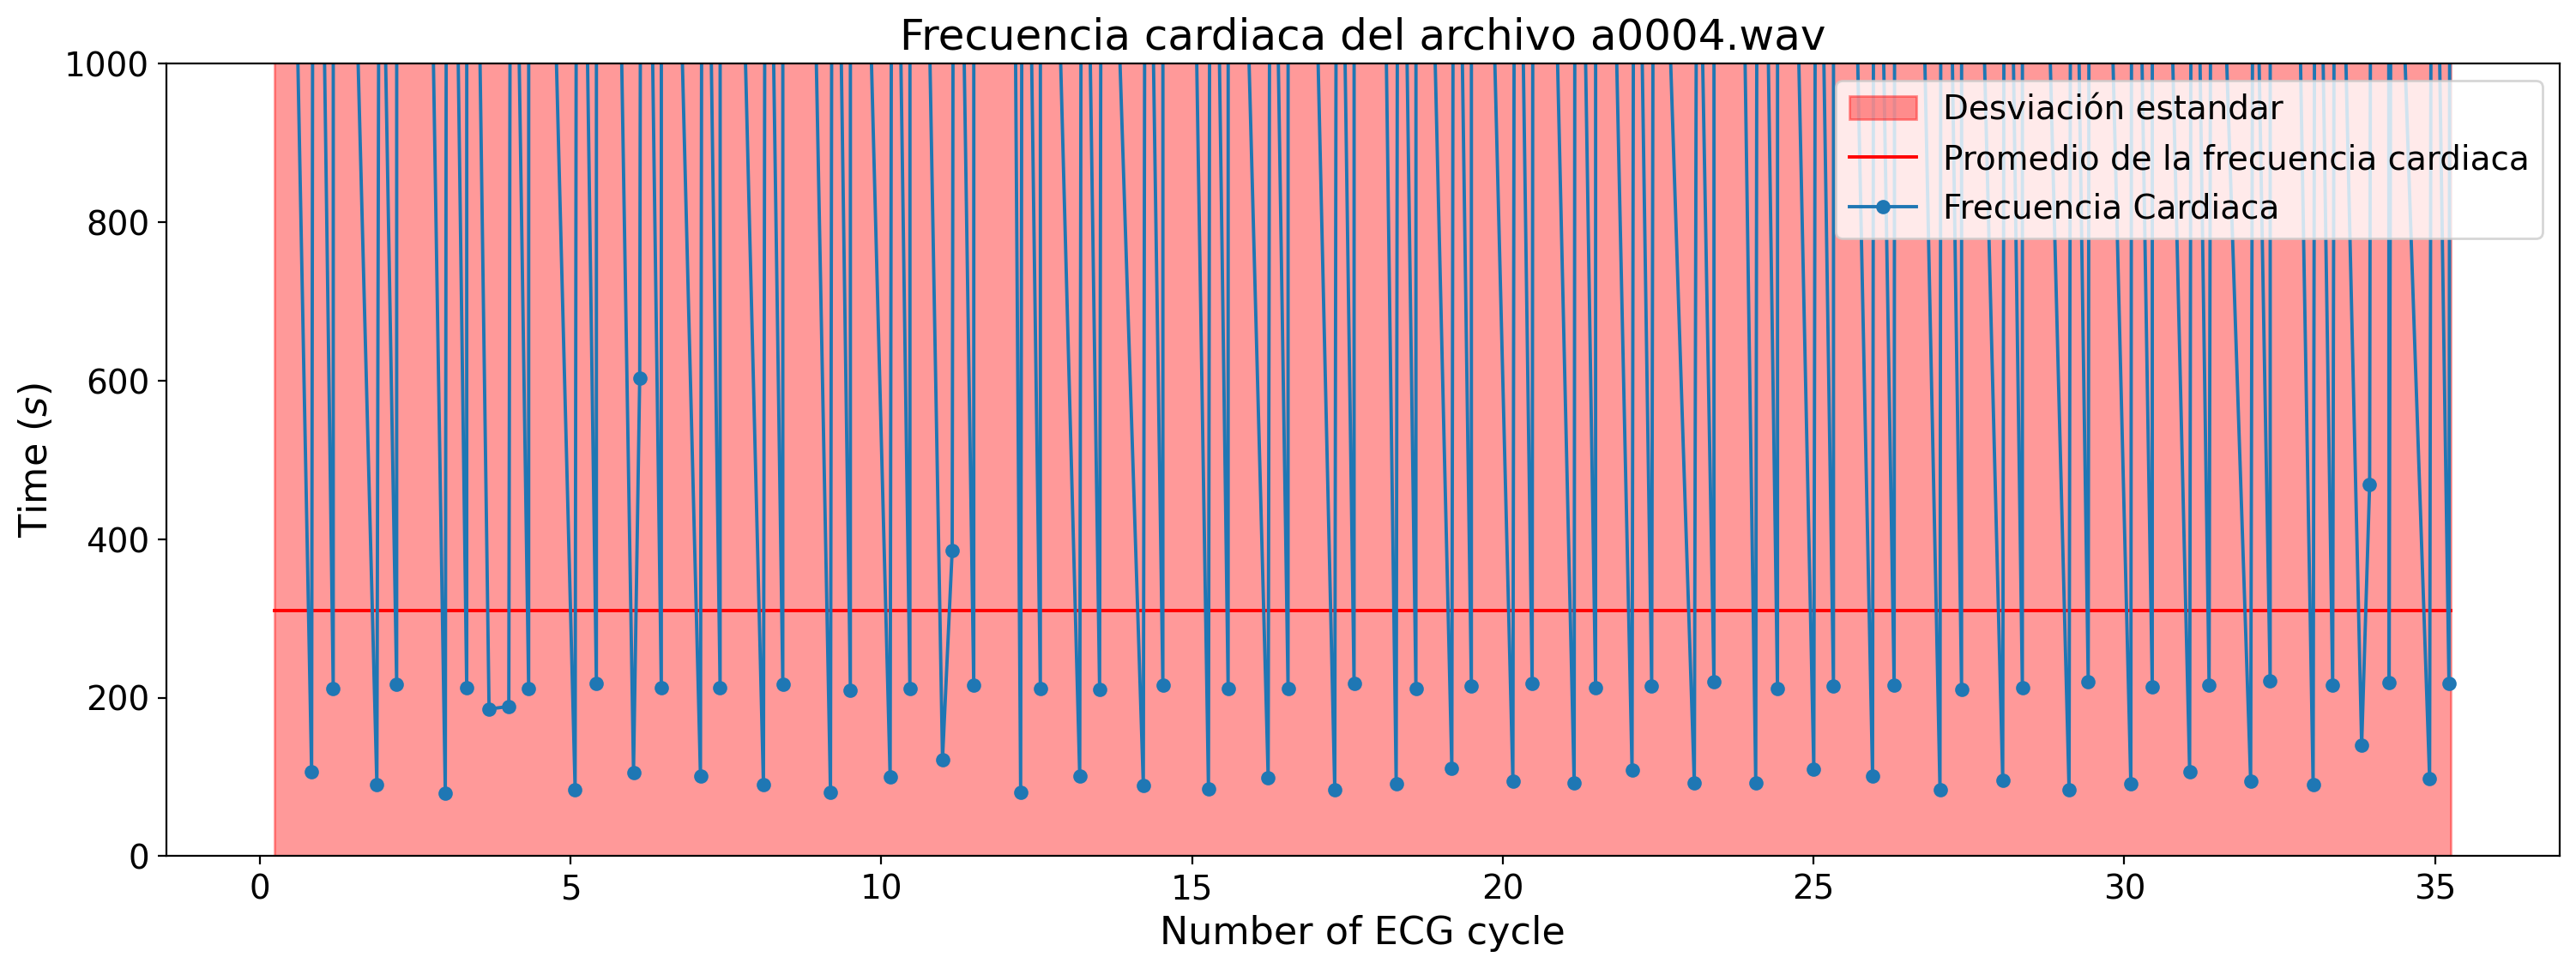

<ipython-input-7-43cfc4cdee16>:7: RuntimeWarning: overflow encountered in short_scalars
  interval = max(waveData) - min(waveData)


Pulsaciones por minuto: 0.0


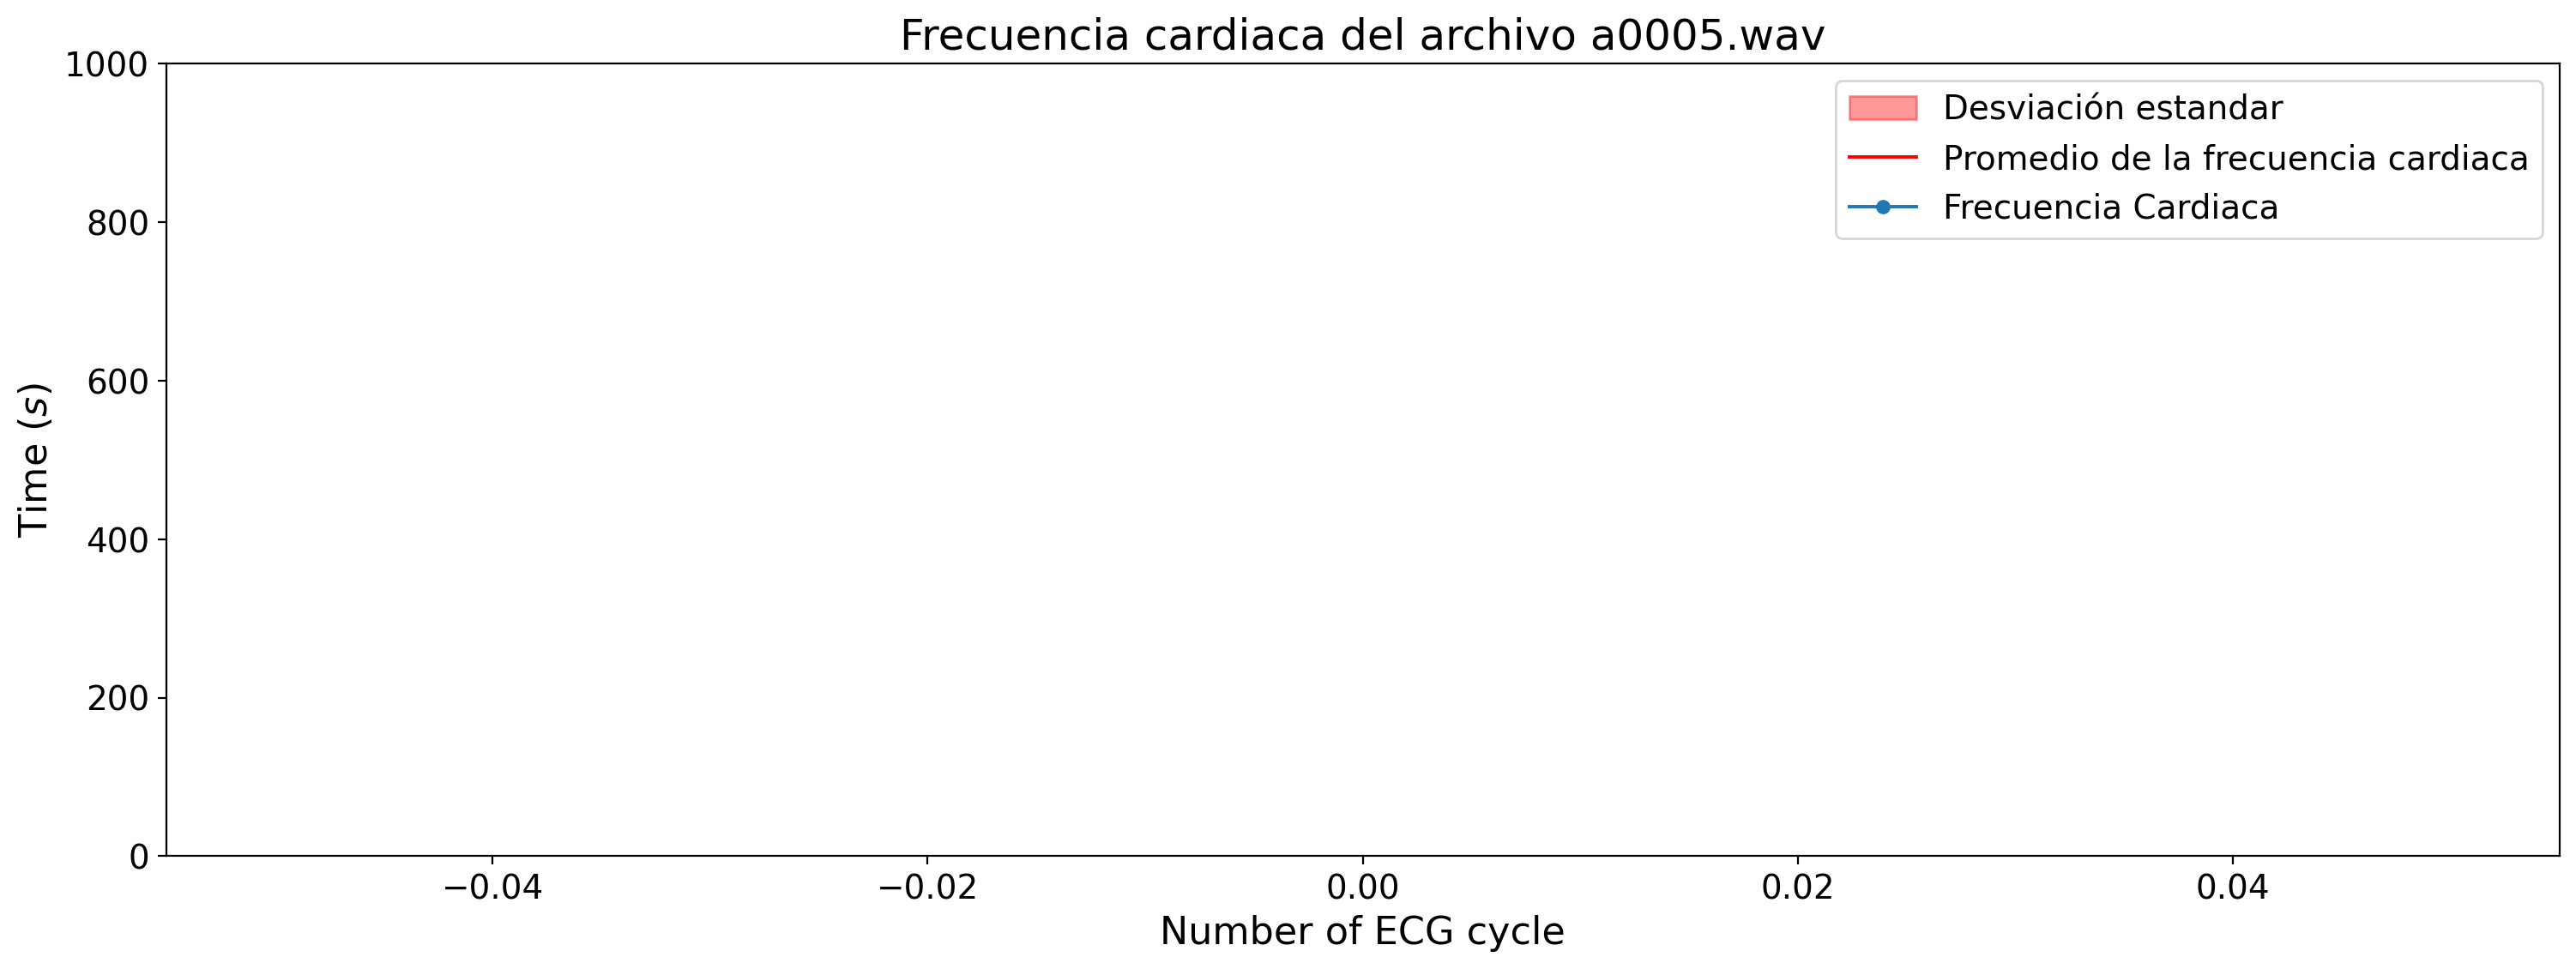

Pulsaciones por minuto: 404.64376896767664


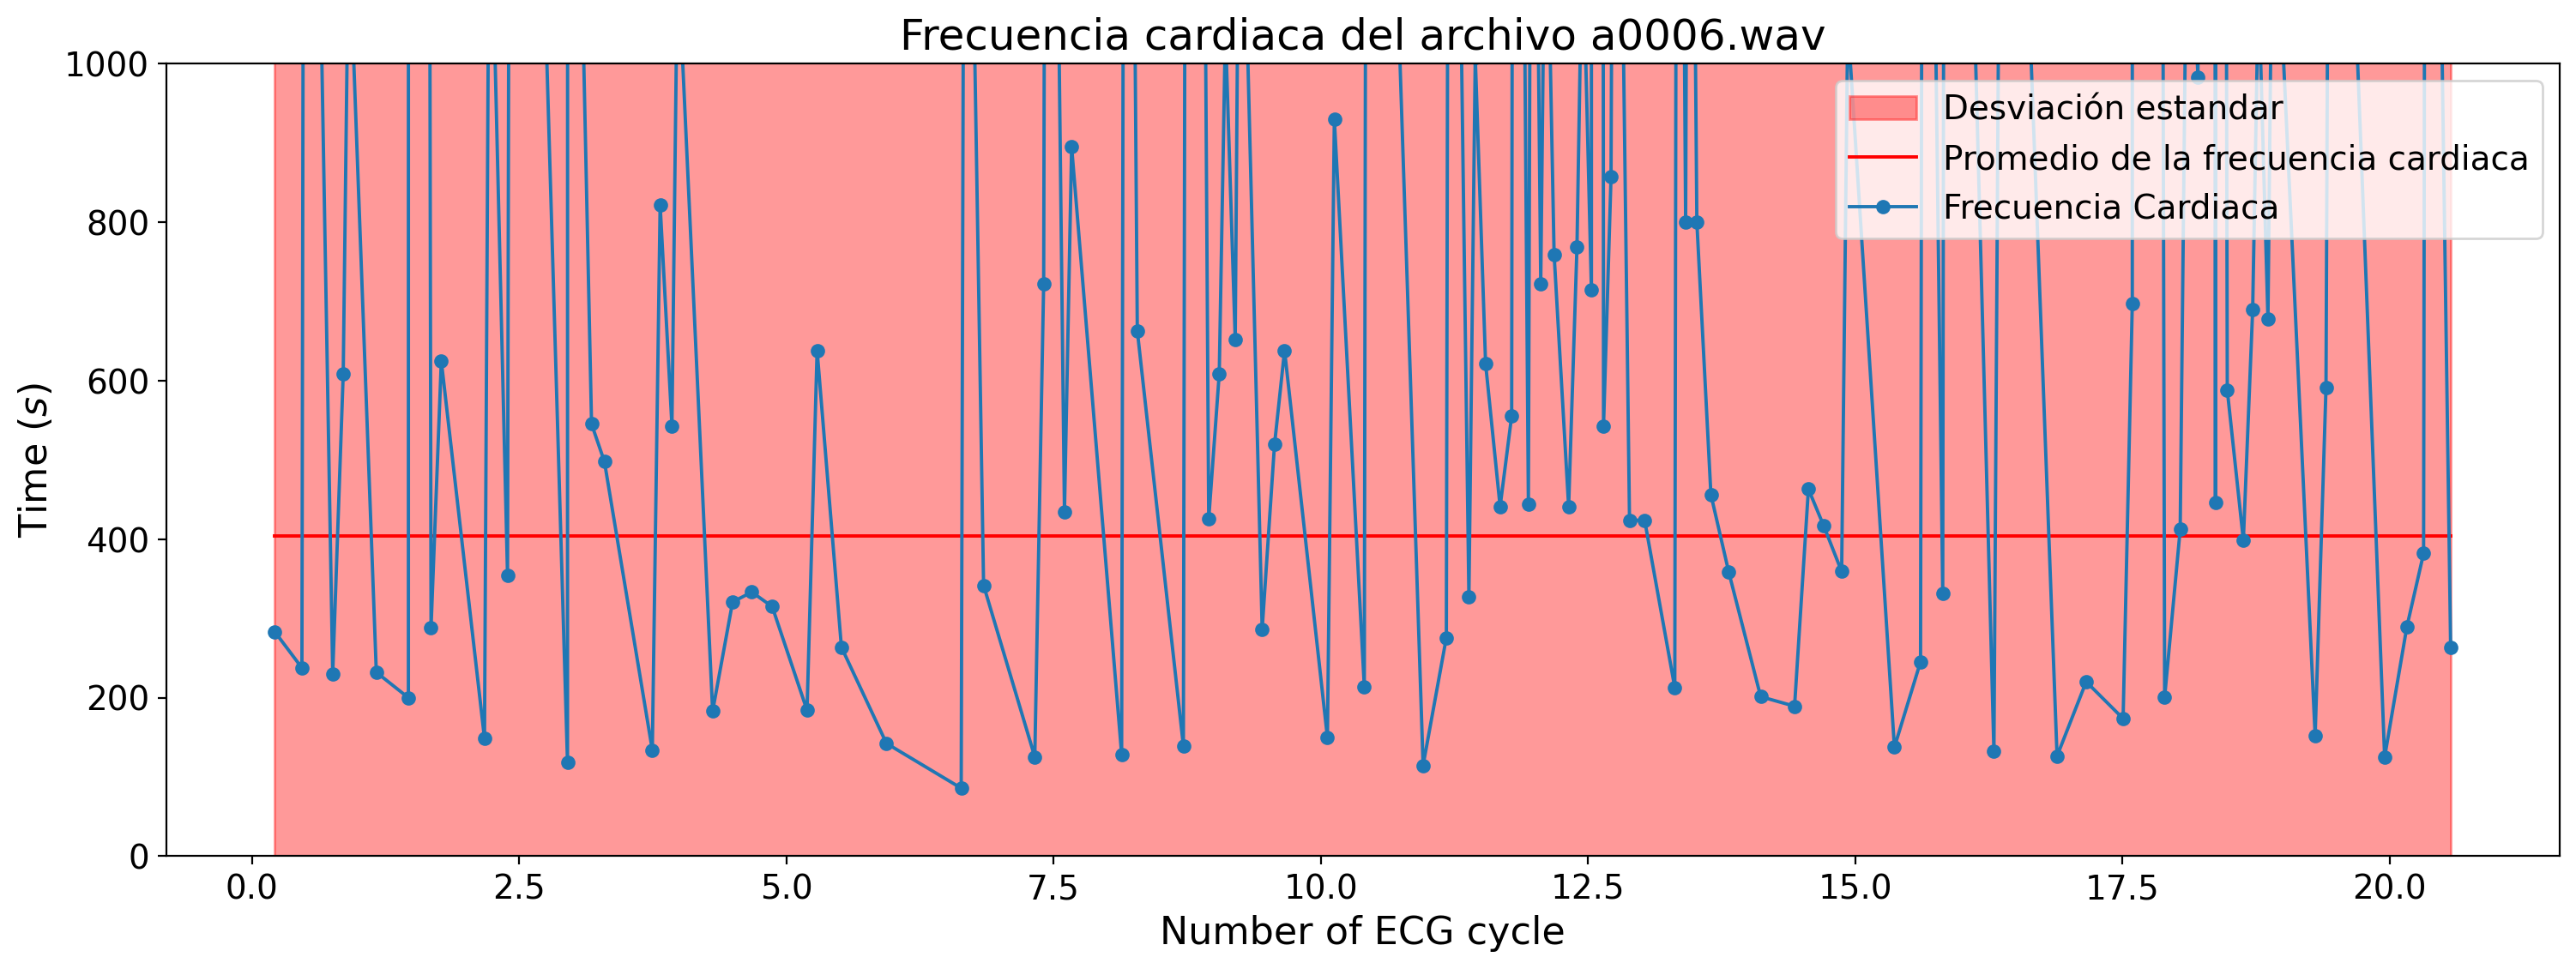

Pulsaciones por minuto: 141.31105254303822


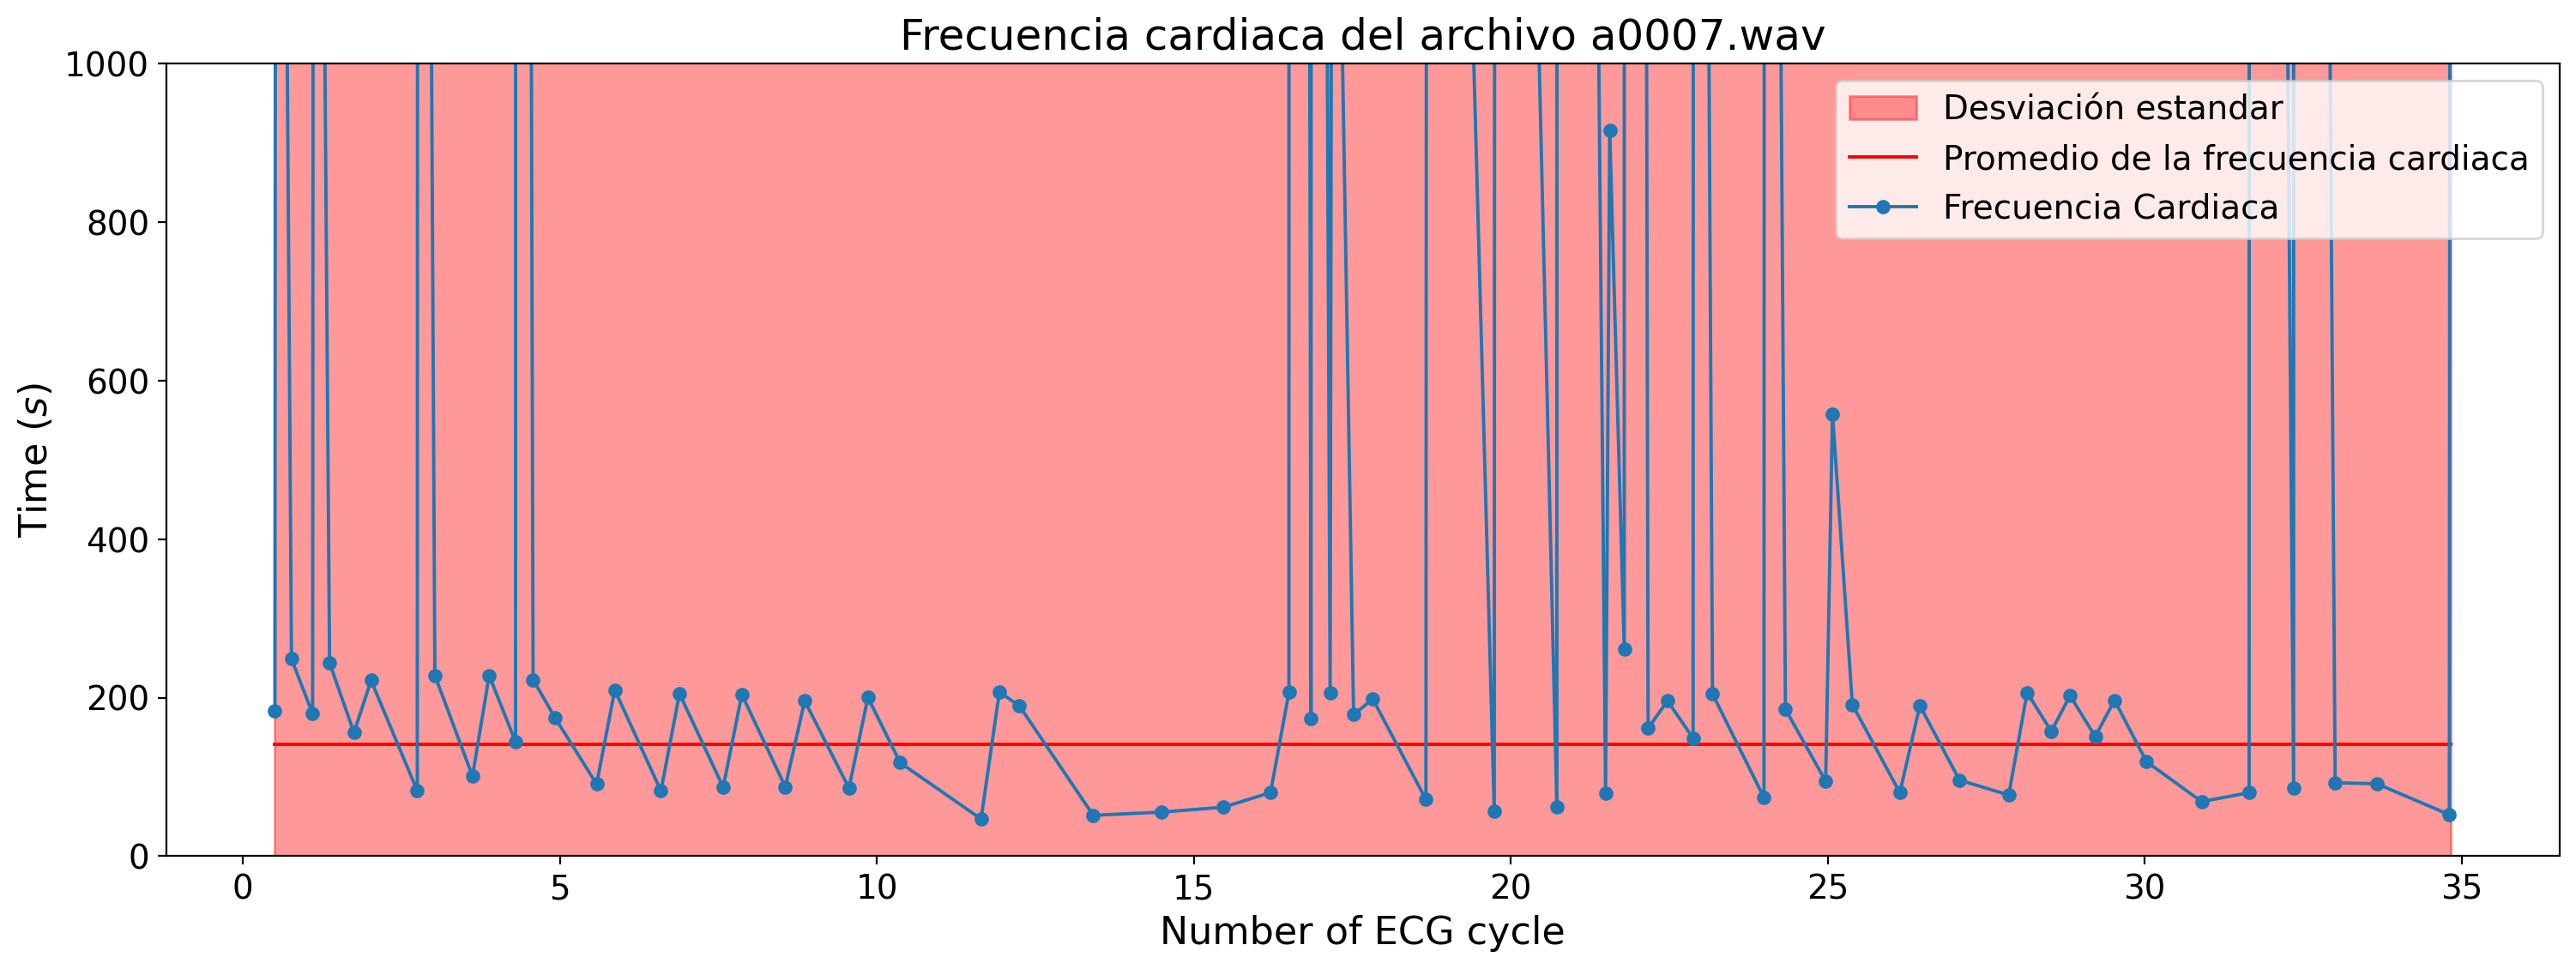

Pulsaciones por minuto: 141.31105254303822


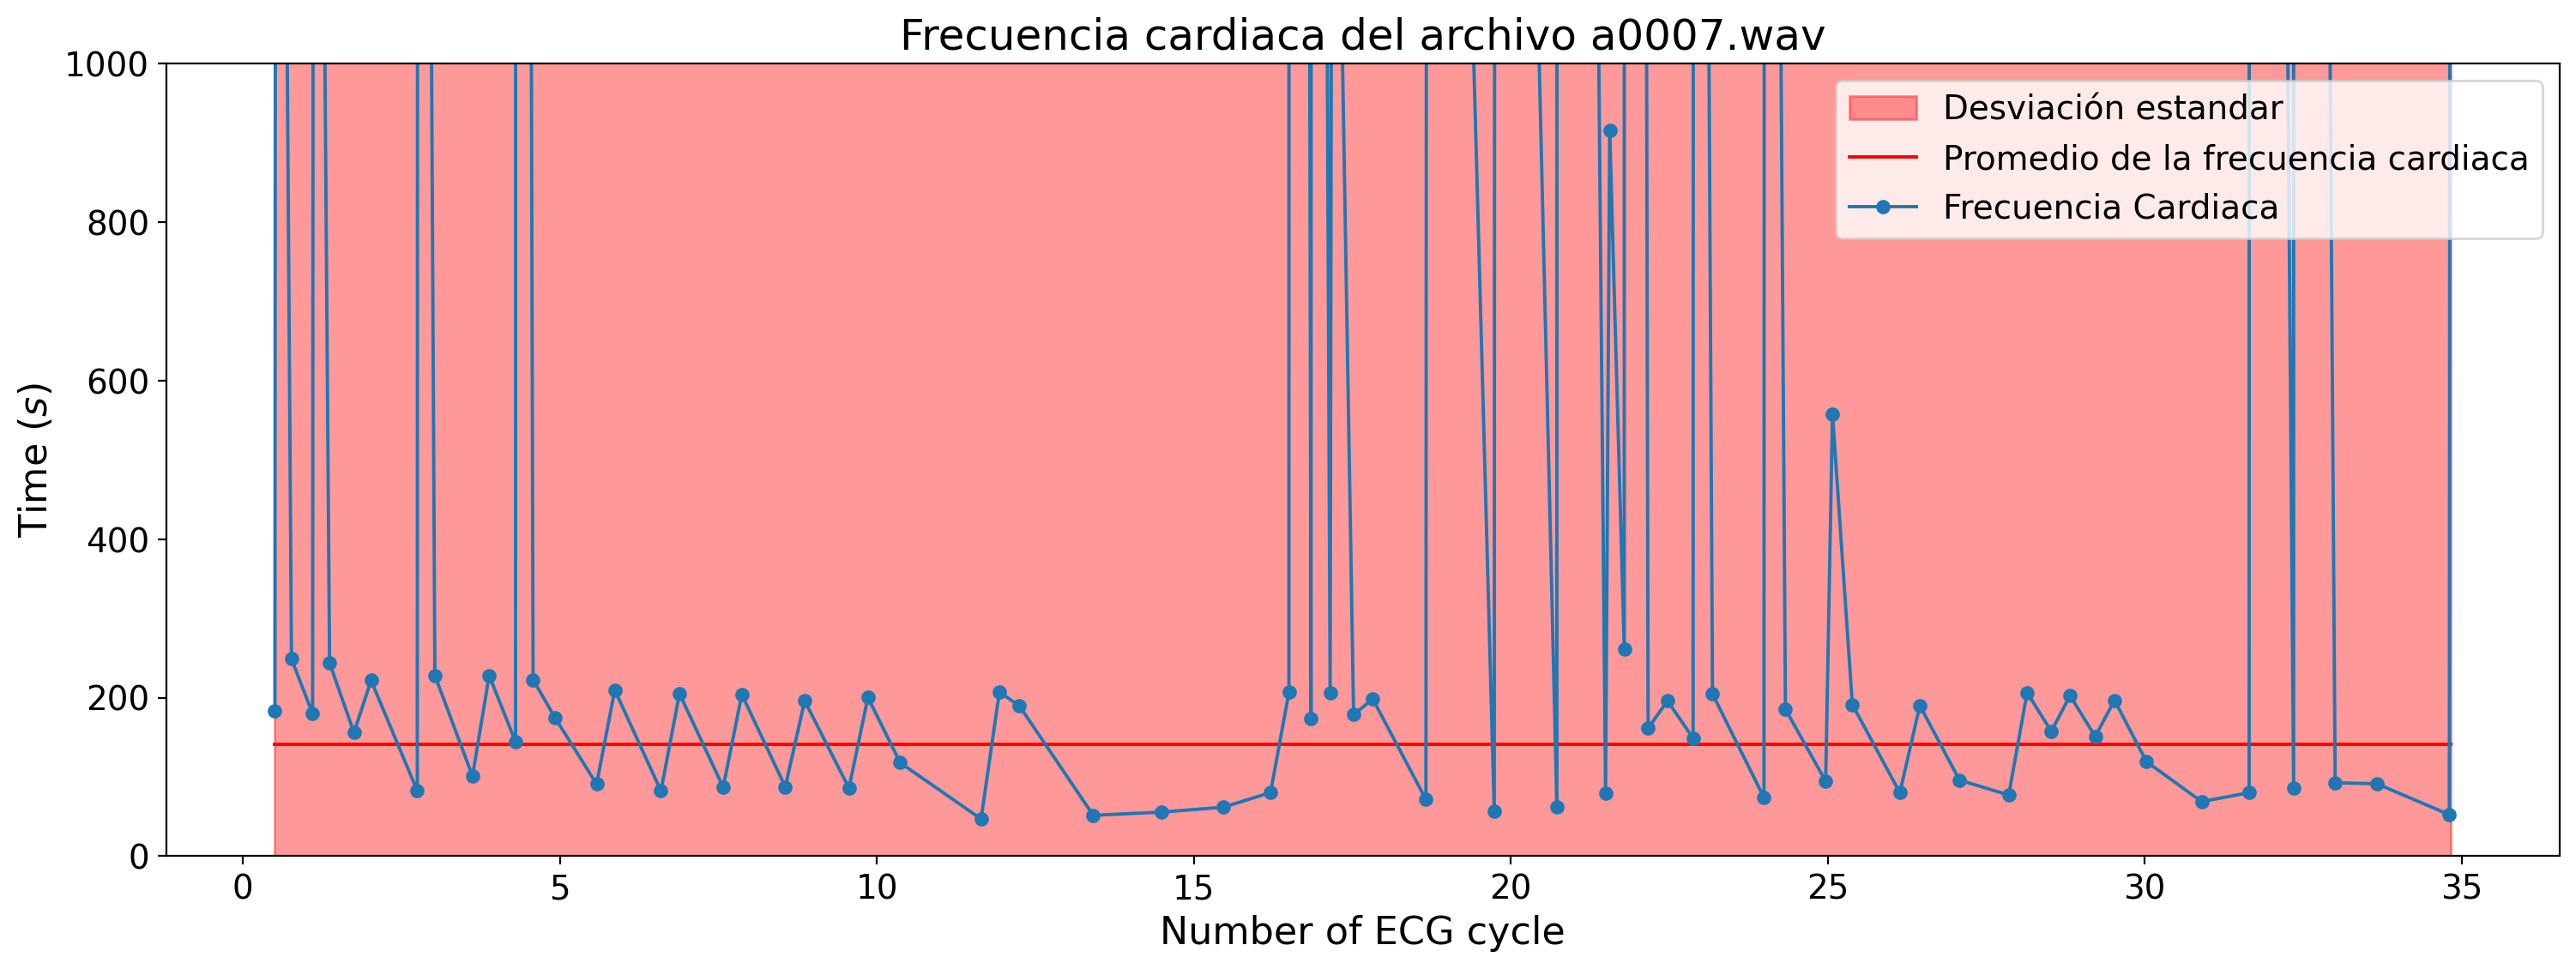

Pulsaciones por minuto: 20.108642526986078


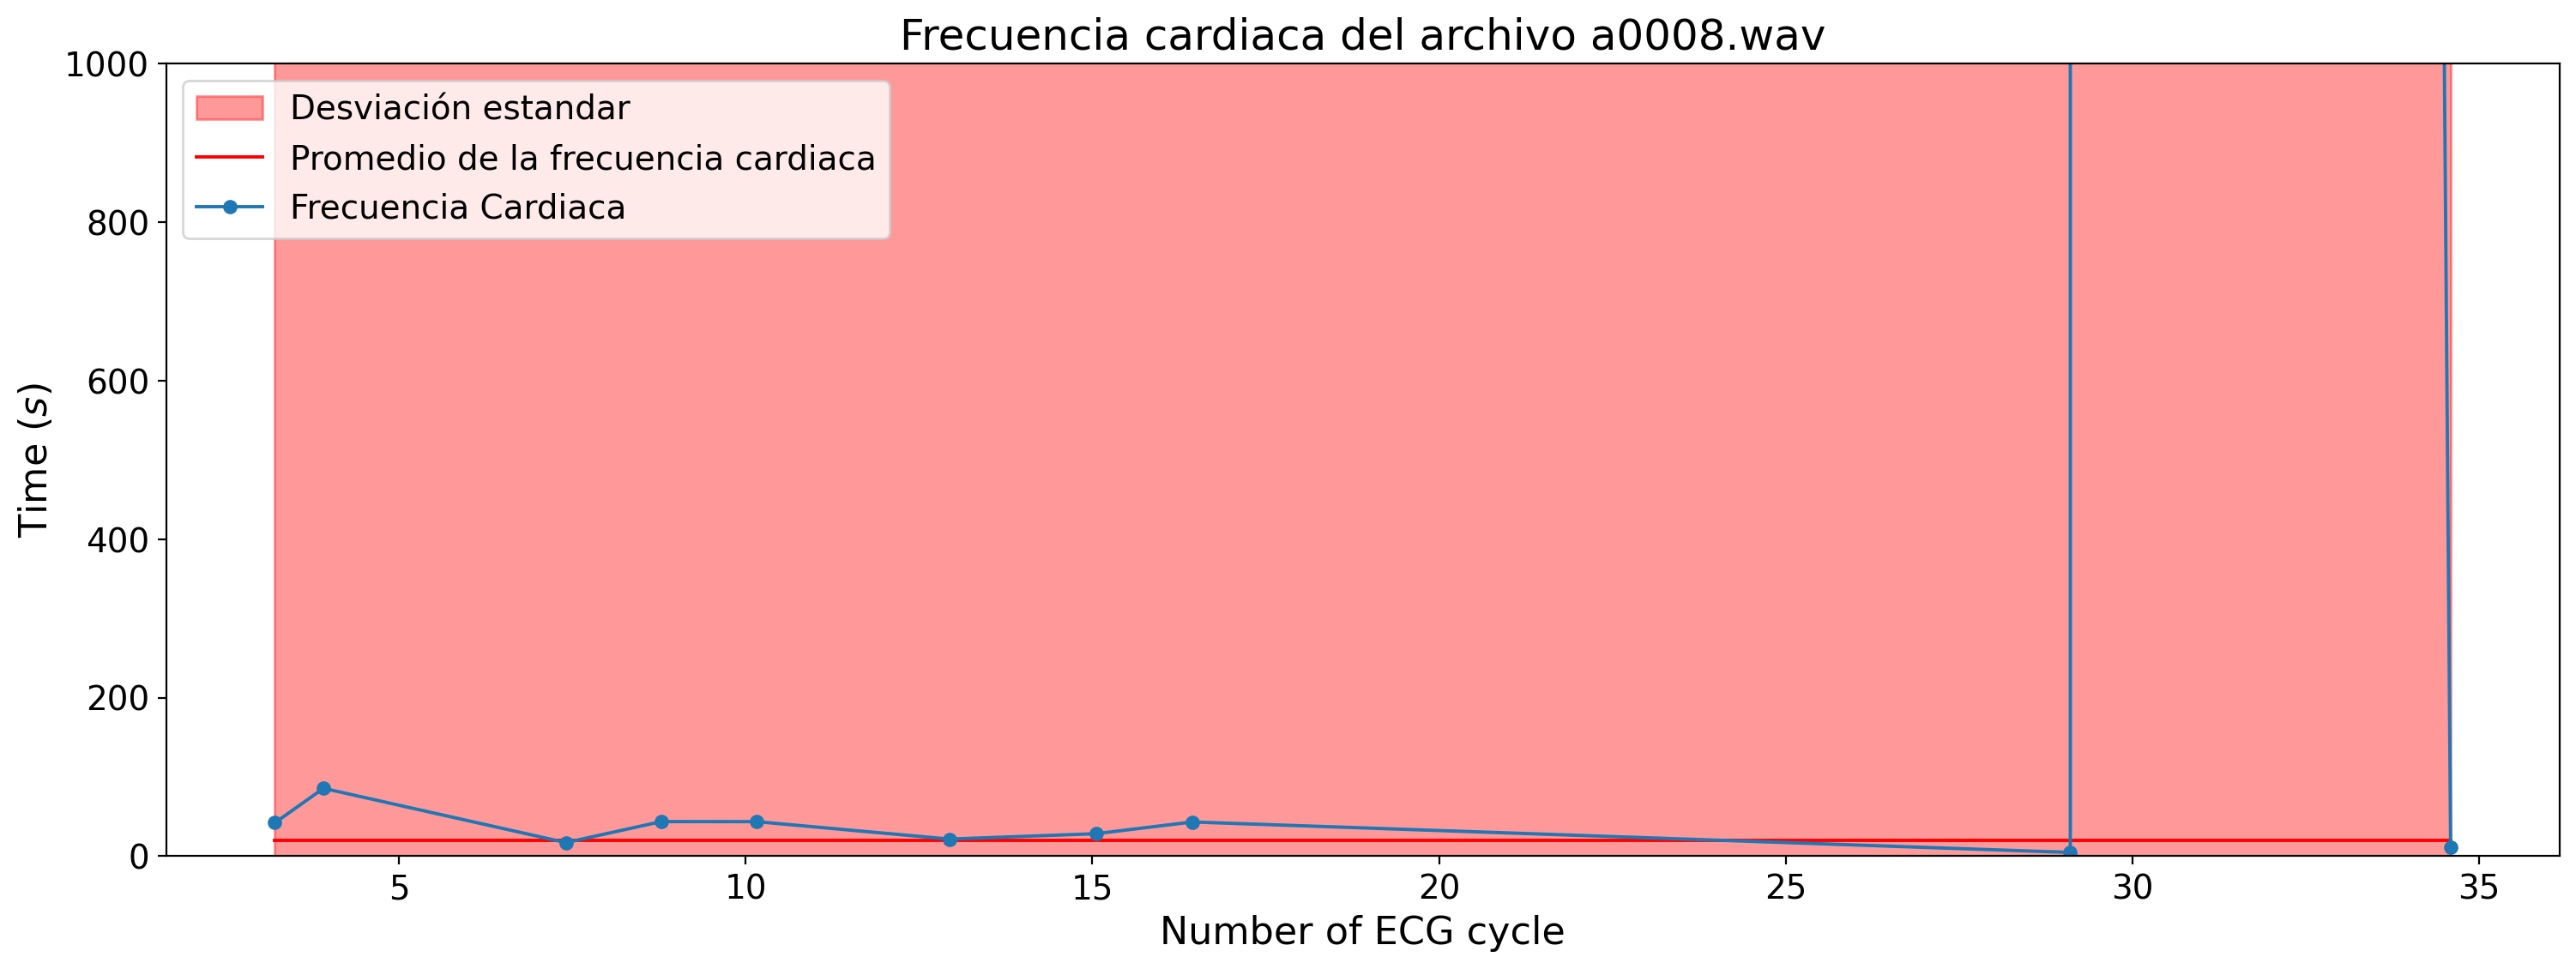

Pulsaciones por minuto: 30.162963790479115


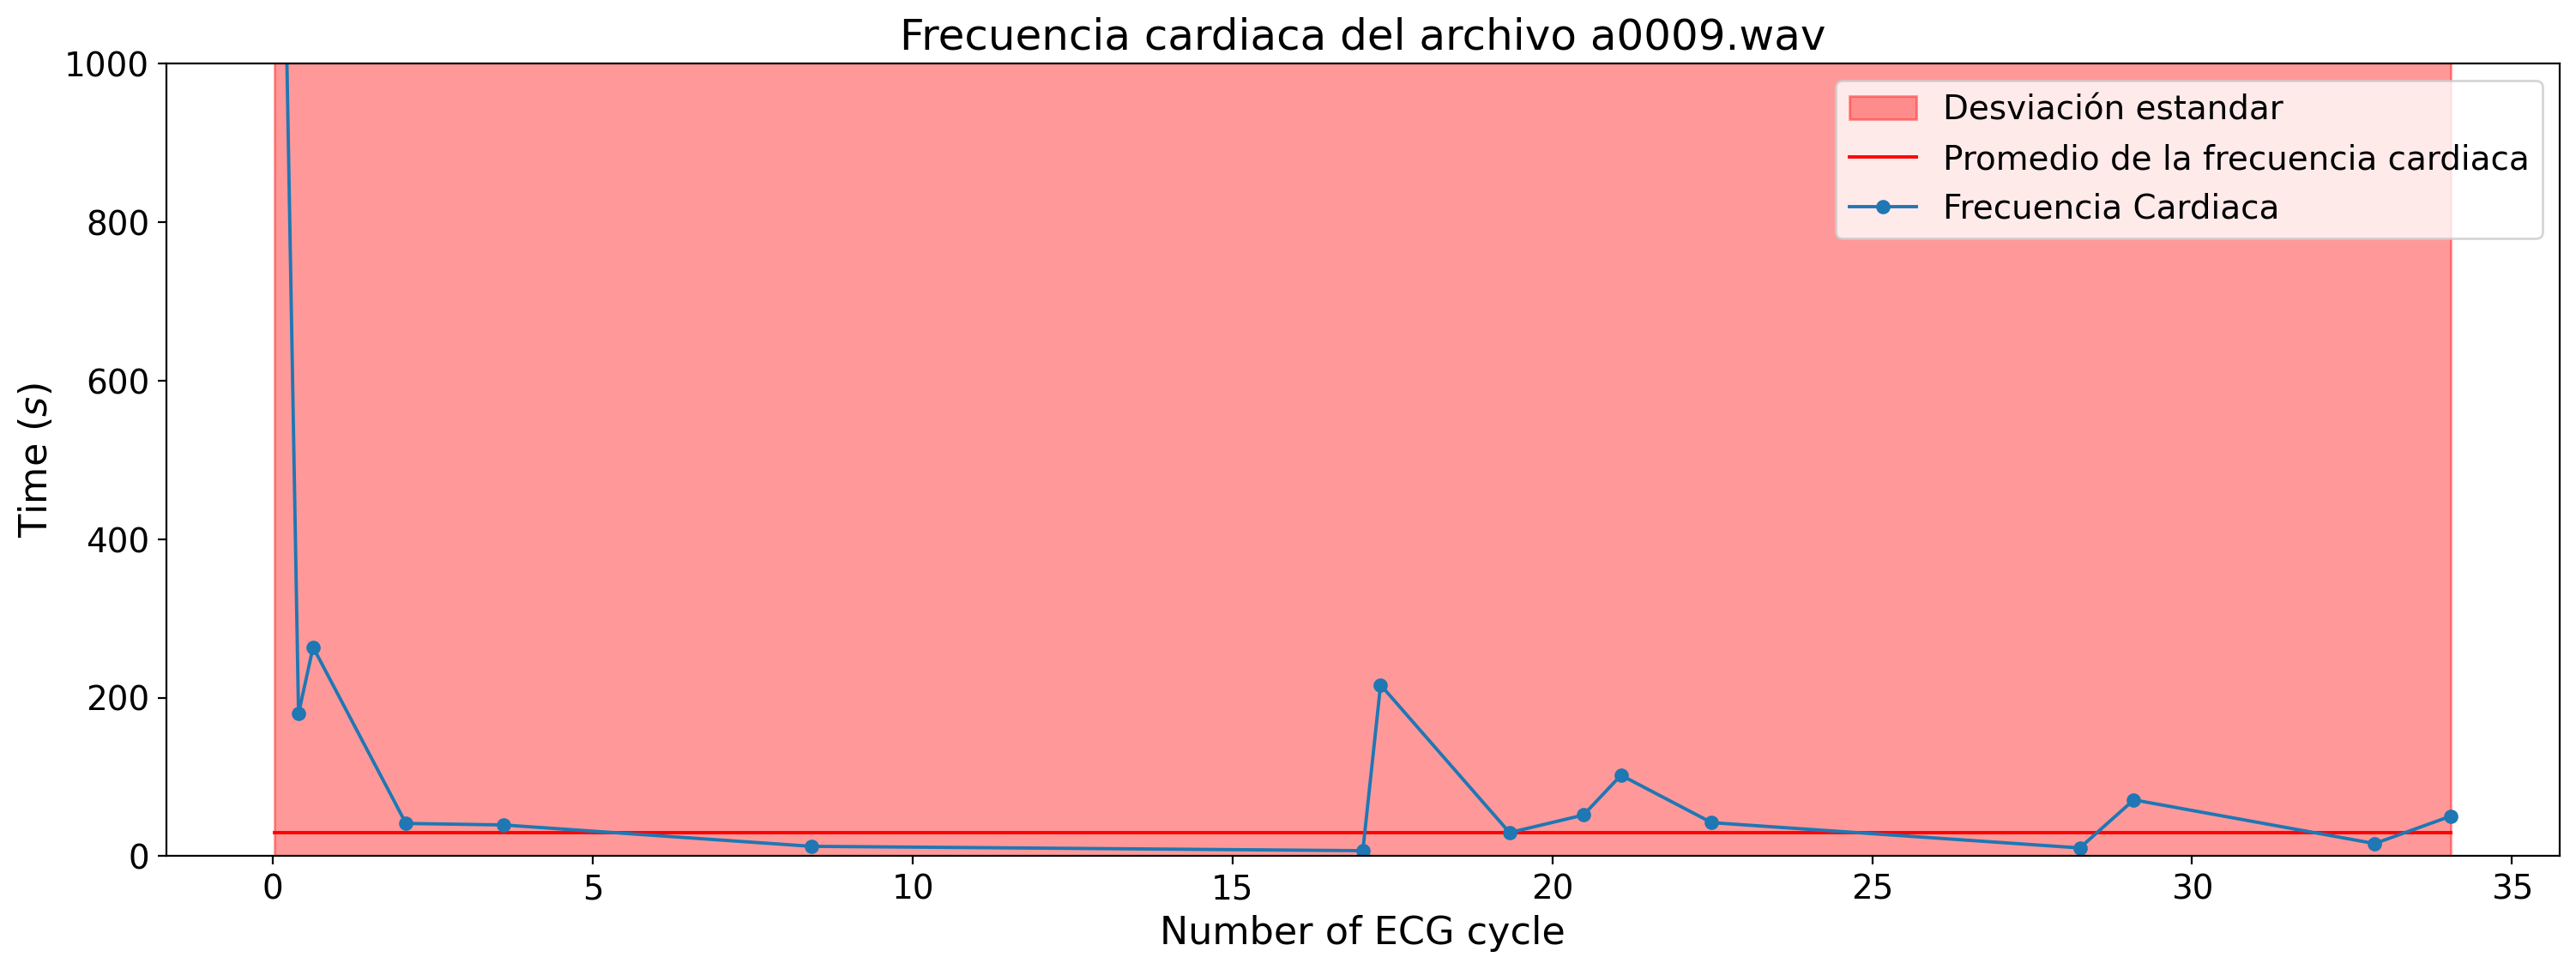

Pulsaciones por minuto: 6.71591672263264


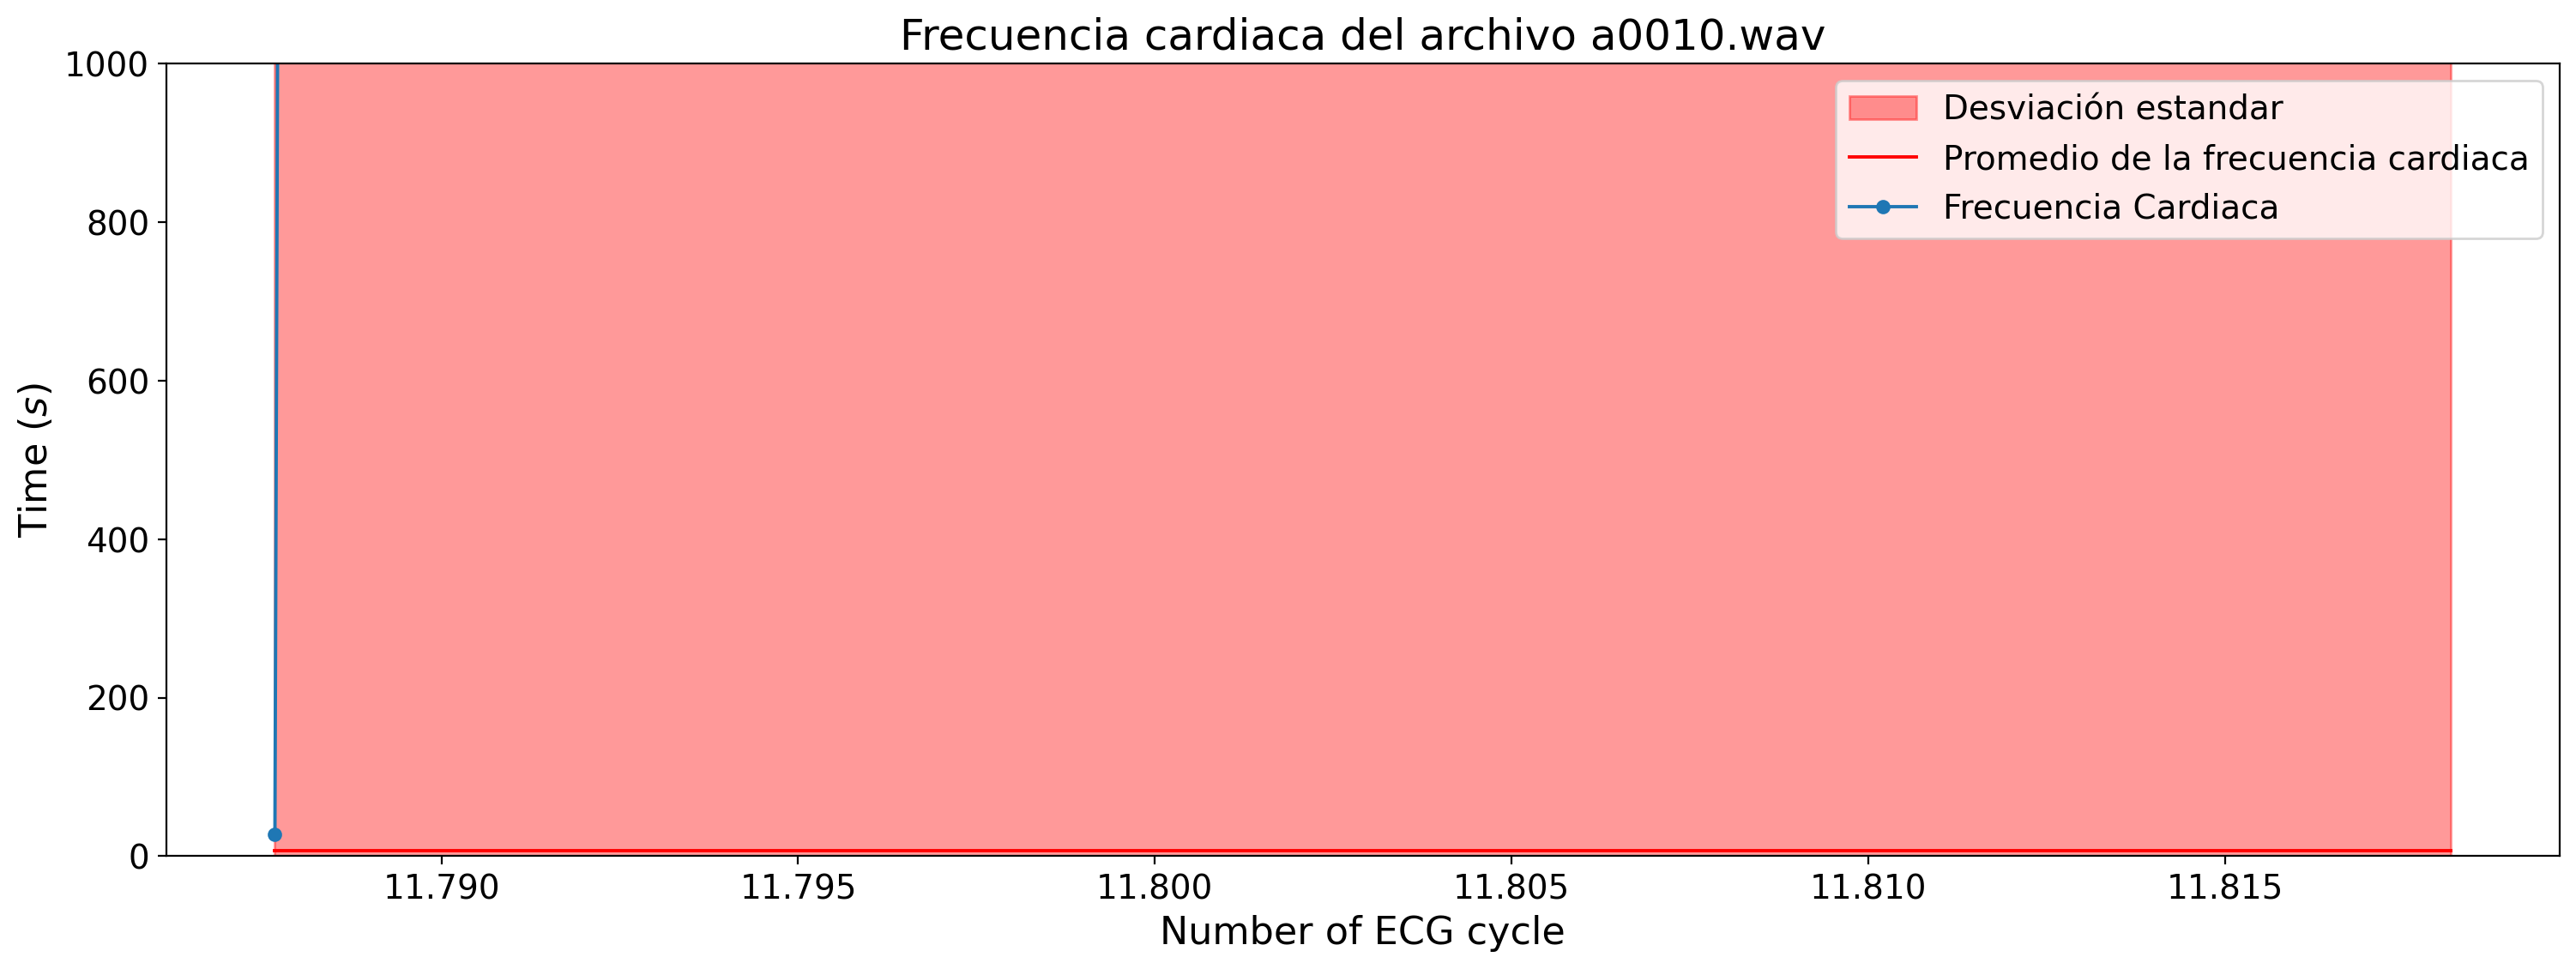

Pulsaciones por minuto: 192.15372297838272


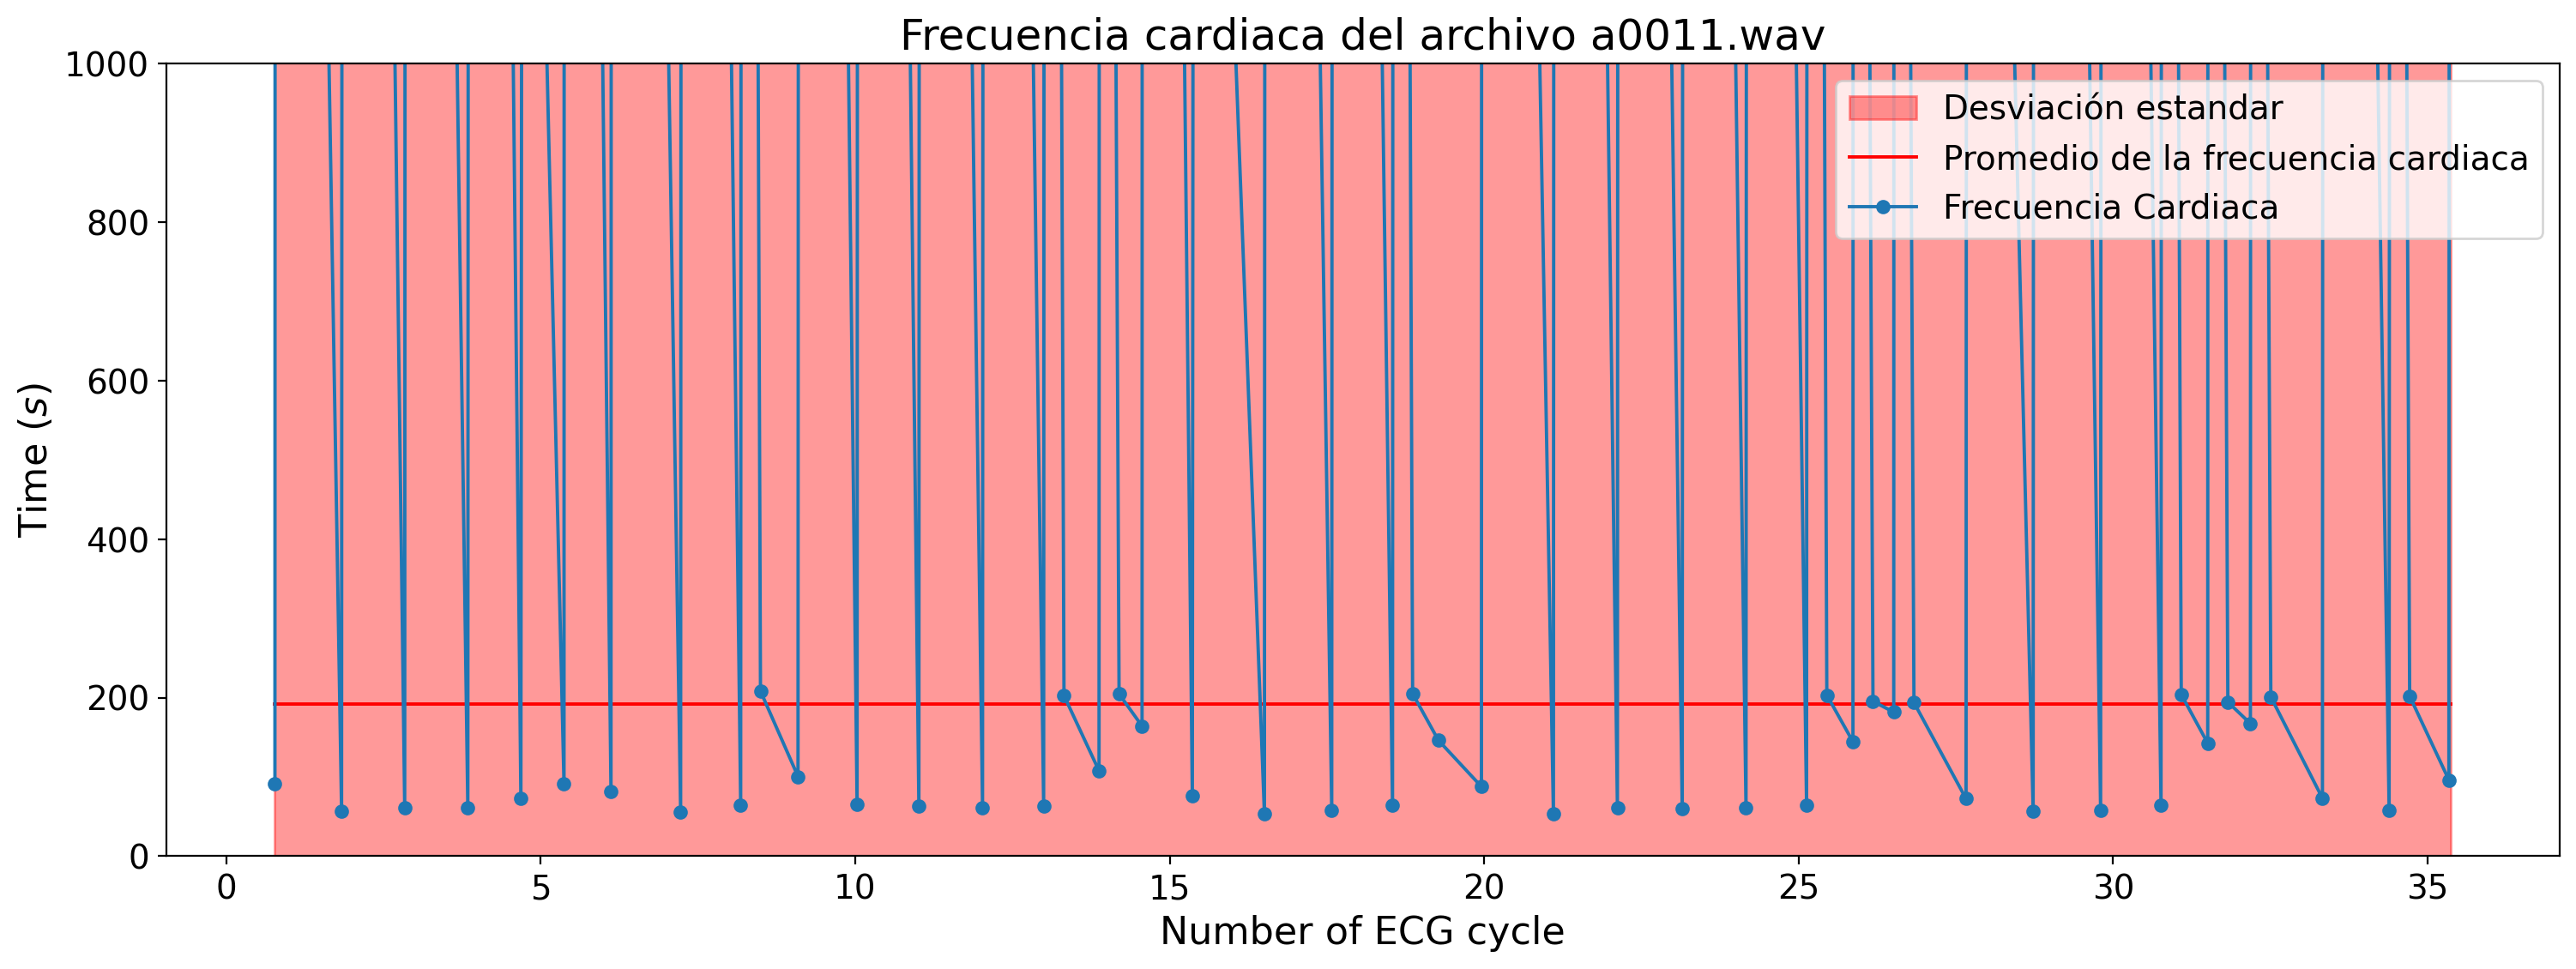

Pulsaciones por minuto: 0.0


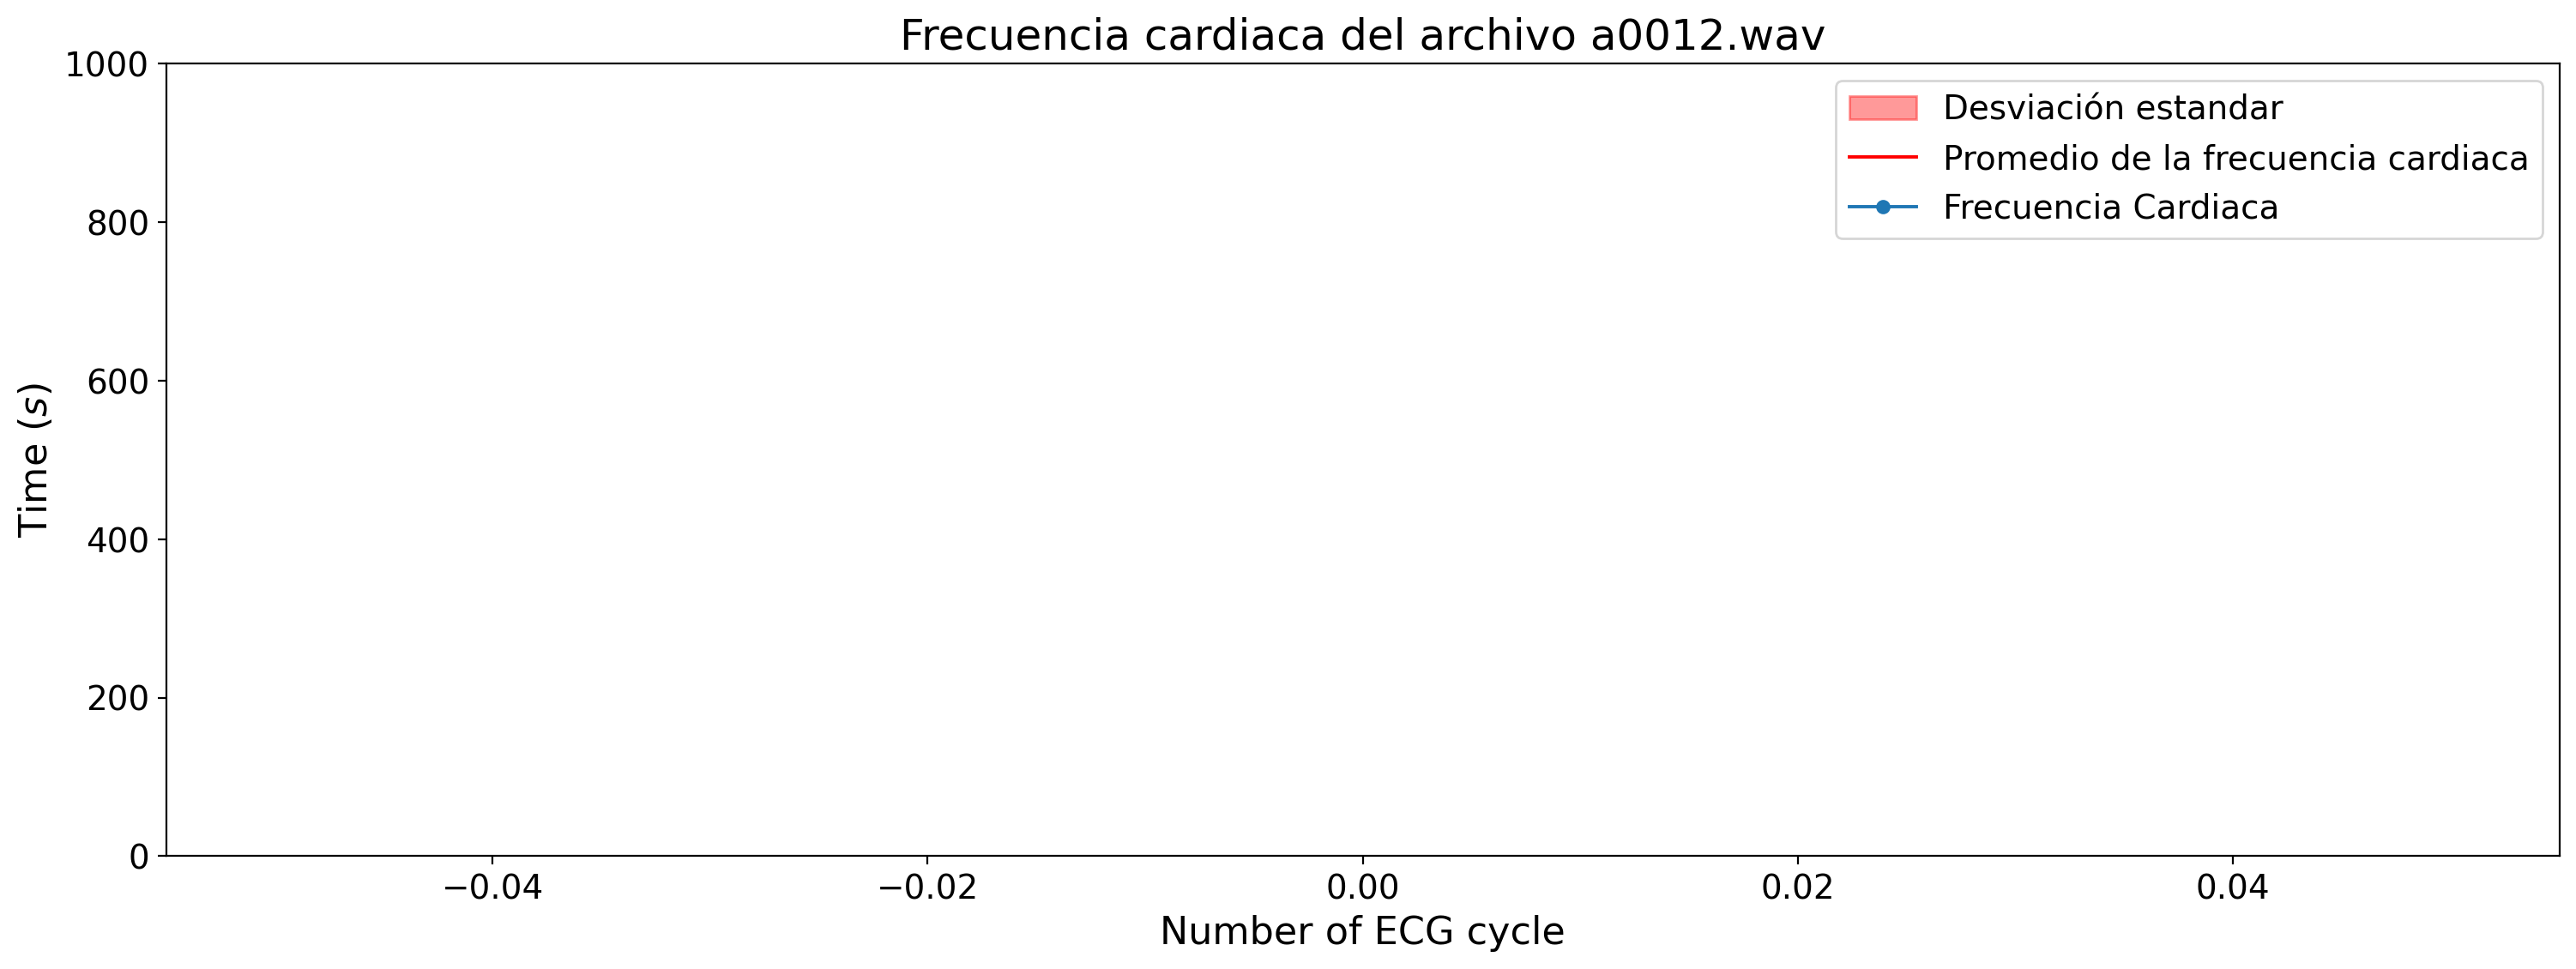

Pulsaciones por minuto: 279.25755621600405


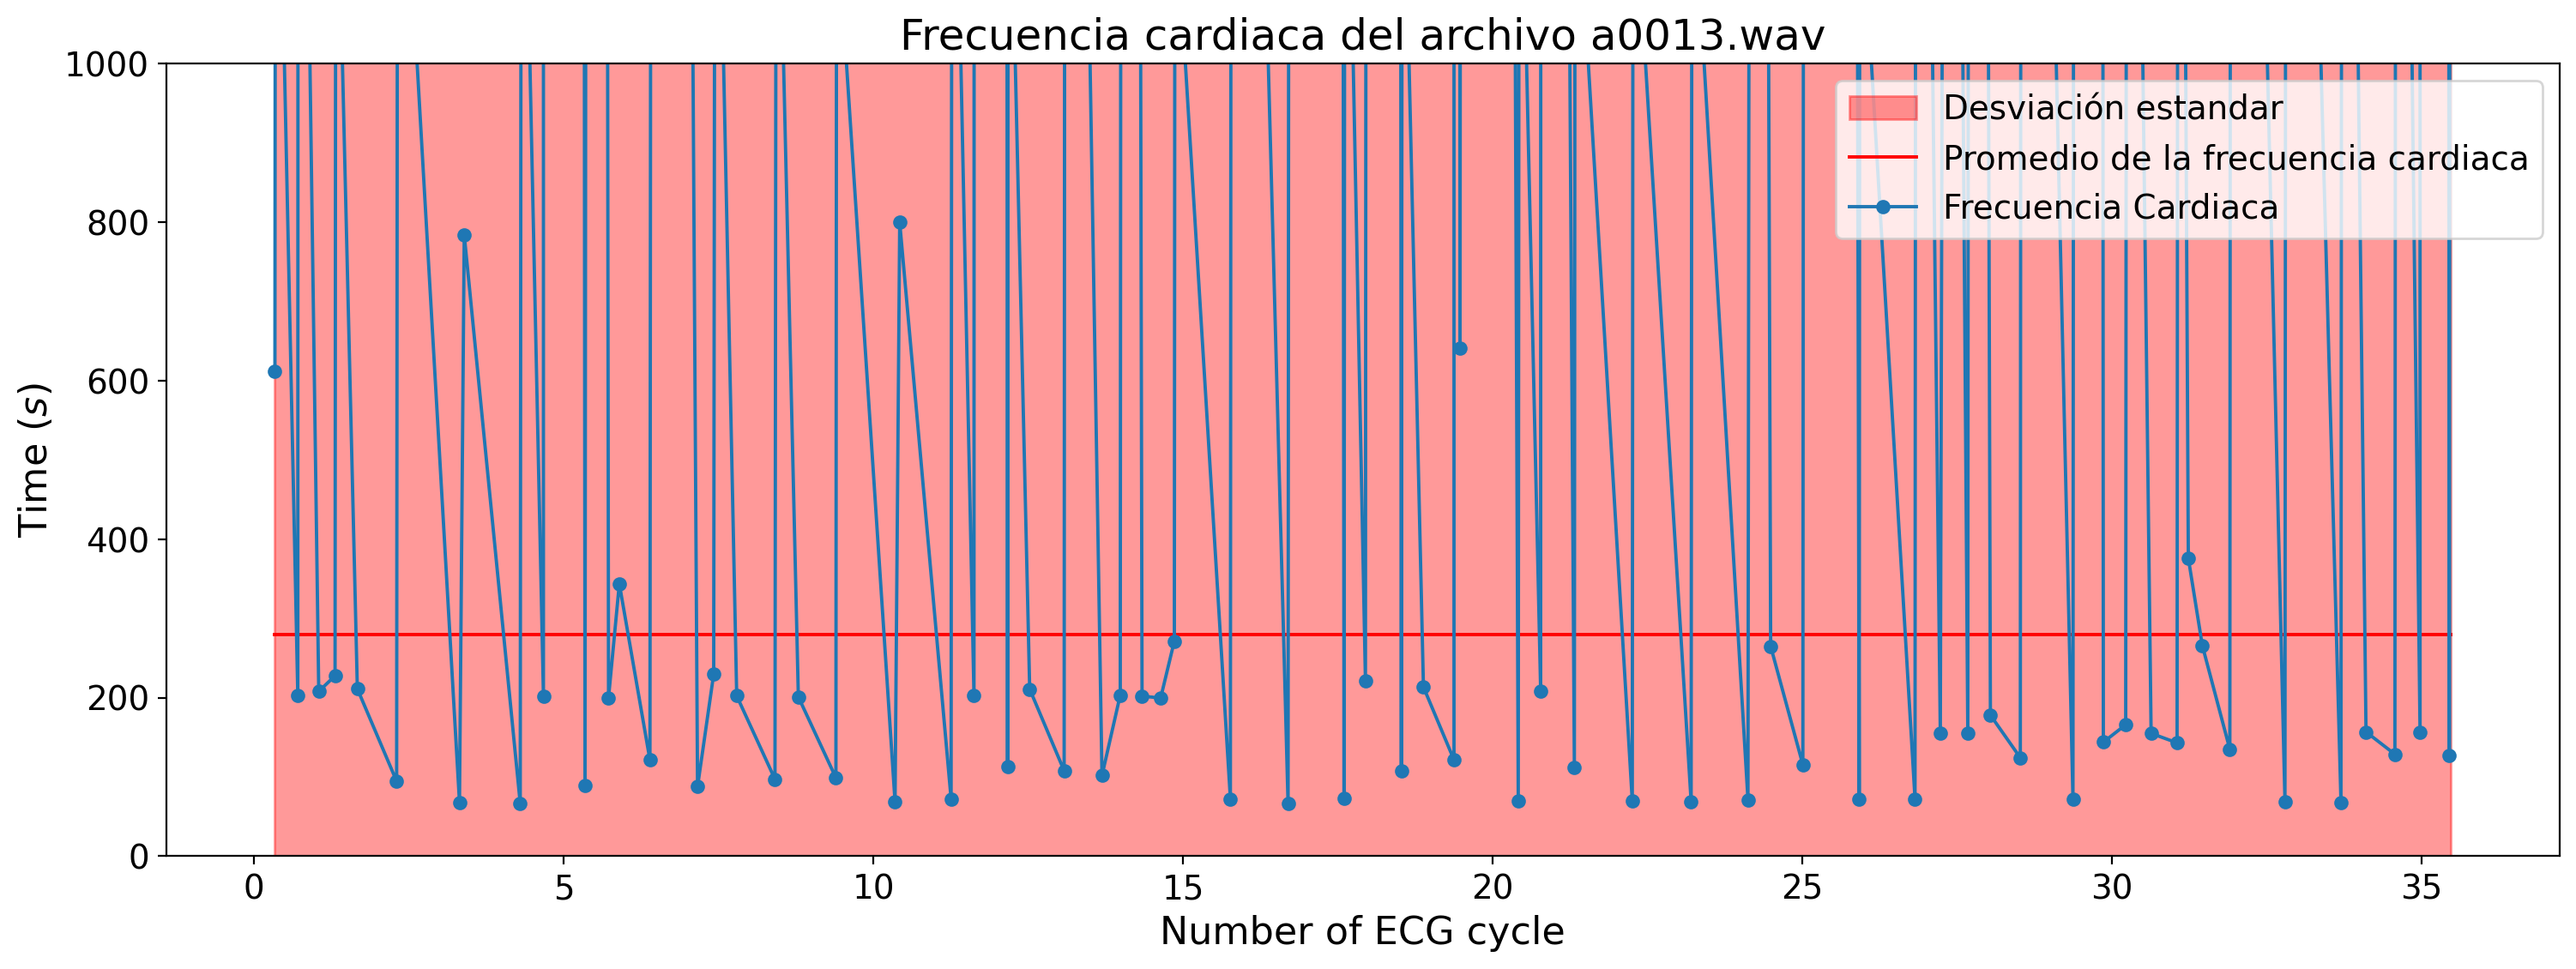

Pulsaciones por minuto: 0.0


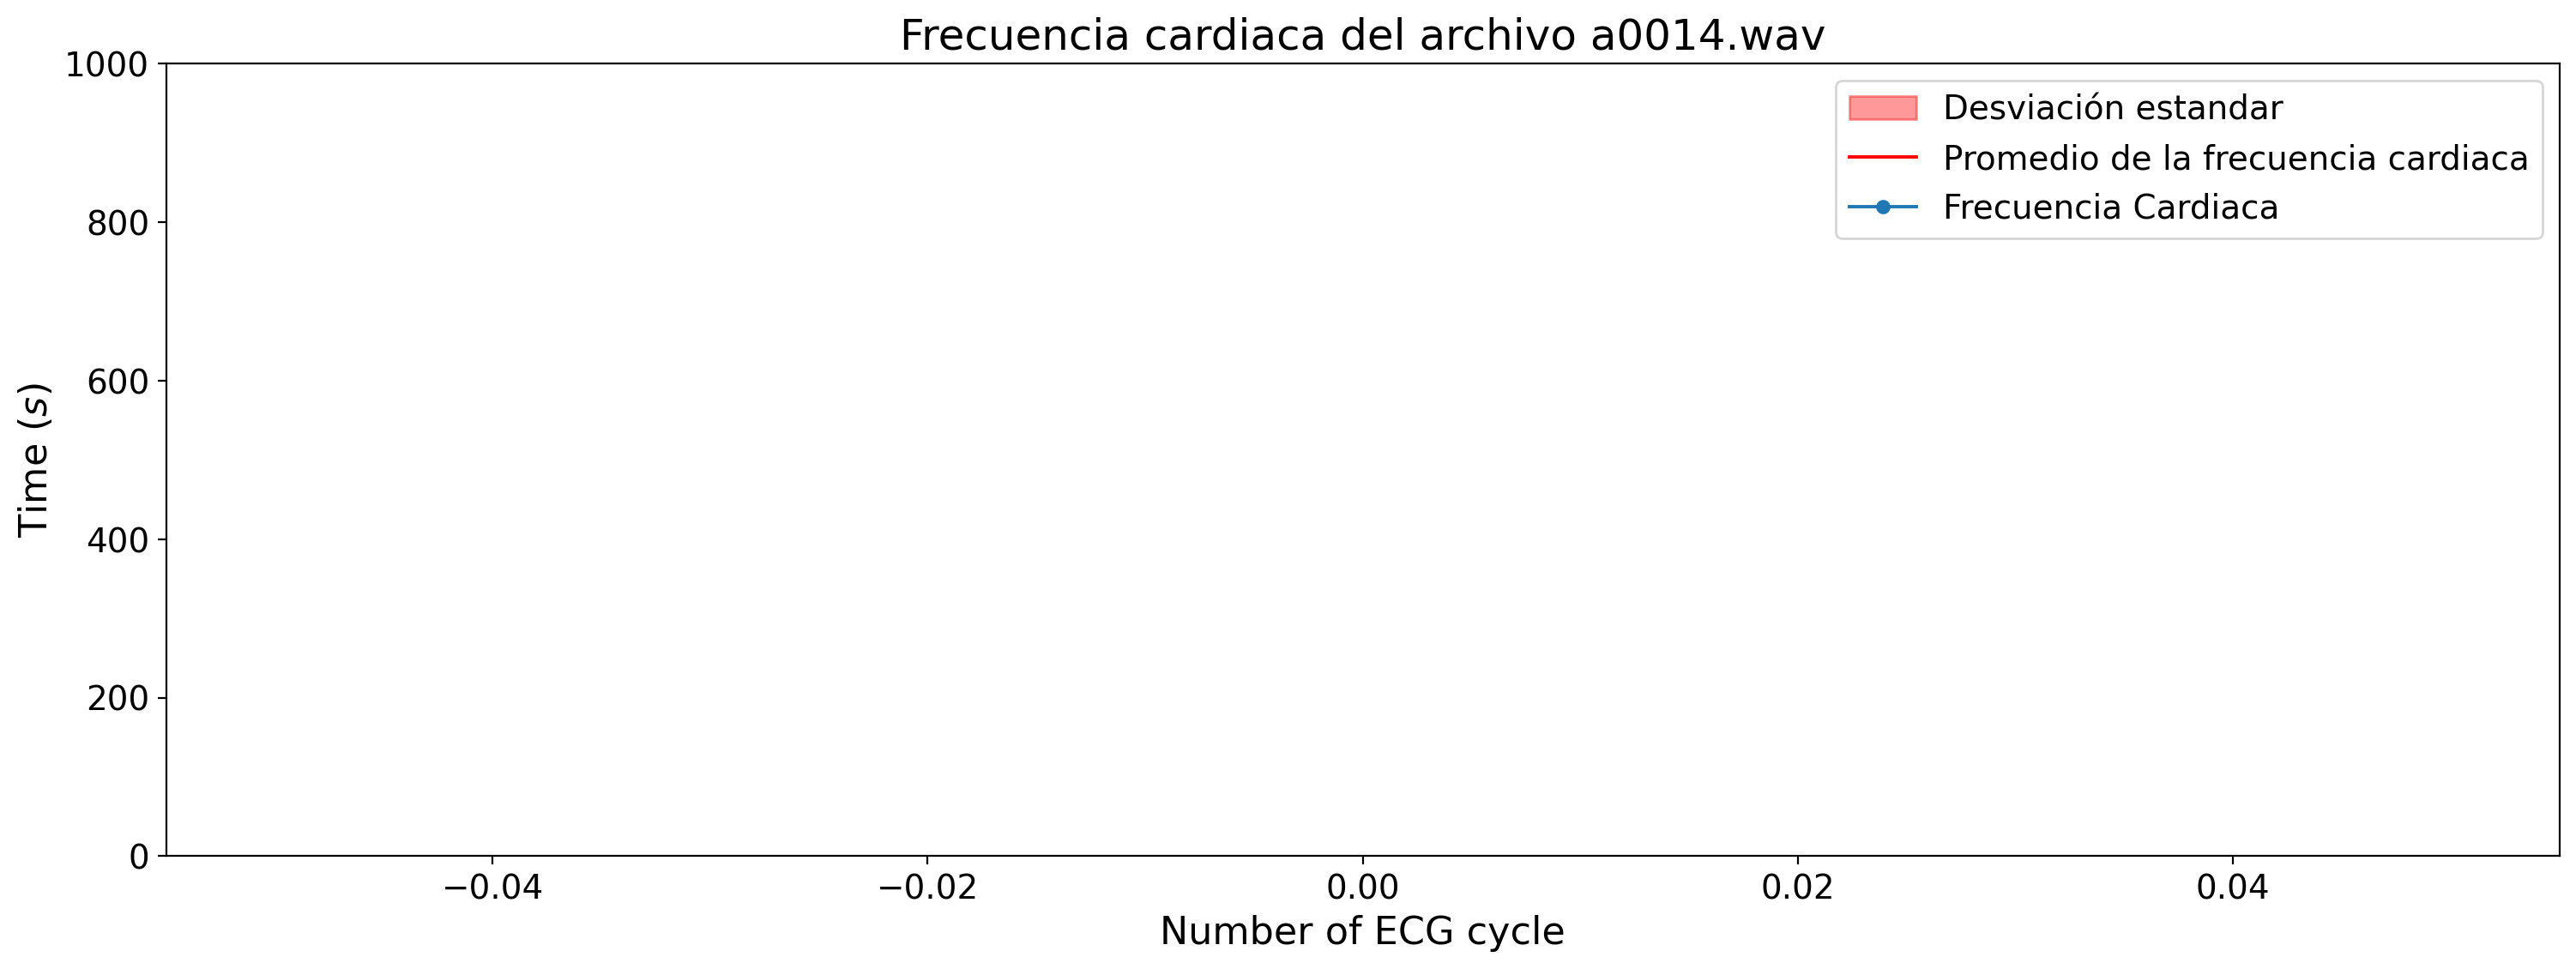

Pulsaciones por minuto: 10.073875083948959


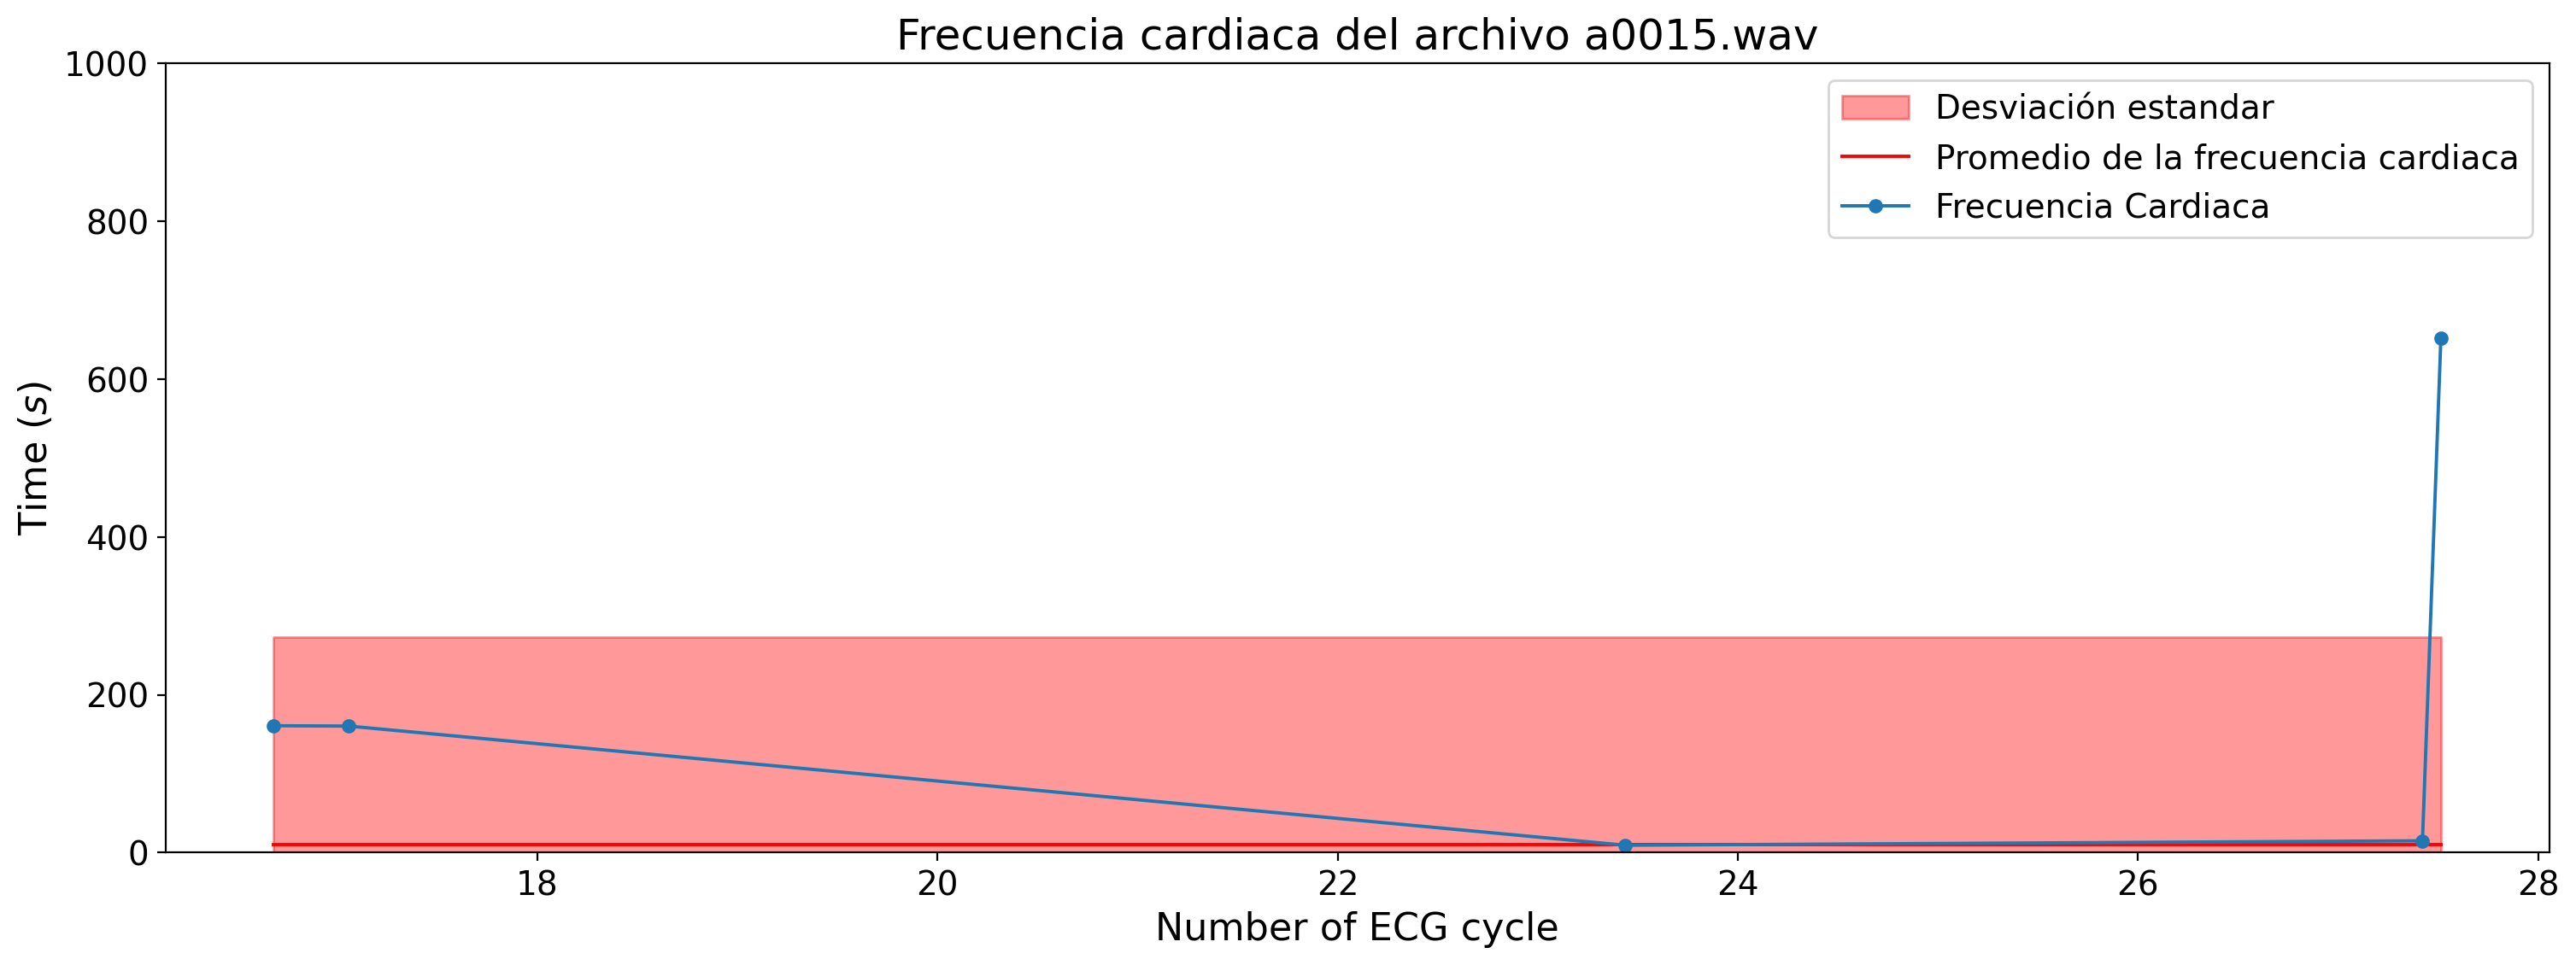

In [8]:
 for i in range(0, len(muestras)):
        timeECG, waveData = ecg(audios + muestras[i])
        mxs_indices = detecta_maximos_locales(timeECG, waveData)
        mean_bpm = 60*(len(mxs_indices)/(timeECG[-1]-timeECG[0]))
        print("Pulsaciones por minuto:", mean_bpm)##muestra leyenda de cada una de las pulsaciones por minuto

        heart_rate = [(60/(timeECG[mxs_indices[j+1]]-timeECG[mxs_indices[j]])) \
        for j in range(0, len(mxs_indices)-1)]
        time = timeECG[mxs_indices]
##se obtiene el promedio de frecuencia cardiaca
        mean_vec = [mean_bpm for j in range(0, len(time)-1)]
        std_vec_plus = [mean_bpm+stdev(heart_rate) for j in range(0, len(time)-1)]
        std_vec_minus = [mean_bpm-stdev(heart_rate) for j in range(0, len(time)-1)]

        plt.figure(figsize=(18,6))
        plt.fill_between(time[1:], std_vec_minus, std_vec_plus, facecolor="red",


        label = "Desviación estandar", color='red', alpha=0.4)

        ##luego de realizar las operaciones, se despliega graficos con las frecuencias cardiacas

        plt.plot(time[1:], mean_vec, c="r", label = "Promedio de la frecuencia cardiaca")
        plt.plot(time[1:], heart_rate, markersize=5, marker = "o", label="Frecuencia Cardiaca")
        plt.ylim((0, 1000))
        plt.title("Frecuencia cardiaca del archivo " + str(muestras[i]))
        plt.xlabel(r'Number of ECG cycle')
        plt.ylabel(r'Time ($s$)')
        plt.legend()
        plt.show()

Ahora podemos analizar las frecuencias cardíacas, en algunos casos el resultado es no es el esperado. Se muestra la gráfica en blanco, esto es porque la función encargada de obtener los máximos no consiguió realizar su tarea debido a que los datos provenientes del archivo de audio no le permitieron conseguirlo.

En otros casos, podemos ver que el promedio nos brinda información muy importante ya que, a pesar de la variación en la frecuencia cardíaca, podemos hablar de un promedio nos da información representativa de cada una de las frecuencias cardíacas.
